In [36]:
import wandb
import pandas as pd
import numpy as np

In [37]:
api = wandb.Api()
runs = api.runs("abishekthamma/wikipedia")

In [38]:
run_dict_list = []
for run in runs:
    if run.state != "finished":
        continue
    run_dict = {}
    if any(substring in run.name for substring in ["8k_6x6_nomask_gpt2"]):
        if "gram" not in run.name:
            if "5731965_s42" in run.name:
                continue
            
            run_dict["class"] = "nomask"
            run_dict["sub_class"] = "EM01"
            run_dict["name"] = run.name
            run_dict["train_loss"] = run.summary["train/loss"]
            run_dict["val_loss"] = run.summary["val/loss"]
            run_dict["seed"] = run.config.get("torch_seed_default", None)
    
    elif "ee002_em01" in run.name:
        run_dict["class"] = "ee002"
        run_dict["sub_class"] = "EM01"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    elif "ee002_em05" in run.name:
        #print(run.name, run.summary)
        run_dict["class"] = "ee002"
        run_dict["sub_class"] = "EM05"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    elif "ee002_em10" in run.name:
        run_dict["class"] = "ee002"
        run_dict["sub_class"] = "EM10"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    elif "ee2000_em01" in run.name:
        run_dict["class"] = "ee2000"
        run_dict["sub_class"] = "EM01"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    elif "ee2000_em05" in run.name:
        run_dict["class"] = "ee2000"
        run_dict["sub_class"] = "EM05"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    elif "ee2000_em10" in run.name:
        run_dict["class"] = "ee2000"
        run_dict["sub_class"] = "EM10"
        run_dict["name"] = run.name
        run_dict["train_loss"] = run.summary["train/loss"]
        run_dict["val_loss"] = run.summary["val/loss"]
        run_dict["seed"] = run.config.get("torch_seed_default", None)
    if run_dict:
        run_dict_list.append(run_dict)
    
run_df = pd.DataFrame(run_dict_list)
class_sort_order = ["nomask", "ee002", "ee2000"]
sub_class_sort_order = ["EM01", "EM05", "EM10"]
run_df["condition"] = run_df["class"] + "_" + run_df["sub_class"]
run_df["class"] = pd.Categorical(run_df["class"], categories=class_sort_order, ordered=True)
run_df["sub_class"] = pd.Categorical(run_df["sub_class"], categories=sub_class_sort_order, ordered=True)
run_df = run_df.sort_values(["class", "sub_class"])
run_df.dropna(inplace=True)

MASTER_SAVE_SETTING = True

In [39]:
TASKS = {
    "blimp": ["anaphor_agreement.json", "argument_structure.json", "binding.json",
              "control_raising.json", "determiner_noun_agreement.json", "ellipsis.json",
              "filler_gap.json", "irregular_forms.json", "island_effects.json",
              "npi_licensing.json", "quantifiers.json", "subject_verb_agreement.json"],
    "supplement": ["hypernym.json", "qa_congruence_easy.json", "qa_congruence_tricky.json",
               "subject_aux_inversion.json", "turn_taking.json"]
}
blimp_categories = [[x.split(".json")[0], "blimp"] for x in TASKS["blimp"]]
blimp_categories.extend([[x.split(".json")[0], "supplement"] for x in TASKS["supplement"]])

In [40]:
run_df

class sub_class                                               name  \
1   nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
2   nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
3   nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
4   nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
5   nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
..     ...       ...                                                ...   
62  ee2000      EM10  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   
63  ee2000      EM10  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   
64  ee2000      EM10  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   
65  ee2000      EM10  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   
66  ee2000      EM10  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   

    train_loss  val_loss     seed    condition  
1     2.902676  3.842926     96.0  nomask_EM01  
2     2.900583  3.853792     17.0  nomask_EM01  
3     2.898550  3.846220    404.0  nomask_EM01  
4     2.910209  3.853446   1729.0  nomask_EM01  
5     2.903891  3.857398  31415.0  nomask_EM01  
..         ...       ...      ...          ...  
62    2.982349  4.028860  46674.0  ee2000_EM10  
63    2.985092  4.036906   6747.0  ee2000_EM10  
64    2.964695  4.029215    869.0  ee2000_EM10  
65    2.986678  4.023301    466.0  ee2000_EM10  
66    2.980212  4.042708  11111.0  ee2000_EM10  

[76 rows x 7 columns]

In [41]:
run_df[["class","sub_class","seed"]].groupby(["class","sub_class"]).agg(["count"])

/tmp/ipykernel_95131/4113445572.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  run_df[["class","sub_class","seed"]].groupby(["class","sub_class"]).agg(["count"])


seed
                 count
class  sub_class      
nomask EM01         16
       EM05          0
       EM10          0
ee002  EM01         10
       EM05         10
       EM10         10
ee2000 EM01         10
       EM05         10
       EM10         10

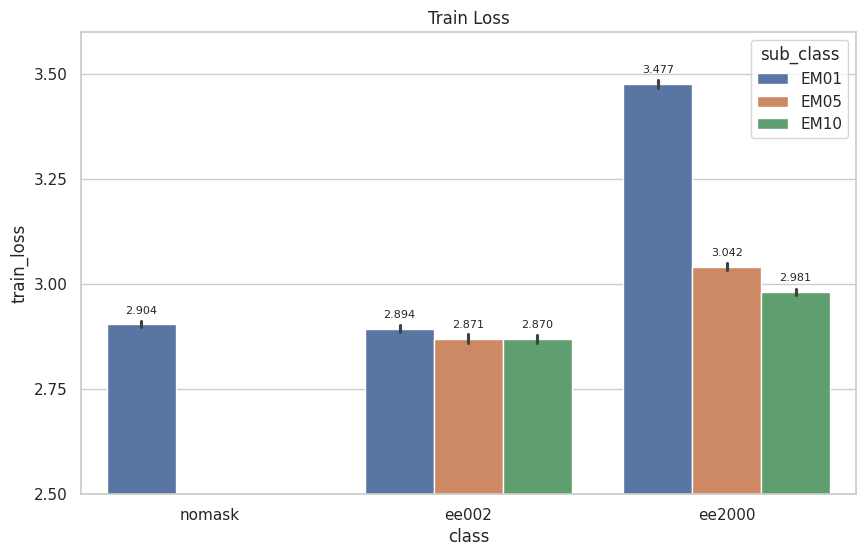

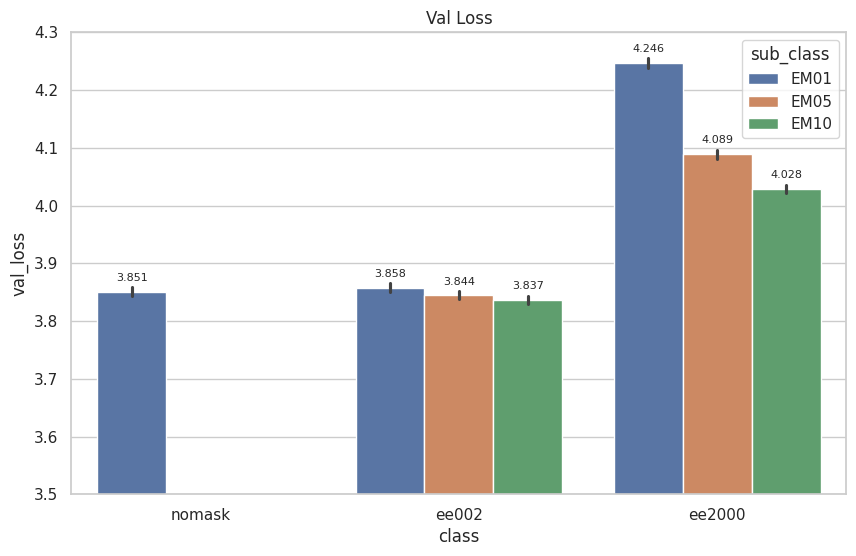

In [42]:
#Plot bar chart of train and val loss with error bars
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="class", y="train_loss", hue="sub_class", data=run_df, errorbar="sd")
plt.title("Train Loss")
ax.set_ylim(2.5, 3.6)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
#Annotate with average loss and standard deviation in brackets for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="class", y="val_loss", hue="sub_class", data=run_df, errorbar="sd")
plt.title("Val Loss")
ax.set_ylim(3.5, 4.3)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.show()


In [43]:
agg_df = run_df[['class', 'sub_class', 'train_loss', 'val_loss']].groupby(['class', 'sub_class']).agg(['mean', 'std'])
agg_df.columns = ['train_loss mean', 'train_loss std', 'val_loss mean', 'val_loss std']
agg_df

/tmp/ipykernel_95131/323940962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = run_df[['class', 'sub_class', 'train_loss', 'val_loss']].groupby(['class', 'sub_class']).agg(['mean', 'std'])


train_loss mean  train_loss std  val_loss mean  val_loss std
class  sub_class                                                              
nomask EM01              2.904268        0.007116       3.850971      0.007591
       EM05                   NaN             NaN            NaN           NaN
       EM10                   NaN             NaN            NaN           NaN
ee002  EM01              2.893674        0.008225       3.857678      0.007387
       EM05              2.870669        0.009776       3.844423      0.006868
       EM10              2.869668        0.008375       3.836836      0.006989
ee2000 EM01              3.477251        0.009528       4.246293      0.008937
       EM05              3.041963        0.007573       4.088669      0.007809
       EM10              2.981418        0.007339       4.028366      0.006993

In [44]:
#subset data for runs with common seed and more than 1 run
seed_df = run_df[run_df['seed'].notnull()]
seed_df = seed_df[seed_df['seed'].duplicated(keep=False)]
seed_df["run_id"] = seed_df["name"].apply(lambda x: x.split("run_")[-1].split("_")[0]).astype(int)

print(seed_df.groupby(["seed"]).size())


seed
9.0        7
42.0       7
466.0      7
616.0      7
869.0      7
1337.0     7
2347.0     7
6747.0     7
11111.0    7
46674.0    7
dtype: int64


In [45]:
#print(*seed_df["name"].sort_values().apply(lambda x: x.split("run_")[-1].split("_")[0]).astype(int).to_list(), sep="\n")

In [46]:
#print(*seed_df["name"].sort_values())

In [47]:
seed_df.sort_values(["val_loss"]).head(20)

class sub_class                                               name  \
29   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
12   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
32   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
8    ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
35   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
20   ee002      EM05  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
7    ee002      EM05  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
30   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
70  nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
24   ee002      EM05  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
33   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
25   ee002      EM05  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
67  nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
31   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
28   ee002      EM05  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
72  nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
76  nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
71  nomask      EM01  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
34   ee002      EM10  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
16   ee002      EM01  babylm_full_bpe_8k_6x6_mask_ee002_em01_gpt2_se...   

    train_loss  val_loss     seed    condition   run_id  
29    2.867826  3.826926   2347.0   ee002_EM10  6839424  
12    2.882418  3.831693     42.0   ee002_EM10  6839403  
32    2.870460  3.831856    616.0   ee002_EM10  6839426  
8     2.862156  3.831859   1337.0   ee002_EM10  6681944  
35    2.877955  3.832653    466.0   ee002_EM10  6839430  
20    2.865453  3.833444   2347.0   ee002_EM05  6839416  
7     2.863521  3.836484   1337.0   ee002_EM05  6681942  
30    2.876980  3.836671      9.0   ee002_EM10  6839425  
70    2.907289  3.837300    616.0  nomask_EM01  6892216  
24    2.867546  3.837575    616.0   ee002_EM05  6839418  
33    2.872362  3.839627   6747.0   ee002_EM10  6839428  
25    2.869938  3.841988   6747.0   ee002_EM05  6839420  
67    2.902385  3.843445   2347.0  nomask_EM01  6892213  
31    2.869436  3.844059  46674.0   ee002_EM10  6839427  
28    2.882186  3.844364    466.0   ee002_EM05  6839422  
72    2.906874  3.844475   6747.0  nomask_EM01  6892218  
76    2.897251  3.845519   1337.0  nomask_EM01  6892222  
71    2.902256  3.845793  46674.0  nomask_EM01  6892217  
34    2.854596  3.845894    869.0   ee002_EM10  6839429  
16    2.891772  3.846831    616.0   ee002_EM01  6839409

In [48]:
#Groupby class subclass and top 2 val_loss
seed_df.groupby(["class", "sub_class"]).apply(lambda x: x.nsmallest(2, "val_loss"))

/tmp/ipykernel_95131/2132155397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seed_df.groupby(["class", "sub_class"]).apply(lambda x: x.nsmallest(2, "val_loss"))
/tmp/ipykernel_95131/2132155397.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seed_df.groupby(["class", "sub_class"]).apply(lambda x: x.nsmallest(2, "val_loss"))


class sub_class  \
class  sub_class                        
nomask EM01      70  nomask      EM01   
                 67  nomask      EM01   
ee002  EM01      16   ee002      EM01   
                 9    ee002      EM01   
       EM05      20   ee002      EM05   
                 7    ee002      EM05   
       EM10      29   ee002      EM10   
                 12   ee002      EM10   
ee2000 EM01      43  ee2000      EM01   
                 40  ee2000      EM01   
       EM05      38  ee2000      EM05   
                 57  ee2000      EM05   
       EM10      39  ee2000      EM10   
                 42  ee2000      EM10   

                                                                  name  \
class  sub_class                                                         
nomask EM01      70  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
                 67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...   
ee002  EM01      16  babylm_full_bpe_8k_6x6_mask_ee002_em01_gpt2_se...   
                 9   babylm_full_bpe_8k_6x6_mask_ee002_em01_gpt2_se...   
       EM05      20  babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
                 7   babylm_full_bpe_8k_6x6_mask_ee002_em05_gpt2_se...   
       EM10      29  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
                 12  babylm_full_bpe_8k_6x6_mask_ee002_em10_gpt2_se...   
ee2000 EM01      43  babylm_full_bpe_8k_6x6_mask_ee2000_em01_gpt2_s...   
                 40  babylm_full_bpe_8k_6x6_mask_ee2000_em01_gpt2_s...   
       EM05      38  babylm_full_bpe_8k_6x6_mask_ee2000_em05_gpt2_s...   
                 57  babylm_full_bpe_8k_6x6_mask_ee2000_em05_gpt2_s...   
       EM10      39  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   
                 42  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...   

                     train_loss  val_loss    seed    condition   run_id  
class  sub_class                                                         
nomask EM01      70    2.907289  3.837300   616.0  nomask_EM01  6892216  
                 67    2.902385  3.843445  2347.0  nomask_EM01  6892213  
ee002  EM01      16    2.891772  3.846831   616.0   ee002_EM01  6839409  
                 9     2.884709  3.849808  1337.0   ee002_EM01  6810296  
       EM05      20    2.865453  3.833444  2347.0   ee002_EM05  6839416  
                 7     2.863521  3.836484  1337.0   ee002_EM05  6681942  
       EM10      29    2.867826  3.826926  2347.0   ee002_EM10  6839424  
                 12    2.882418  3.831693    42.0   ee002_EM10  6839403  
ee2000 EM01      43    3.475511  4.235960  2347.0  ee2000_EM01  6890230  
                 40    3.483764  4.238290    42.0  ee2000_EM01  6890225  
       EM05      38    3.034259  4.076860  1337.0  ee2000_EM05  6849725  
                 57    3.048308  4.081587   466.0  ee2000_EM05  6890244  
       EM10      39    2.973667  4.019423  1337.0  ee2000_EM10  6864685  
                 42    2.983872  4.022929    42.0  ee2000_EM10  6890229

In [49]:
def save_matplot_fig(fig, save_name, dpi=300):
    
    if not MASTER_SAVE_SETTING:
        print("WARNING! Not saving figure as MASTER_SAVE_SETTING is False")
        return
    else:
        print("Saving figure as MASTER_SAVE_SETTING is True")
    
    
    
    path = r'/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/results/log_analyser' 
    path = os.path.join(path, save_name)
    
    if not path.endswith(".pdf"):
        if not (path.endswith(".png") or path.endswith(".jpg") or path.endswith(".jpeg")):
            path = path + ".pdf"
    
    
    inp = input(f"Saving figure to {path}. Press Enter to continue, or type 'n' to cancel: ")
    
    if inp.lower() == 'n':
        print("Figure not saved")
        return
    
    
    fig.savefig(path, dpi=dpi, bbox_inches='tight')
    

    
    

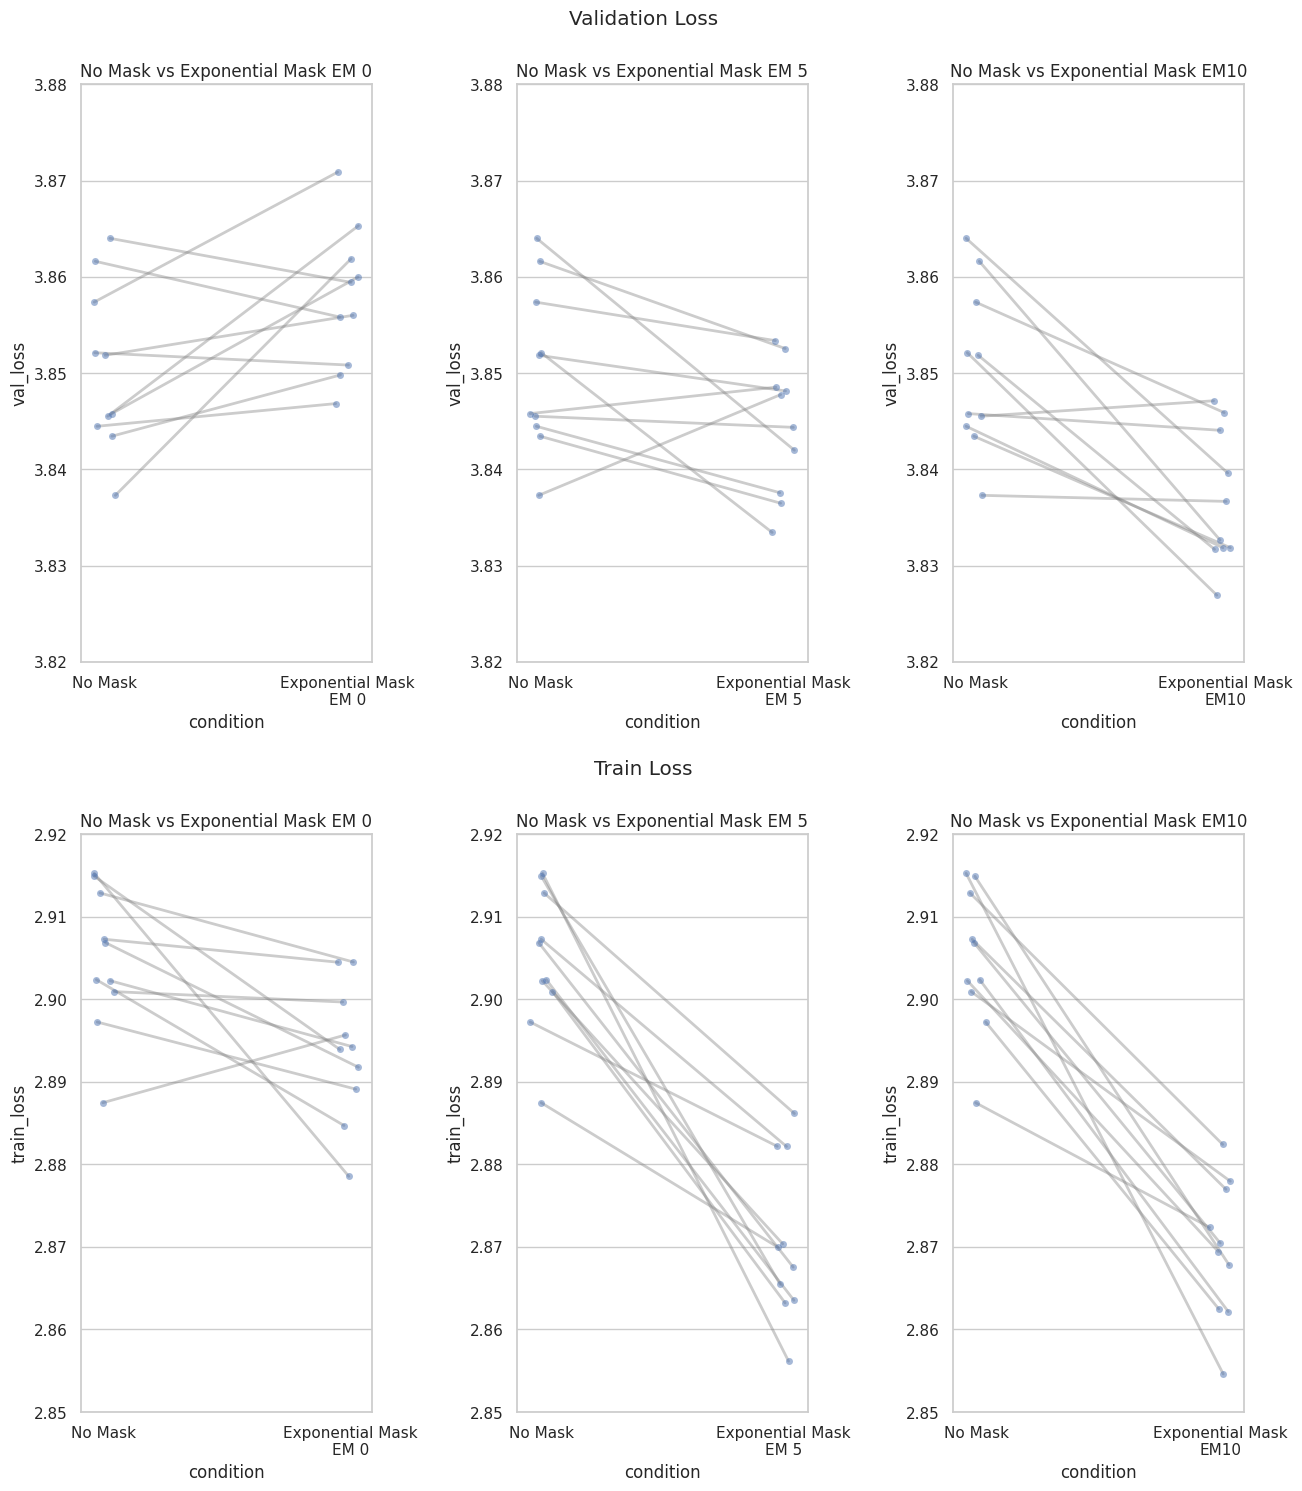

In [50]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 15))
subfigs = fig.subfigures(2, 1)


for row, subfig in enumerate(subfigs):
    
    #rename conditions as "nomask_EM01" -> "No Mask", "ee002_EM01" -> "Exponential Mask no EchMem", "ee002_EM05" -> "Exponential Mask EM 5", "ee002_EM10" -> "Exponential Mask EM10"
    
    
    data_columns = ["val_loss", "train_loss"]
    row_titles = ["Validation Loss", "Train Loss"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition) in enumerate(condition_pairs):
        ax = axs[i]
        plot_data = seed_df[["condition","seed", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition])]
        plot_data["condition"] = plot_data["condition"].map(conditional_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        
        #set title for each subplot but remove \n from mapping
        ax.set_title(conditional_map[nomask_condition].replace("\n", " ") + " vs " + conditional_map[ee002_condition].replace("\n", " "))
        
        ax.set_ylim(3.82, 3.88) if row == 0 else ax.set_ylim(2.85,2.92) 
        
        


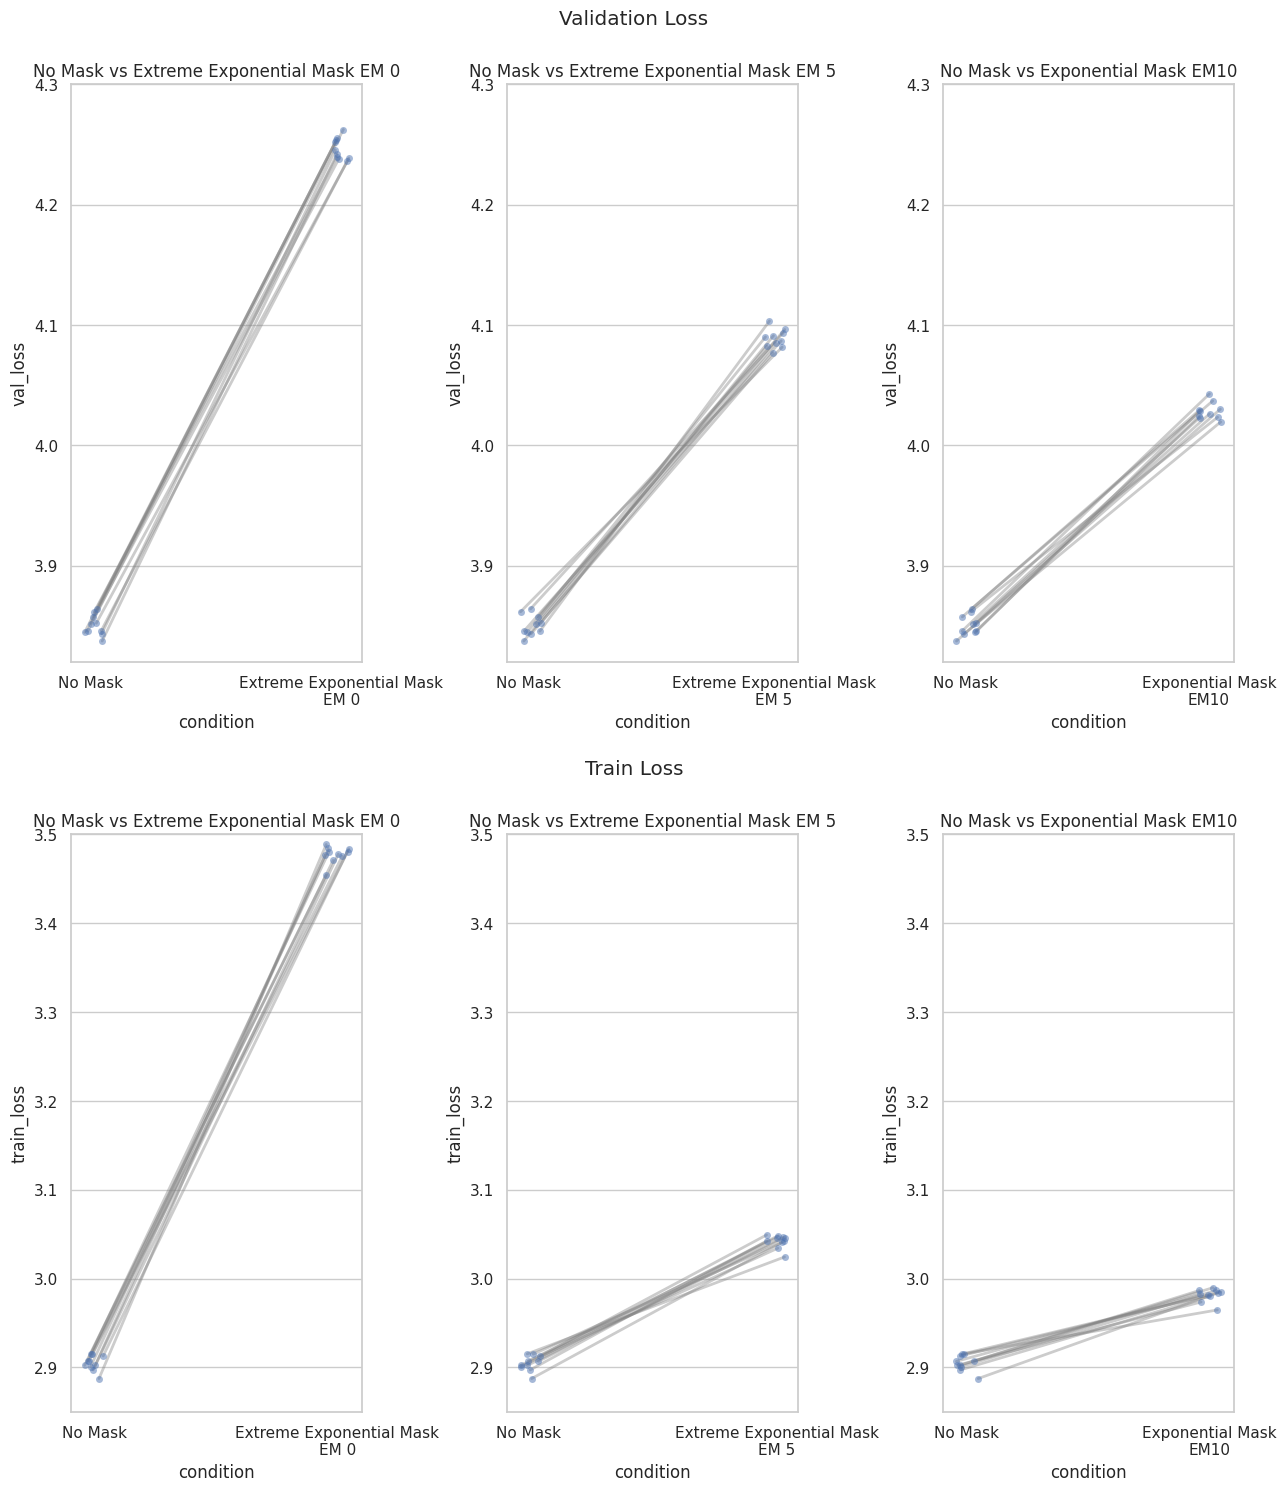

In [51]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_pairs = [("nomask_EM01", "ee2000_EM01"), ("nomask_EM01", "ee2000_EM05"), ("nomask_EM01", "ee2000_EM10")]
conditional_map = {"nomask_EM01": "No Mask", "ee2000_EM01": "Extreme Exponential Mask\nEM 0", "ee2000_EM05": "Extreme Exponential Mask\nEM 5", "ee2000_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 15))
subfigs = fig.subfigures(2, 1)


for row, subfig in enumerate(subfigs):
    
    #rename conditions as "nomask_EM01" -> "No Mask", "ee002_EM01" -> "Exponential Mask no EchMem", "ee002_EM05" -> "Exponential Mask EM 5", "ee002_EM10" -> "Exponential Mask EM10"
    
    
    data_columns = ["val_loss", "train_loss"]
    row_titles = ["Validation Loss", "Train Loss"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition) in enumerate(condition_pairs):
        ax = axs[i]
        plot_data = seed_df[["condition", "seed", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition])]
        plot_data["condition"] = plot_data["condition"].map(conditional_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=.05, ax=ax)
        connect_dots(ax)
        
        #set title for each subplot but remove \n from mapping
        ax.set_title(conditional_map[nomask_condition].replace("\n", " ") + " vs " + conditional_map[ee002_condition].replace("\n", " "))
        
        ax.set_ylim(3.82, 4.3) if row == 0 else ax.set_ylim(2.85,3.5) 
        
        


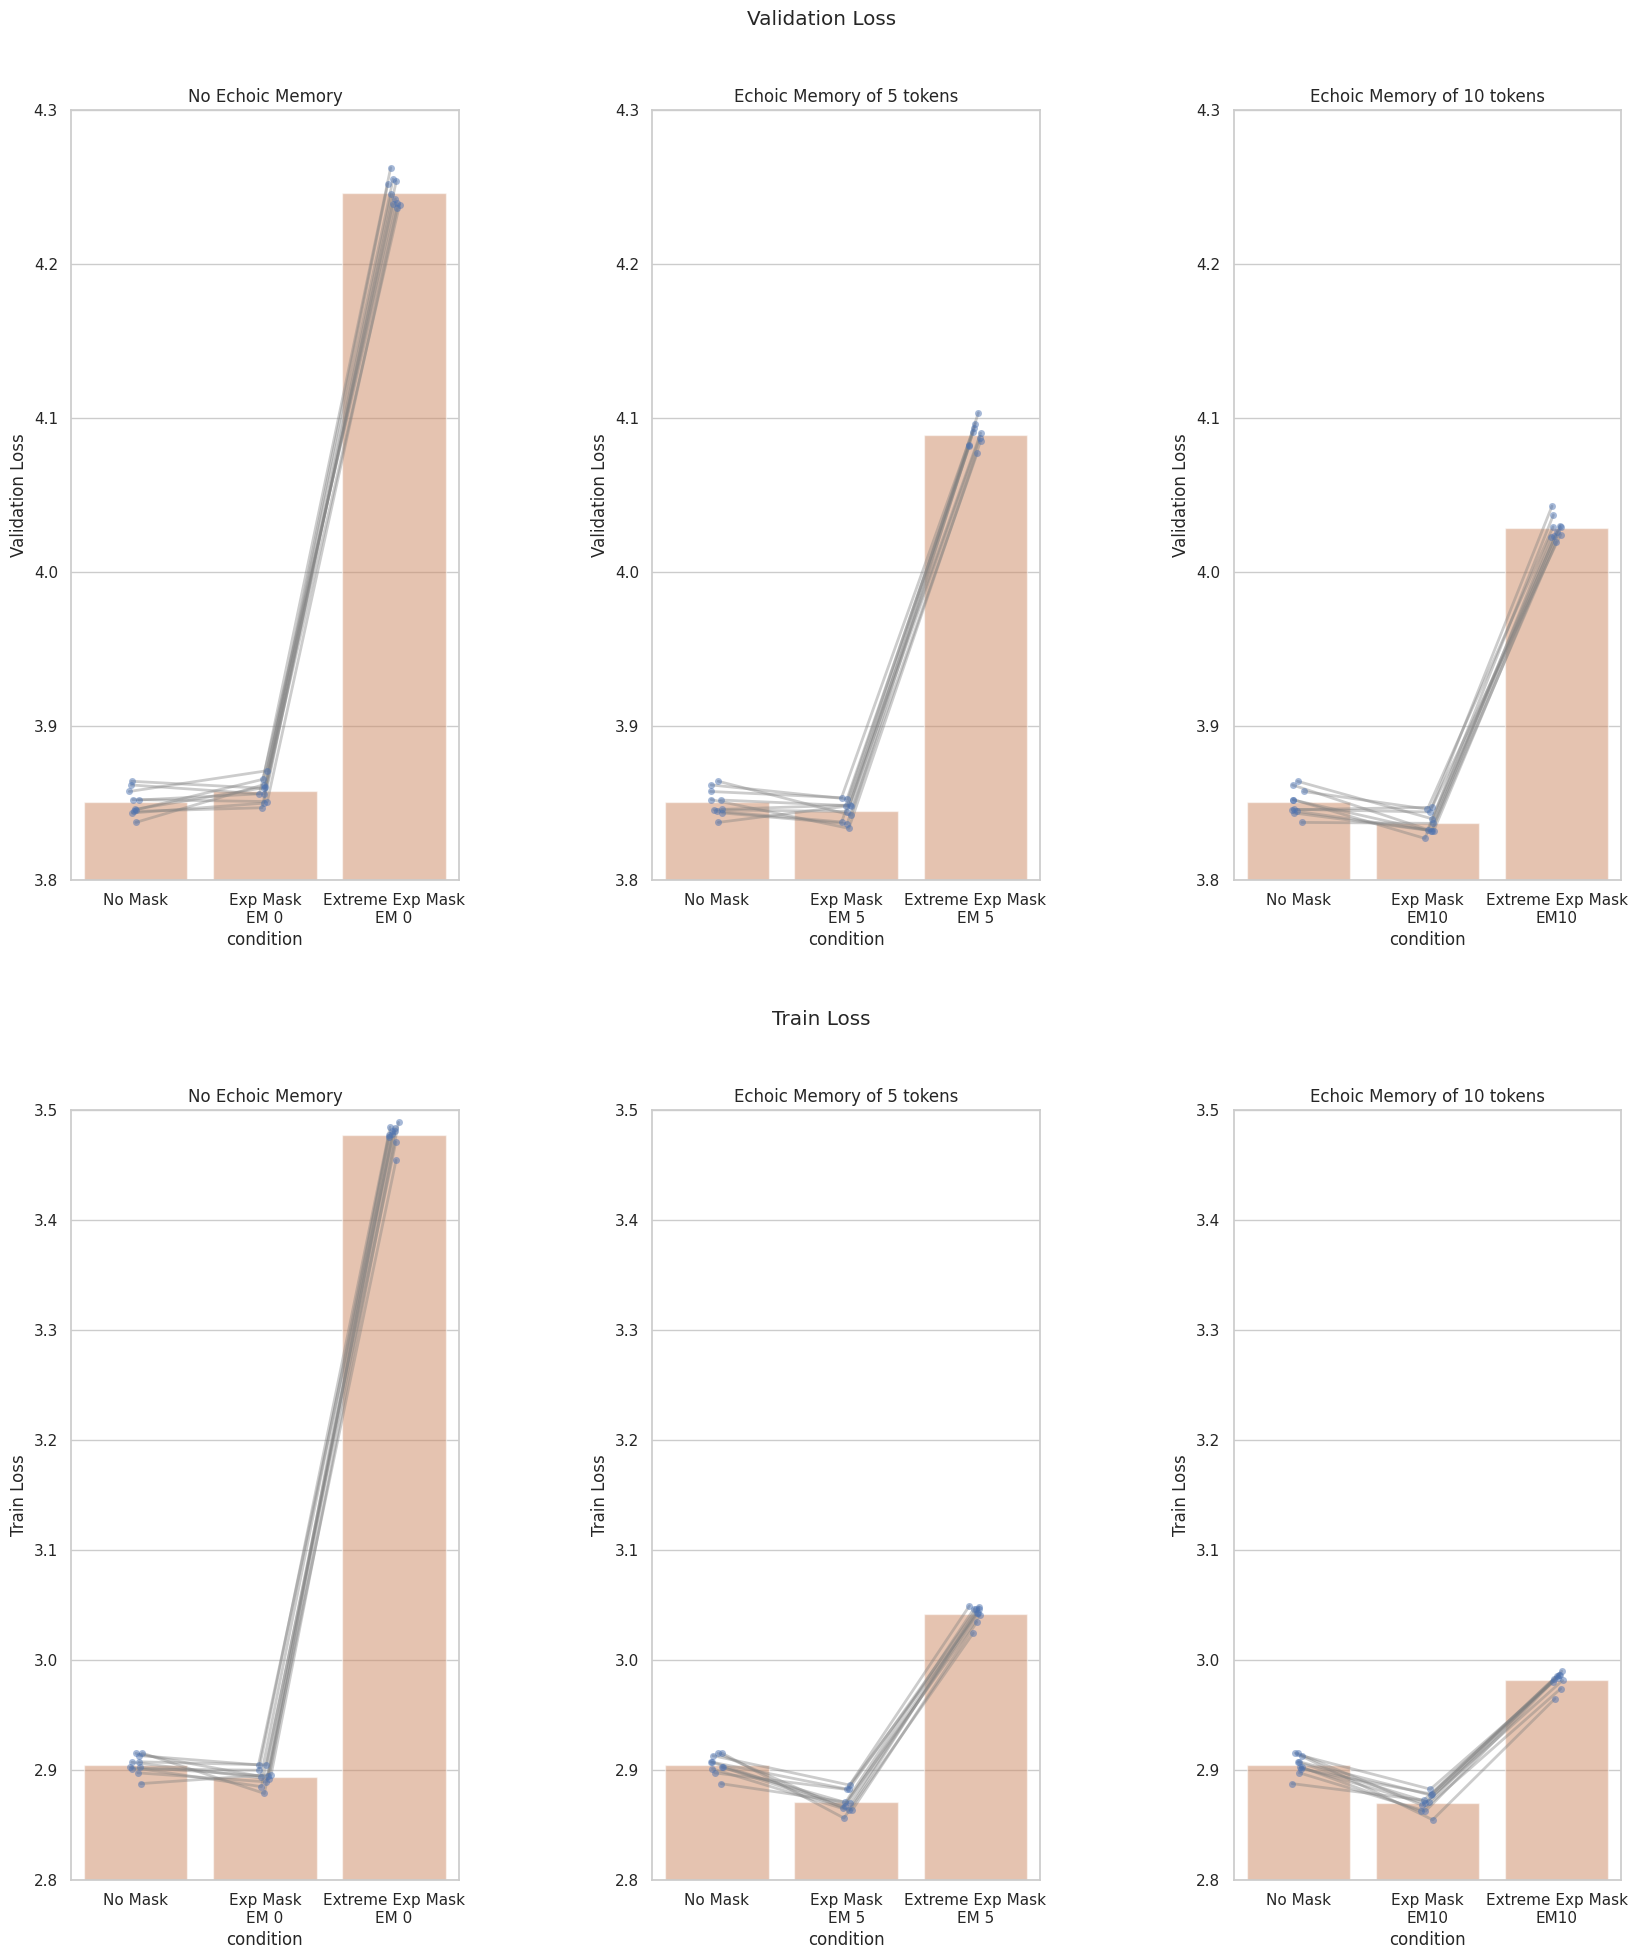

In [52]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(20, 20))

subfigs = fig.subfigures(2, 1)


for row, subfig in enumerate(subfigs):
    
    data_columns = ["val_loss", "train_loss"]
    row_titles = ["Validation Loss", "Train Loss"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar=None)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        ax.set_ylabel(row_titles[row])
        ax.set_title(subplot_col_titles[i])
        ax.set_ylim(3.80, 4.3) if row == 0 else ax.set_ylim(2.8,3.5) 
        



/tmp/ipykernel_95131/2291301804.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_95131/2291301804.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed')

{('nomask_EM01', 'ee002_EM01'): {'mean                    ': -0.00732798576354976, '95%_CI around mean      ': (-0.01030530214309684, -0.004357456564903129), 'bootstrap-t-test p_value': 'p=0.0008'}, ('ee002_EM01', 'ee2000_EM01'): {'mean                    ': -0.38861501216888433, '95%_CI around mean      ': (-0.3923036807775498, -0.3850593793392182), 'bootstrap-t-test p_value': 'p < 0.0001'}, ('nomask_EM01', 'ee2000_EM01'): {'mean                    ': -0.3959429979324341, '95%_CI around mean      ': (-0.40121419787406915, -0.39086133539676665), 'bootstrap-t-test p_value': 'p < 0.0001'}, ('nomask_EM01', 'ee002_EM05'): {'mean                    ': 0.005926585197448686, '95%_CI around mean      ': (0.002790696024894628, 0.008891927599906917), 'bootstrap-t-test p_value': 'p=0.0138'}, ('ee002_EM05', 'ee2000_EM05'): {'mean                    ': -0.24424638748168942, '95%_CI around mean      ': (-0.24779783129692073, -0.24050632894039156), 'bootstrap-t-test p_value': 'p < 0.0001'}, ('nomask_

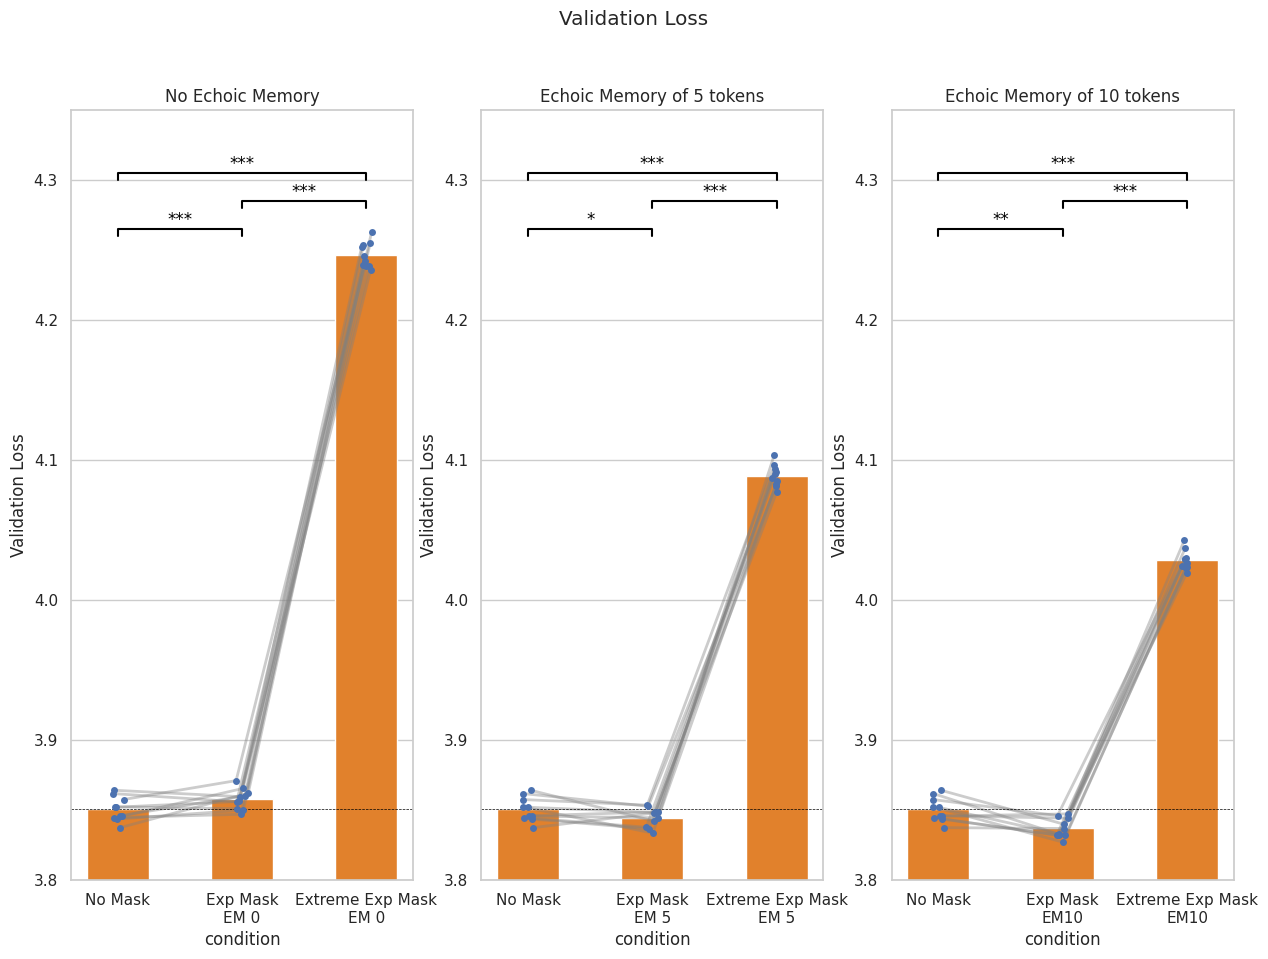

In [53]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 10))

subfigs = fig.subfigures(1, 1)
stats_test = {}
subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    data_columns = ["val_loss", "train_loss"]
    row_titles = ["Validation Loss", "Train Loss"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    #subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
        ax.axhline(y=plot_data[plot_data["condition"]==condition_triplet_map[nomask_condition]]["val_loss"].mean(), color='black', linestyle='--',  linewidth=0.5)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        ax.set_ylabel(row_titles[row])
        ax.set_title(subplot_col_titles[i])
        ax.set_ylim(3.80, 4.35) if row == 0 else ax.set_ylim(2.8,3.5) 
        
        res = annotate_given_colid(ax, 0, 1, plot_data, 4.26, 0.005)
        stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(ax, 1, 2, plot_data, 4.28, 0.005)
        stats_test[(ee002_condition, ee2000_condition)] = res
        res = annotate_given_colid(ax, 0, 2, plot_data, 4.30, 0.005)
        stats_test[(nomask_condition, ee2000_condition)] = res
        #plt.show()

import os
print(stats_test, sep="\n")
#
save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_hq", dpi=3000)

/tmp/ipykernel_95131/2289229599.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_95131/2289229599.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed')

        pair_A      pair_B  mean                      \
0  nomask_EM01  ee002_EM01                 -0.007328   
1  nomask_EM01  ee002_EM05                  0.005927   
2  nomask_EM01  ee002_EM10                  0.013513   

                        95%_CI around mean       bootstrap-t-test p_value  
0  (-0.01030530214309684, -0.004357456564903129)                 p=0.0008  
1   (0.002790696024894628, 0.008891927599906917)                 p=0.0138  
2    (0.008985633850097657, 0.01765935659408578)                 p=0.0012  
Saving figure as MASTER_SAVE_SETTING is True
Figure not saved


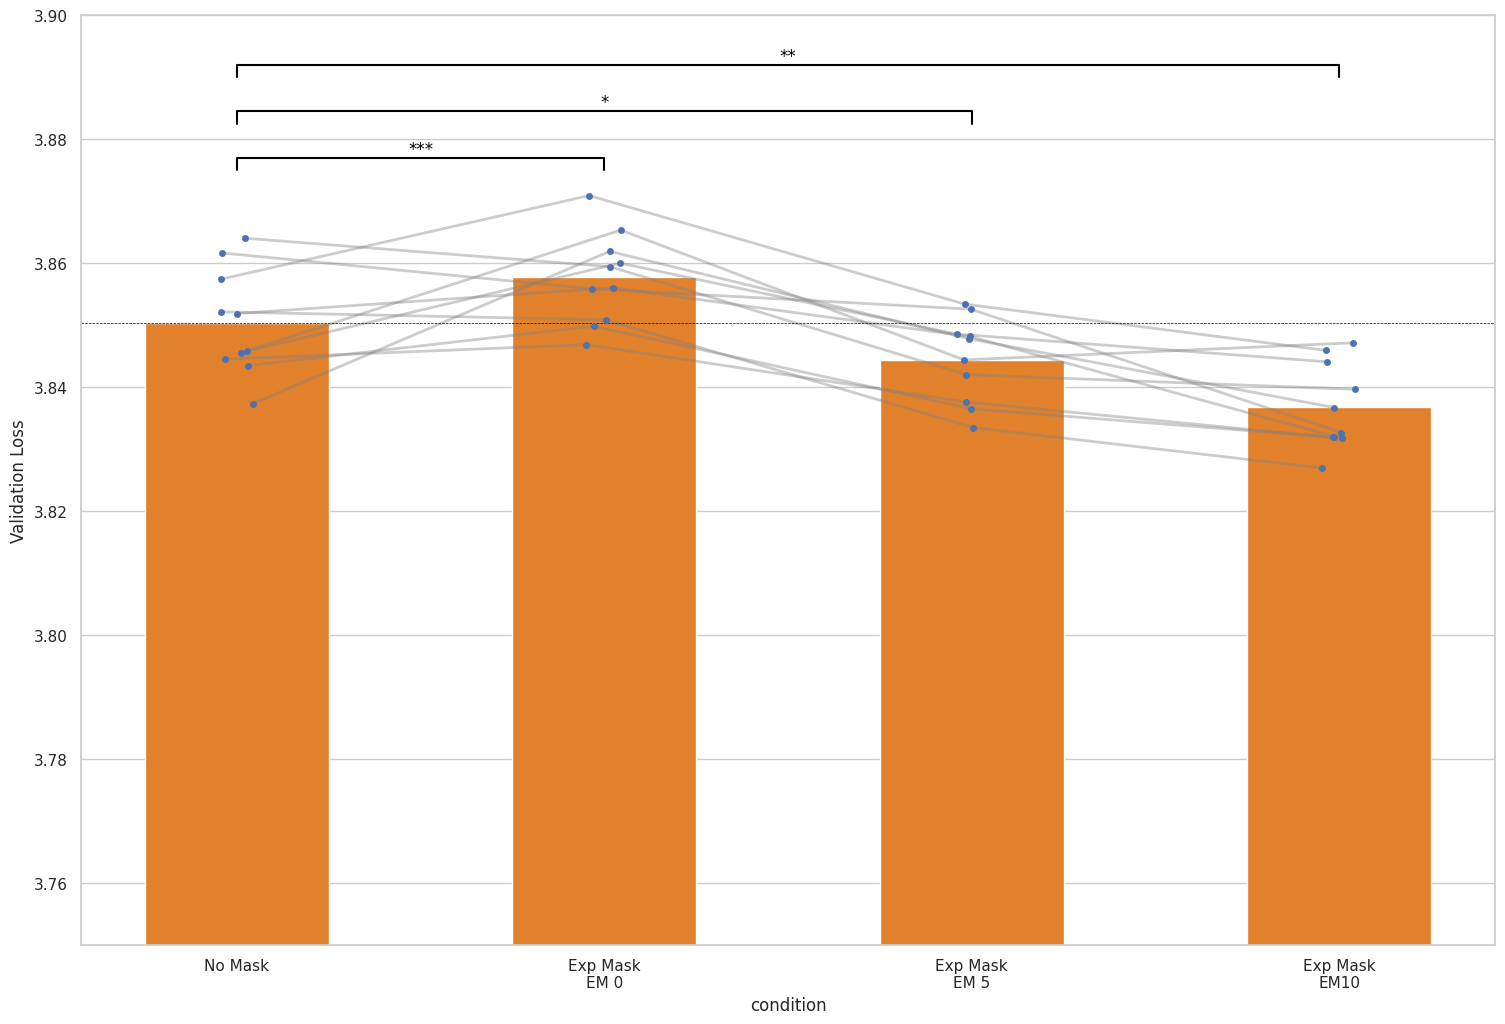

In [54]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
# condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
#fig = plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#subfigs = fig.subfigures(1, 1)
stats_test = []
#subfigs = [subfigs]
fig.tight_layout()
# for row, subfig in enumerate(subfigs):
    
data_columns = ["val_loss", "train_loss"]
row_titles = ["Validation Loss", "Train Loss"]
#subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
subfig.suptitle(row_titles[0])
#axs = subfig.subplots(1, 3)

#ax = axs[i]
#plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
#plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

#Plot for validation loss for No Mask, ee002_EM01, ee002_EM05, ee002_EM10
plot_data = seed_df[["seed", "condition", data_columns[0]]][seed_df["condition"].isin(["nomask_EM01", "ee002_EM01", "ee002_EM05", "ee002_EM10"])]

plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

sns.stripplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, jitter=0.05, ax=ax)
connect_dots(ax)
sns.barplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
ax.axhline(y=plot_data[plot_data["condition"]=="No Mask"]["val_loss"].mean(), 
           color='black', linestyle='--',  linewidth=0.5)

ax.set_ylabel(row_titles[0])
#ax.set_title(subplot_col_titles[i])
ax.set_ylim(3.75, 3.9)  
# 
res = annotate_given_colid(ax, 0, 1, plot_data, 3.875, 0.002)
stats_test.append({**{
    "pair_A":"nomask_EM01",
    "pair_B":"ee002_EM01",
} , **res})
res = annotate_given_colid(ax, 0, 2, plot_data, 3.8825, 0.002)
#stats_test[(ee002_condition, ee2000_condition)] = res
stats_test.append({**{
    "pair_A":"nomask_EM01",
    "pair_B":"ee002_EM05",
} ,**res})
res = annotate_given_colid(ax, 0, 3, plot_data, 3.89, 0.002)
#stats_test[(nomask_condition, ee2000_condition)] = res
stats_test.append({**{
    "pair_A":"nomask_EM01",
    "pair_B":"ee002_EM10",
},**res})
# #plt.show()

import os
#rint(*[f"{k}: {v}" for k, v in stats_test.items()], sep="\n")
print(pd.DataFrame(stats_test))
#
#save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_hq.pdf", dpi=3000)

/tmp/ipykernel_95131/296425707.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_95131/296425707.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').a

[{'pair_A': 'nomask_EM01', 'pair_B': 'ee2000_EM01', 'mean                    ': -0.3959429979324341, '95%_CI around mean      ': (-0.40121419787406915, -0.39086133539676665), 'bootstrap-t-test p_value': 'p < 0.0001'}, {'pair_A': 'nomask_EM01', 'pair_B': 'ee2000_EM05', 'mean                    ': -0.2383198022842407, '95%_CI around mean      ': (-0.24325742781162263, -0.23335518836975094), 'bootstrap-t-test p_value': 'p < 0.0001'}, {'pair_A': 'nomask_EM01', 'pair_B': 'ee2000_EM10', 'mean                    ': -0.17801597118377685, '95%_CI around mean      ': (-0.18334945023059845, -0.1728372097015381), 'bootstrap-t-test p_value': 'p < 0.0001'}]
Saving figure as MASTER_SAVE_SETTING is True
Figure not saved


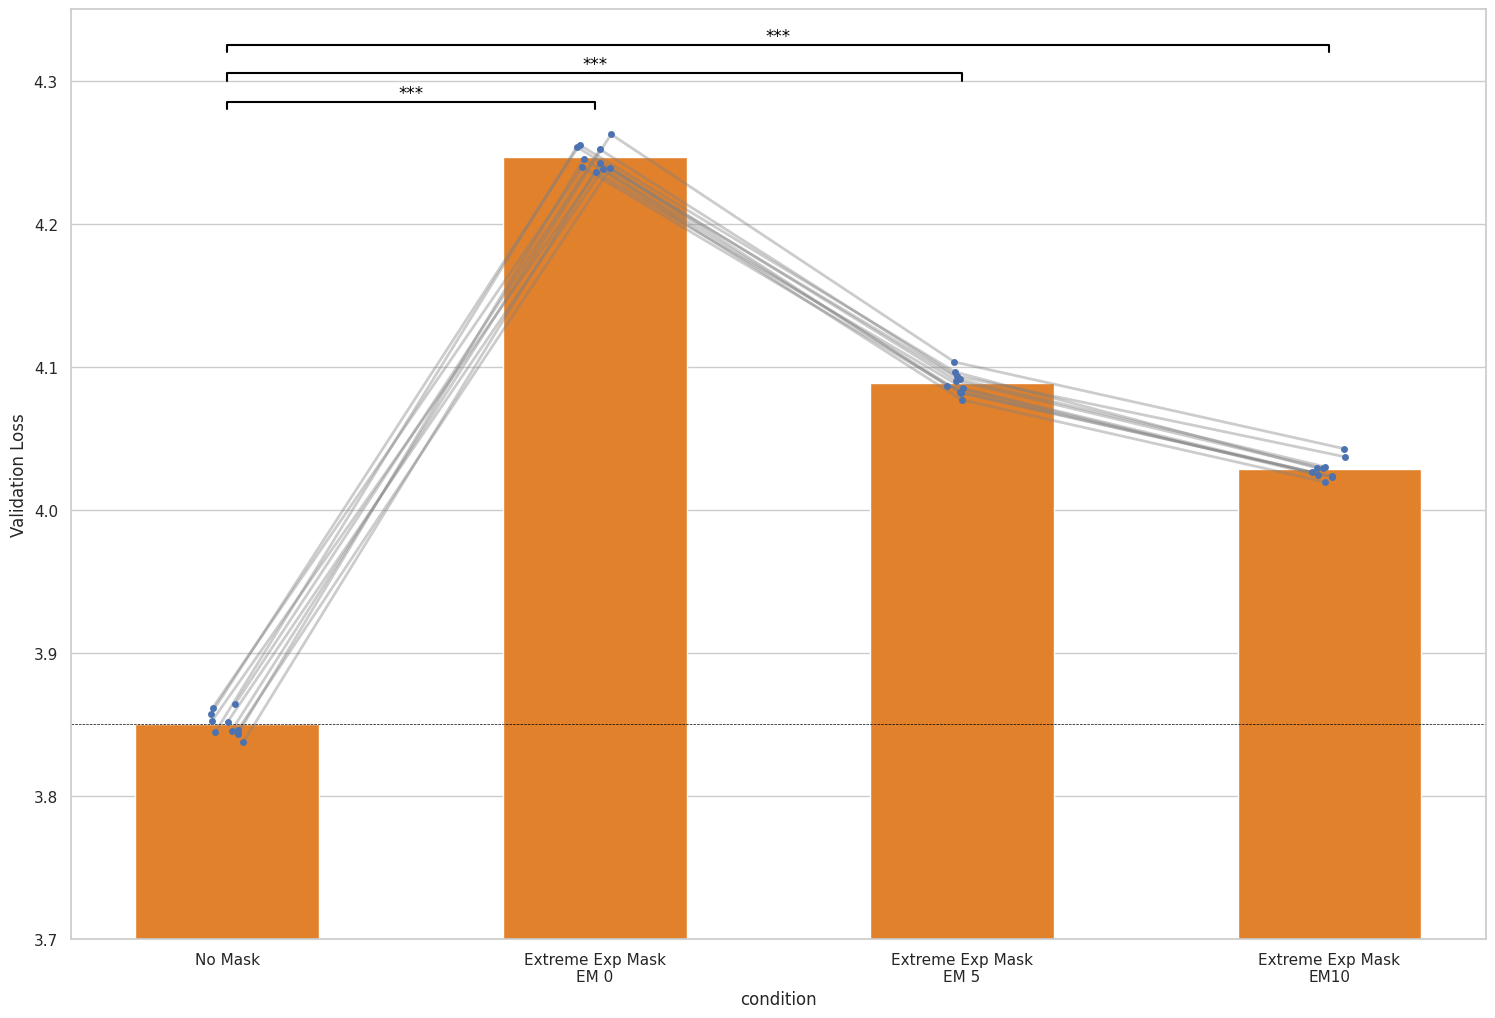

In [55]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
# condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
#fig = plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#subfigs = fig.subfigures(1, 1)
stats_test = []
#subfigs = [subfigs]
fig.tight_layout()
# for row, subfig in enumerate(subfigs):
    
data_columns = ["val_loss", "train_loss"]
row_titles = ["Validation Loss", "Train Loss"]
#subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
subfig.suptitle(row_titles[0])
#axs = subfig.subplots(1, 3)

#ax = axs[i]
#plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
#plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

#Plot for validation loss for No Mask, ee002_EM01, ee002_EM05, ee002_EM10
plot_data = seed_df[["seed", "condition", data_columns[0]]][seed_df["condition"].isin(["nomask_EM01", "ee2000_EM01", "ee2000_EM05", "ee2000_EM10"])]

plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

sns.stripplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, jitter=0.05, ax=ax)
connect_dots(ax)
sns.barplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
ax.axhline(y=plot_data[plot_data["condition"]=="No Mask"]["val_loss"].mean(), 
           color='black', linestyle='--',  linewidth=0.5)

ax.set_ylabel(row_titles[0])
#ax.set_title(subplot_col_titles[i])
ax.set_ylim(3.7, 4.35)  
# 
res = annotate_given_colid(ax, 0, 1, plot_data, 4.28, 0.005)
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee2000_EM01", } , **res})
# stats_test[(nomask_condition, ee002_condition)] = res
res = annotate_given_colid(ax, 0, 2, plot_data, 4.30, 0.005)
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee2000_EM05", } , **res})
# stats_test[(ee002_condition, ee2000_condition)] = res
res = annotate_given_colid(ax, 0, 3, plot_data, 4.32, 0.005)
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee2000_EM10", } , **res})
#stats_test[(nomask_condition, ee2000_condition)] = res

# #plt.show()

import os
print(stats_test, sep="\n")
#
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_val_loss_memcliff_withstats_v2_hq.pdf", dpi=3000)

/tmp/ipykernel_95131/614930524.py:221: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["train_loss"].values[0] - x[x['condition']==col_names[col_id2]]["train_loss"].values[0])


TypeError: list indices must be integers or slices, not tuple

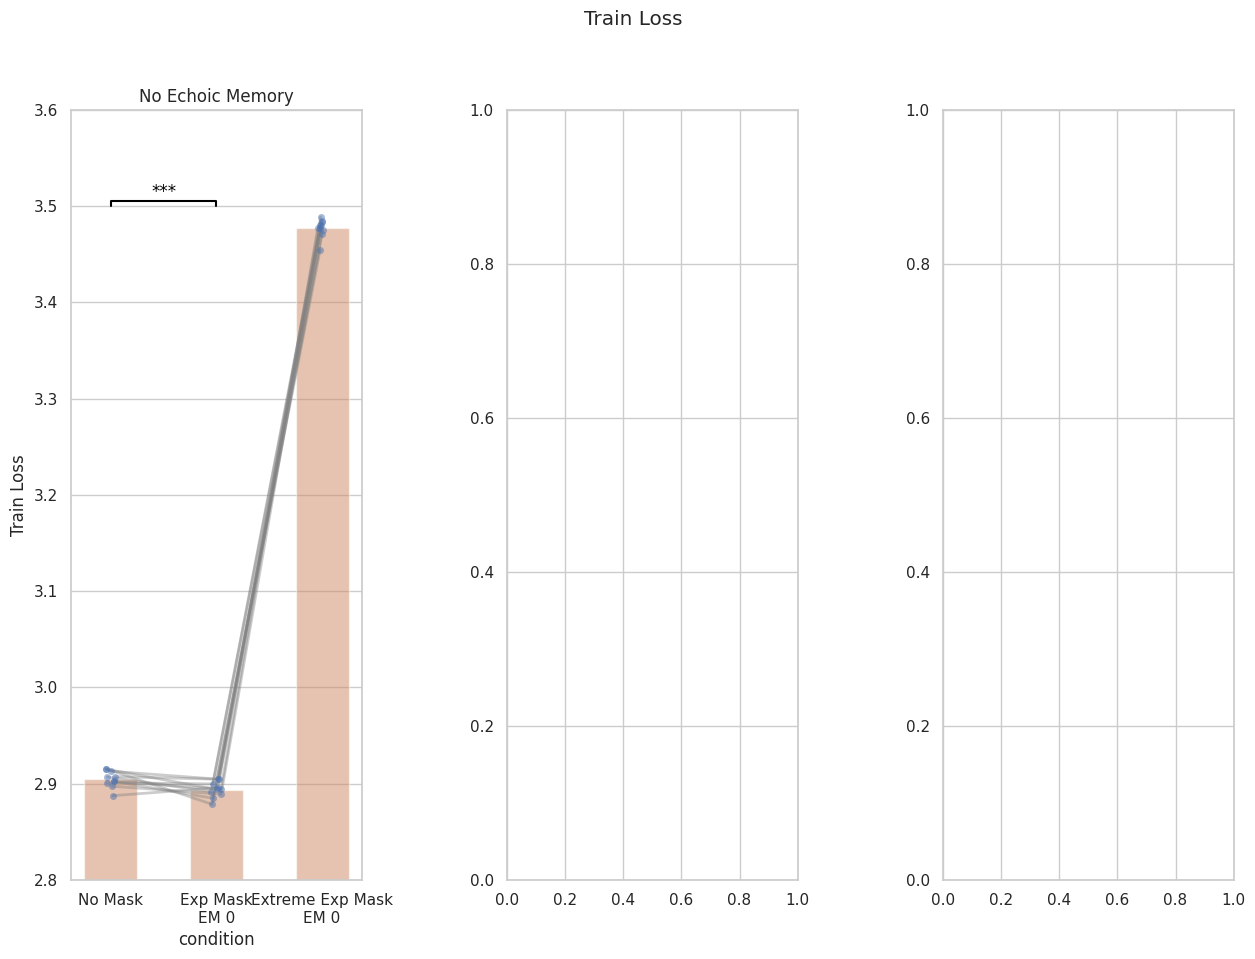

In [56]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["train_loss"].values[0] - x[x['condition']==col_names[col_id2]]["train_loss"].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 10))

subfigs = fig.subfigures(1, 1)

subfigs = [subfigs]

for row, subfig in enumerate(subfigs):
    
    data_columns = [ "train_loss", "val_loss"]
    row_titles = [ "Train Loss", "Validation Loss"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar=None, width=0.5)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        ax.set_ylabel(row_titles[row])
        ax.set_title(subplot_col_titles[i])
        ax.set_ylim(3.80, 4.3) if row == 1 else ax.set_ylim(2.8,3.6) 
        
        res = annotate_given_colid(ax, 0, 1, plot_data, 3.5, 0.005)
        stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(ax, 1, 2, plot_data, 3.52, 0.005)
        stats_test[(ee002_condition, ee2000_condition)] = res
        res = annotate_given_colid(ax, 0, 2, plot_data, 3.55, 0.005)
        stats_test[(nomask_condition, ee2000_condition)] = res
        
        #plt.show()


In [58]:

#pairwise T test for different setting

#Nomask vs EE002 EM01
#Nomask vs EE002 EM05
#Nomask vs EE002 EM10
#EE002 EM01 vs EE002 EM05
#EE002 EM01 vs EE002 EM10
#EE002 EM05 vs EE002 EM10
#EE2000 EM01 vs EE2000 EM05
#EE2000 EM01 vs EE2000 EM10
#EE2000 EM05 vs EE2000 EM10

from scipy.stats import ttest_rel 

#Pairwise T test between classes and subclass combinations
#Nomask vs EE002 EM01
#Filter seeds in [9, 42, 466.0, 616.0, 869.0, 1337.0, 2347.0, 6747.0, 11111.0, 46674.0]

nomask_em01 = run_df[(run_df['class'] == "nomask") & (run_df['sub_class'] == "EM01") & run_df['seed'].isin([9, 42, 466.0, 616.0, 869.0, 1337.0, 2347.0, 6747.0, 11111.0, 46674.0])].sort_values("seed")[[ "val_loss"]]
#pint(nomask_em01)
ee002_em01 = run_df[(run_df['class'] == "ee002") & (run_df['sub_class'] == "EM01") & run_df['seed'].isin([9, 42, 466.0, 616.0, 869.0, 1337.0, 2347.0, 6747.0, 11111.0, 46674.0])].sort_values("seed")[[ "val_loss"]]
#print(ee002_em01)
t_test_nomask_ee002_em01 = ttest_rel(nomask_em01, ee002_em01)
print(t_test_nomask_ee002_em01)

#Nomask vs EE002 EM05



TtestResult(statistic=array([-4.61050219]), pvalue=array([0.00127139]), df=array([9]))


In [59]:
run_data_path = r"/home/abishekthamma/PycharmProjects/masters_thesis/ss-llm/nanoGPT/results/rundata.xlsx"
rd_df = pd.read_excel(run_data_path, sheet_name="Run Details")
blimp_df = pd.read_excel(run_data_path, sheet_name="BLIMP")
rt_df = pd.read_excel(run_data_path, sheet_name="Reading Time")
rt_subj_df = pd.read_excel(run_data_path, sheet_name="Reading Time Subjectwise")
#merged_df = pd.merge(rd_df[["run_id", "output_folder_name"]], blimp_df, on="run_id")
#merged_df = pd.merge(merged_df, rt_df, on="run_id")

seed_df_blimp_agg = seed_df[["class", "sub_class", "seed", "name", "condition","run_id"]].join(blimp_df[["run_id", "blimp_avg", "supplement_avg", "total_avg"]].set_index("run_id"), on="run_id")

seed_df_blimp_agg["blimp_avg"] = seed_df_blimp_agg["blimp_avg"].astype(float)
seed_df_blimp_agg["supplement_avg"] = seed_df_blimp_agg["supplement_avg"].astype(float)
seed_df_blimp_agg["total_avg"] = seed_df_blimp_agg["total_avg"].astype(float)

seed_df_blimp_indv = seed_df[["class", "sub_class", "seed", "name", "condition","run_id"]].join(blimp_df[["run_id", 'anaphor_agreement', 'argument_structure',
       'binding', 'control_raising', 'determiner_noun_agreement', 'ellipsis',
       'filler_gap', 'irregular_forms', 'island_effects', 'npi_licensing',
       'quantifiers', 'subject_verb_agreement', 'hypernym',
       'qa_congruence_easy', 'qa_congruence_tricky', 'subject_aux_inversion',
       'turn_taking']].set_index("run_id"), on="run_id")

seed_df_rt = seed_df[["class", "sub_class", "seed", "name", "condition","run_id"]].join(rt_df[["run_id", "corr_surprisal"]].set_index("run_id"), on="run_id")

seed_df_rt_subj = seed_df[["class", "sub_class", "seed", "name", "condition","run_id"]].join(rt_subj_df[["run_id", "subject_id", "corr_surprisal"]].set_index("run_id"), on="run_id")


In [60]:
seed_df_rt_subj.head()

class sub_class    seed  \
67  nomask      EM01  2347.0   
67  nomask      EM01  2347.0   
67  nomask      EM01  2347.0   
67  nomask      EM01  2347.0   
67  nomask      EM01  2347.0   

                                                 name    condition   run_id  \
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   

        subject_id  corr_surprisal  
67  A117RW2F1MNBQ8        0.145031  
67  A11AUVZ4MCA7VU        0.151476  
67  A11GA4B4SEYK44        0.158967  
67  A11KMPAZSE5Q0Q        0.053818  
67  A127R5QI5OGBIK        0.127727

In [61]:
blimp_baselines_babylm = pd.read_csv("blimp_baselines_babylm.tsv", sep="\t")
blimp_baselines_babylm.head()
blimp_baselines_babylm.columns
blimp_baseline_cols = ['Model ', 'Anaphor Agr. ', 'Agr. Structure ', 'Binding ',
       'Control/Raising ', 'D-N Agr. ', 'Ellipsis ', 'Filler-Gap ',
       'Irregular Forms ', 'Island Effects ', 'NPI Licensing ', 'Quantifiers ',
       'S-V Agr.']
baseline_cols_rename_map = {"Model ": "run_id", 
                            "Anaphor Agr. ": "anaphor_agreement", "Agr. Structure ": "argument_structure", "Binding ": "binding",
                            "Control/Raising ": "control_raising", "D-N Agr. ": "determiner_noun_agreement", "Ellipsis ": "ellipsis",
                            "Filler-Gap ": "filler_gap", "Irregular Forms ": "irregular_forms", "Island Effects ": "island_effects",
                            "NPI Licensing ": "npi_licensing", "Quantifiers ": "quantifiers", "S-V Agr.": "subject_verb_agreement"
                            }

blimp_baselines_babylm = blimp_baselines_babylm.rename(columns=baseline_cols_rename_map)
#blimp_baselines_babylm.head()
blimp_baselines_babylm["blimp_avg"] = blimp_baselines_babylm[[x for x in blimp_baselines_babylm.columns if x not in ["run_id"]]].mean(axis=1)
#print(blimp_baselines_babylm.head())

#Pick no mask and best model - condition_pairs = [("nomask_EM01", "ee002_EM10")]
own_models_blimp = seed_df_blimp_indv[seed_df_blimp_indv["condition"].isin(["nomask_EM01", "ee002_EM10"])][[x for x in seed_df_blimp_indv.columns if x not in ["class", "sub_class" , "name", "run_id","seed", "hypernym", "qa_congruence_easy", "qa_congruence_tricky", "subject_aux_inversion", "turn_taking"]]]

own_models_blimp["blimp_avg"] = own_models_blimp[[x for x in own_models_blimp.columns if x not in ["condition"]]].mean(axis=1)

blimp_baselines_babylm = pd.concat([blimp_baselines_babylm, own_models_blimp.groupby("condition").mean().reset_index().rename(columns={"condition": "run_id"})], axis=0).reset_index(drop=True)
blimp_baselines_babylm["run_id"] = blimp_baselines_babylm["run_id"].replace({"nomask_EM01": "No Mask", "ee002_EM10": "Exp Mask EM10"})
blimp_baselines_babylm.head()





run_id  anaphor_agreement  argument_structure    binding  \
0      OPT-125m           63.800000           70.600000  67.100000   
1  RoBERTa-base           81.500000           67.100000  67.300000   
2       T5-base           68.900000           63.800000  60.400000   
3  Exp Mask EM10          82.842536           72.234481  70.620362   
4        No Mask          76.436605           70.963870  69.728406   

   control_raising  determiner_noun_agreement   ellipsis  filler_gap  \
0        66.500000                  78.500000  62.000000   63.800000   
1        67.900000                  90.800000  76.400000   63.500000   
2        60.900000                  72.200000  34.400000   48.200000   
3        67.775077                  86.242376  65.398383   68.912232   
4        67.357490                  86.119067  65.825635   67.628385   

   irregular_forms  island_effects  npi_licensing  quantifiers  \
0        67.500000       48.600000      46.700000    59.600000   
1        87.400000       39.900000      55.900000    70.500000   
2        77.600000       45.600000      47.800000    61.200000   
3        83.918575       49.783259      51.182812    72.568264   
4        83.241730       48.344544      51.658063    75.229263   

   subject_verb_agreement  blimp_avg  
0               56.900000  62.633333  
1               65.400000  69.466667  
2               65.000000  58.833333  
3               68.637760  70.009676  
4               65.105691  68.969896

/tmp/ipykernel_95131/1135990846.py:280: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_95131/1135990846.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_95131/1135990846.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will

Saving figure as MASTER_SAVE_SETTING is True
Figure not saved
Saving figure as MASTER_SAVE_SETTING is True
Figure not saved


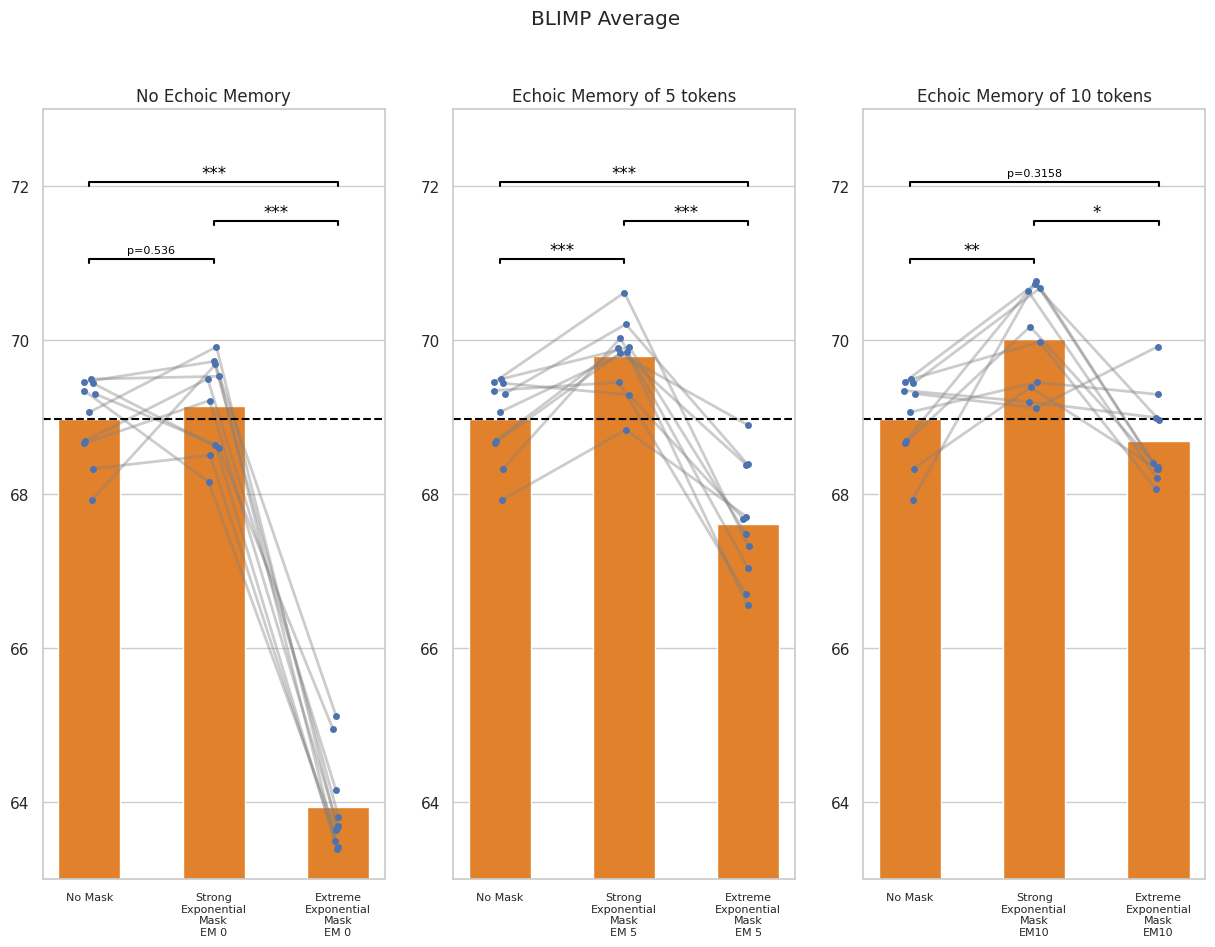

In [62]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    
    return res


#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Strong\nExponential\nMask\nEM 0", 
                         "ee002_EM05": "Strong\nExponential\nMask\nEM 5", 
                         "ee002_EM10": "Strong\nExponential\nMask\nEM10", 
                         "ee2000_EM01": "Extreme\nExponential\nMask\nEM 0",
                         "ee2000_EM05": "Extreme\nExponential\nMask\nEM 5", 
                         "ee2000_EM10": "Extreme\nExponential\nMask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 10))

#subfigs = fig.subfigures(3, 1)
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]

fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    data_columns = ["blimp_avg"] #, "supplement_avg", "total_avg"]
    row_titles = ["BLIMP Average", "Supplement Average", "Total Average"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    #subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df_blimp_agg[["condition", "seed",  data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, jitter=0.05, ax=ax )
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
        ax.axhline(y=blimp_baselines_babylm[blimp_baselines_babylm["run_id"] == condition_triplet_map[nomask_condition]]["blimp_avg"].values[0], color='black', linestyle='--')
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        ax.set_ylabel(row_titles[row])
        ax.set_title(subplot_col_titles[i])
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
        ax.set_ylim(63, 73) if row == 0 else ax.set_ylim(52,64) if row == 1 else ax.set_ylim(60,69) 
        
        res = annotate_given_colid(ax, 0, 1, plot_data, 71, 0.05, data_columns[row])
        stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(ax, 1, 2, plot_data, 71.5, 0.05, data_columns[row])
        stats_test[(ee002_condition, ee2000_condition)] = res
        res = annotate_given_colid(ax, 0, 2, plot_data, 72, 0.05, data_columns[row])
        stats_test[(nomask_condition, ee2000_condition)] = res

save_matplot_fig(fig, "pairwise_comp_blimp_clean_withstats_mq_v3", dpi=500)
save_matplot_fig(fig, "pairwise_comp_blimp_clean_withstats_hq_v3", dpi=3000)

/tmp/ipykernel_95131/480825083.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_95131/480825083.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed')

        pair_A       pair_B  mean                      \
0  nomask_EM01  ee0002_EM01                  0.175387   
1  nomask_EM01  ee0002_EM05                  0.819372   
2  nomask_EM01  ee0002_EM10                  1.039781   

                     95%_CI around mean       bootstrap-t-test p_value  
0  (-0.33072844503274623, 0.6691416469740857)                  p=0.536  
1   (0.43362099233637424, 1.2460334242764488)                 p=0.0006  
2     (0.5161924435294784, 1.544281033669684)                 p=0.0086  
Saving figure as MASTER_SAVE_SETTING is True


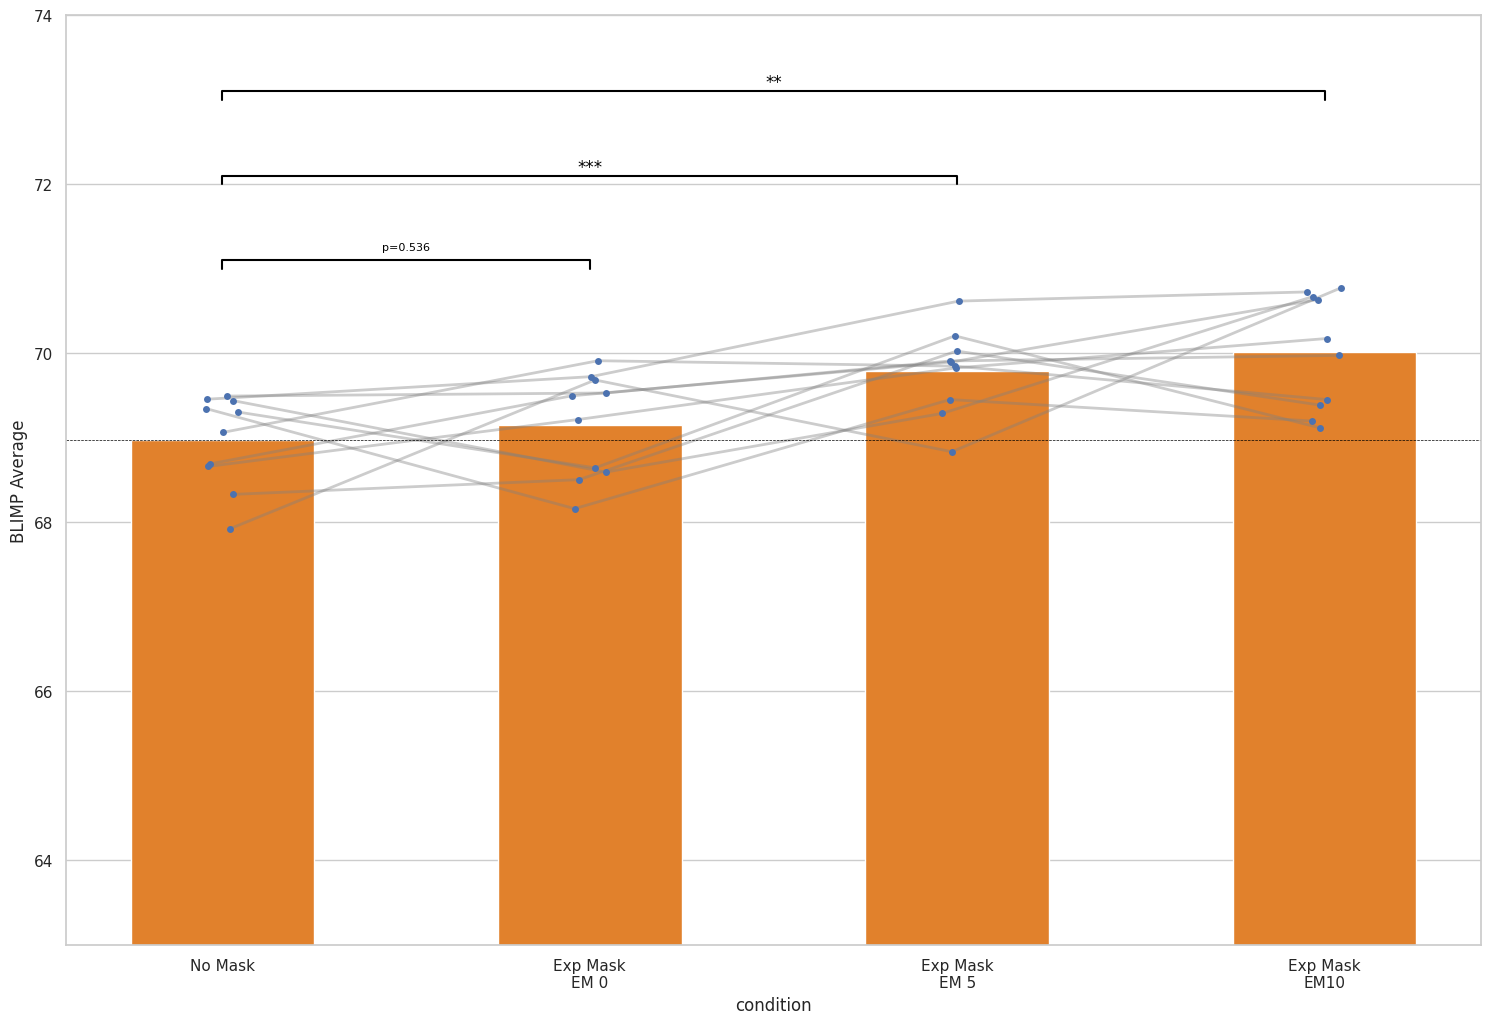

In [77]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    
    return res


#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
# condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
#fig = plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#subfigs = fig.subfigures(1, 1)
stats_test = []
#subfigs = [subfigs]
fig.tight_layout()
# for row, subfig in enumerate(subfigs):
    
data_columns = ["blimp_avg"] #, "supplement_avg", "total_avg"]
row_titles = ["BLIMP Average", "Supplement Average", "Total Average"]#subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
subfig.suptitle(row_titles[0])
#axs = subfig.subplots(1, 3)

#ax = axs[i]
#plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
#plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

#Plot for validation loss for No Mask, ee002_EM01, ee002_EM05, ee002_EM10
plot_data = seed_df_blimp_agg[["seed", "condition", data_columns[0]]][seed_df["condition"].isin(["nomask_EM01", "ee002_EM01", "ee002_EM05", "ee002_EM10"])]

plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

sns.stripplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, jitter=0.05, ax=ax)
connect_dots(ax)
sns.barplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
ax.axhline(y=plot_data[plot_data["condition"]=="No Mask"]["blimp_avg"].mean(), 
           color='black', linestyle='--',  linewidth=0.5)

ax.set_ylabel(row_titles[0])
#ax.set_title(subplot_col_titles[i])
ax.set_ylim(63,74)  
# 
res = annotate_given_colid(ax, 1, 0, plot_data, 71, 0.1, "blimp_avg")
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee0002_EM01", } , **res})
# stats_test[(nomask_condition, ee002_condition)] = res
#res = annotate_given_colid(ax, 1, 2, plot_data, 71.5, 0.1, "blimp_avg")
# stats_test[(ee002_condition, ee2000_condition)] = res

#res = annotate_given_colid(ax, 2, 3, plot_data, 72, 0.1, "blimp_avg")

res = annotate_given_colid(ax, 2, 0, plot_data, 72, 0.1, "blimp_avg")
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee0002_EM05", } , **res})
# stats_test[(ee002_condition, ee2000_condition)] = res

res = annotate_given_colid(ax, 3, 0, plot_data, 73, 0.1, "blimp_avg")
stats_test.append({**{"pair_A":"nomask_EM01", "pair_B":"ee0002_EM10", } , **res})
# stats_test[(ee002_condition, ee2000_condition)] = res

#res = annotate_given_colid(ax, 1, 3, plot_data, 74, 0.1, "blimp_avg")

#stats_test[(nomask_condition, ee2000_condition)] = res
# #plt.show()

import os
print(pd.DataFrame(stats_test))
#
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_blimp_withstats_v3_hq.pdf", dpi=3000)

/tmp/ipykernel_414147/1006265124.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_414147/1006265124.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('se

{}


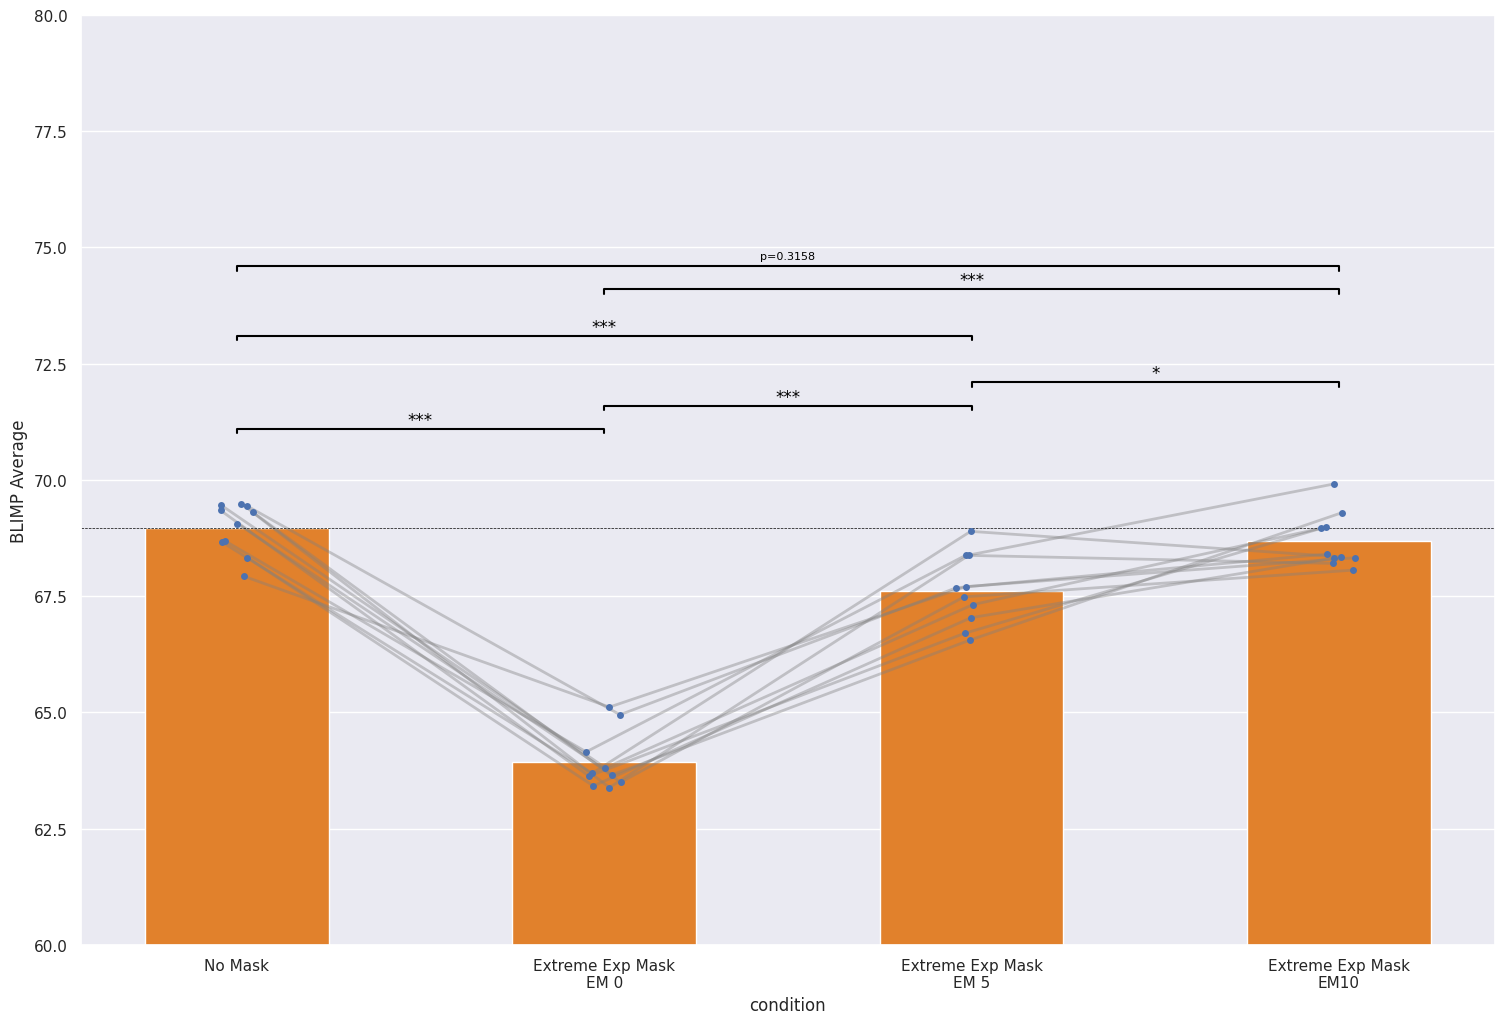

In [80]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    
    return res


#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
# condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
#fig = plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#subfigs = fig.subfigures(1, 1)
stats_test = {}
#subfigs = [subfigs]
fig.tight_layout()
# for row, subfig in enumerate(subfigs):
    
data_columns = ["blimp_avg"] #, "supplement_avg", "total_avg"]
row_titles = ["BLIMP Average", "Supplement Average", "Total Average"]#subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
subfig.suptitle(row_titles[0])
#axs = subfig.subplots(1, 3)

#ax = axs[i]
#plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
#plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

#Plot for validation loss for No Mask, ee002_EM01, ee002_EM05, ee002_EM10
plot_data = seed_df_blimp_agg[["seed", "condition", data_columns[0]]][seed_df["condition"].isin(["nomask_EM01", "ee2000_EM01", "ee2000_EM05", "ee2000_EM10"])]

plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)

sns.stripplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, jitter=0.05, ax=ax)
connect_dots(ax)
sns.barplot(data=plot_data, x="condition", y=data_columns[0], dodge=True, ax=ax, errorbar=None, width=0.5, color='tab:orange')
ax.axhline(y=plot_data[plot_data["condition"]=="No Mask"]["blimp_avg"].mean(), 
           color='black', linestyle='--',  linewidth=0.5)

ax.set_ylabel(row_titles[0])
#ax.set_title(subplot_col_titles[i])
ax.set_ylim(60,80)  
# 
res = annotate_given_colid(ax, 0, 1, plot_data, 71, 0.1, "blimp_avg")
# stats_test[(nomask_condition, ee002_condition)] = res
res = annotate_given_colid(ax, 1, 2, plot_data, 71.5, 0.1, "blimp_avg")
# stats_test[(ee002_condition, ee2000_condition)] = res

res = annotate_given_colid(ax, 2, 3, plot_data, 72, 0.1, "blimp_avg")

res = annotate_given_colid(ax, 0, 2, plot_data, 73, 0.1, "blimp_avg")
# stats_test[(ee002_condition, ee2000_condition)] = res

res = annotate_given_colid(ax, 0, 3, plot_data, 74.5, 0.1, "blimp_avg")
# stats_test[(ee002_condition, ee2000_condition)] = res

res = annotate_given_colid(ax, 1, 3, plot_data, 74, 0.1, "blimp_avg")

#stats_test[(nomask_condition, ee2000_condition)] = res
# #plt.show()

import os
print(stats_test, sep="\n")
#
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_hq", dpi=3000)

In [32]:
seed_df_blimp_agg.head()

class sub_class     seed  \
67  nomask      EM01   2347.0   
68  nomask      EM01     42.0   
69  nomask      EM01      9.0   
70  nomask      EM01    616.0   
71  nomask      EM01  46674.0   

                                                 name    condition   run_id  \
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
68  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892212   
69  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892214   
70  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892216   
71  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892217   

    blimp_avg  supplement_avg  total_avg  
67  68.329172       59.098977  65.614409  
68  69.062397       56.795495  65.454485  
69  69.455094       58.383129  66.198633  
70  69.302948       57.291426  65.770147  
71  69.439197       59.608944  66.547946

In [33]:
seed_df_blimp_indv.head()

class sub_class     seed  \
67  nomask      EM01   2347.0   
68  nomask      EM01     42.0   
69  nomask      EM01      9.0   
70  nomask      EM01    616.0   
71  nomask      EM01  46674.0   

                                                 name    condition   run_id  \
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
68  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892212   
69  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892214   
70  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892216   
71  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892217   

    anaphor_agreement  argument_structure    binding  control_raising  ...  \
67          79.141104           70.889913  68.032057        67.741935  ...   
68          80.112474           70.453443  68.803799        67.454706  ...   
69          74.591002           70.186712  70.629267        67.852408  ...   
70          75.817996           71.738603  70.970614        67.984976  ...   
71          79.550102           71.714355  70.985456        67.764030  ...   

    irregular_forms  island_effects  npi_licensing  quantifiers  \
67        87.430025       51.831091      46.492560    66.331788   
68        83.918575       46.973094      53.036745    77.150953   
69        83.460560       48.168909      54.828424    78.902628   
70        81.526718       47.982063      53.431521    77.666151   
71        84.580153       47.122571      50.561798    72.668727   

    subject_verb_agreement   hypernym  qa_congruence_easy  \
67               64.787715  46.976744             62.5000   
68               65.383921  48.604651             59.3750   
69               65.474255  48.488372             57.8125   
70               64.805781  49.883721             60.9375   
71               66.558266  50.465116             56.2500   

    qa_congruence_tricky  subject_aux_inversion  turn_taking  
67             43.030303              78.702122    64.285714  
68             38.787879              75.067090    62.142857  
69             40.606061              78.580141    66.428571  
70             32.727273              75.408636    67.500000  
71             44.242424              78.872896    68.214286  

[5 rows x 23 columns]

             blimp_avg
condition             
ee2000_EM01  63.929795
ee2000_EM05  67.614185
ee2000_EM10  68.682560
nomask_EM01  68.969896
ee002_EM01   69.145282
ee002_EM05   69.789268
ee002_EM10   70.009676


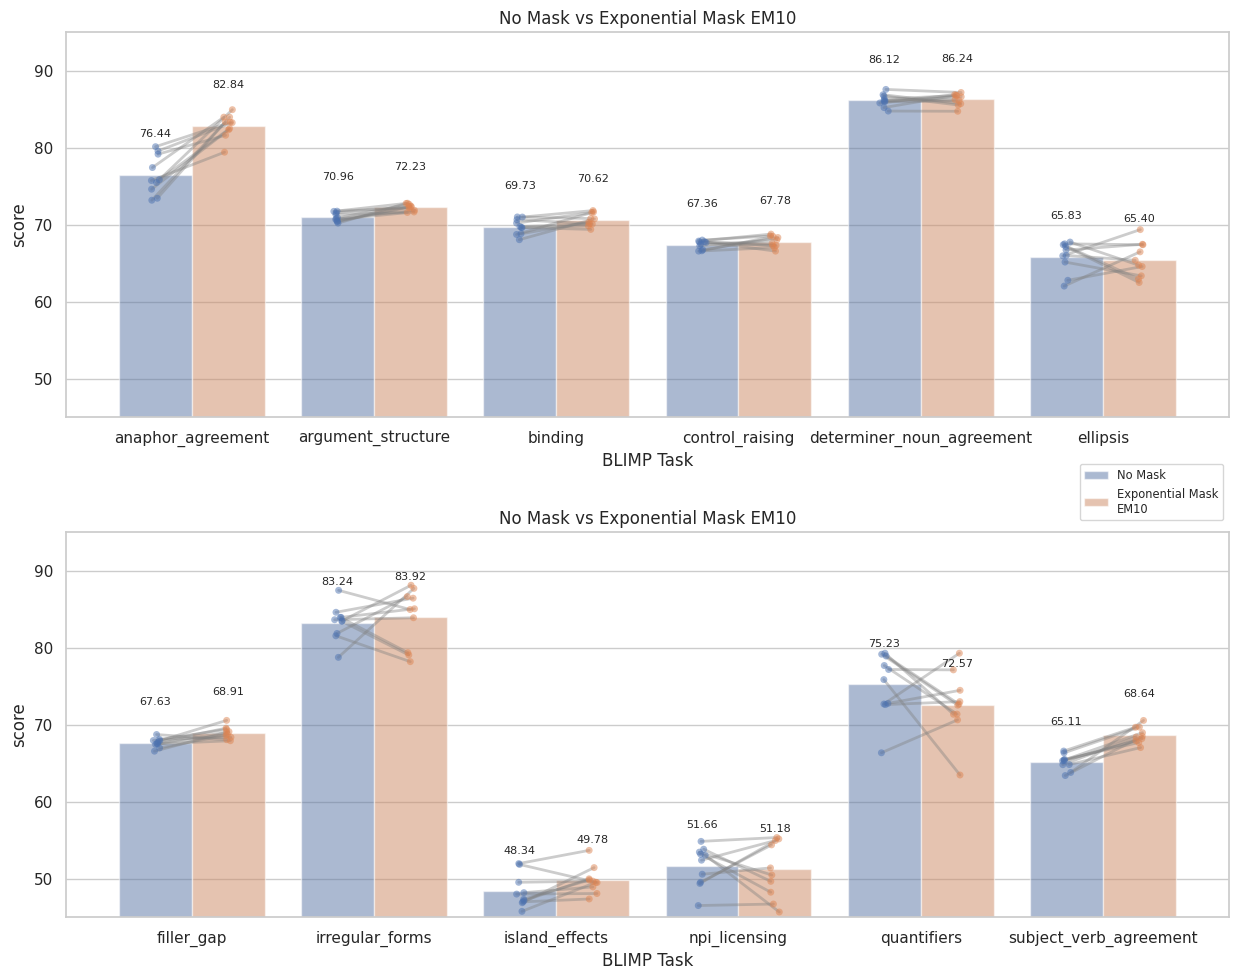

In [34]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        
        xcoord = [xcoord[0::2], xcoord[1::2]]
        ycoord = [ycoord[0::2], ycoord[1::2]]
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

print(seed_df_blimp_agg[["condition", "blimp_avg"]].groupby("condition").agg("mean").sort_values("blimp_avg"))
#Group by condition and get average of all BLIMP_avg and sort by that value
condition_pairs = [("nomask_EM01", "ee002_EM10")]
#For this condition pair, plot all BLIMP tasks
conditional_map = {"nomask_EM01": "No Mask", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15,10))
subfigs = fig.subfigures(2, 1)
#subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    #rename conditions as "nomask_EM01" -> "No Mask", "ee002_EM01" -> "Exponential Mask no EchMem", "ee002_EM05" -> "Exponential Mask EM 5", "ee002_EM10" -> "Exponential Mask EM10"
    
    #data_columns = ["val_loss", "train_loss"]
    row_titles = ["BLIMP Scores"]
    #data_columns = [i[0] for i in blimp_categories] + ["condition", "seed"]
    #Split blimp categories into 2 rows of subplots
    if row == 0:
        data_columns = [i[0] for i in blimp_categories[:6]] + ["condition", "seed"]
    else:
        data_columns = [i[0] for i in blimp_categories[6:12]] + ["condition", "seed"]
    
    # print(data_columns)
    # print(data_columns[:-2])
    #subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1,1)
    #Add spacing between subplots
    
    for i, (nomask_condition, ee002_condition) in enumerate(condition_pairs):
        ax = axs
        plot_data = seed_df_blimp_indv[data_columns][seed_df["condition"].isin([nomask_condition, ee002_condition])]
        plot_data["condition"] = plot_data["condition"].map(conditional_map)
        
        #Pivot blimp_categories into rows 
        plot_data = pd.melt(plot_data, id_vars=["condition", "seed"], value_vars=[k for k in data_columns[:-2]                                                                                ]).rename(columns={"variable": "blimp_task", "value": "score"})
        
        sns.barplot(data=plot_data, x="blimp_task", y="score" , hue="condition",
                      dodge=True, alpha=.5, ax=ax, errorbar=None)
        
        #Add value labels to each bar slighly above the bar
        
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()+3.5),
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=8)
        
        sns.stripplot(data=plot_data, x="blimp_task", y="score", hue="condition", dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        
        #set title for each subplot but remove \n from mapping
        ax.set_title(conditional_map[nomask_condition].replace("\n", " ") + " vs " + conditional_map[ee002_condition].replace("\n", " "))
        #ax.xaxis.set_tick_params(rotation=45)
        ax.set_ylim(45, 95)
        ax.set_xlabel("BLIMP Task")
        #Remove legend for each subplot
        ax.get_legend().remove()
        
#1 common legend for all subplots
#Remove duplicate legend entries

# for k in range(12):
#     

handles, labels = ax.get_legend_handles_labels()
#Legend position is set to top right and overlapping with the plot
fig.legend(handles[:2], labels[:2], loc='right', bbox_to_anchor=(0.90, 0.48), fontsize='x-small')


             blimp_avg
condition             
ee2000_EM01  63.929795
ee2000_EM05  67.614185
ee2000_EM10  68.682560
nomask_EM01  68.969896
ee002_EM01   69.145282
ee002_EM05   69.789268
ee002_EM10   70.009676


/tmp/ipykernel_95131/790148357.py:251: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==list(conditional_map.values())[1]]["score"].values[0] - x[x['condition']==list(conditional_map.values())[0]]["score"].values[0])
/tmp/ipykernel_95131/790148357.py:251: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_

Saving figure as MASTER_SAVE_SETTING is True


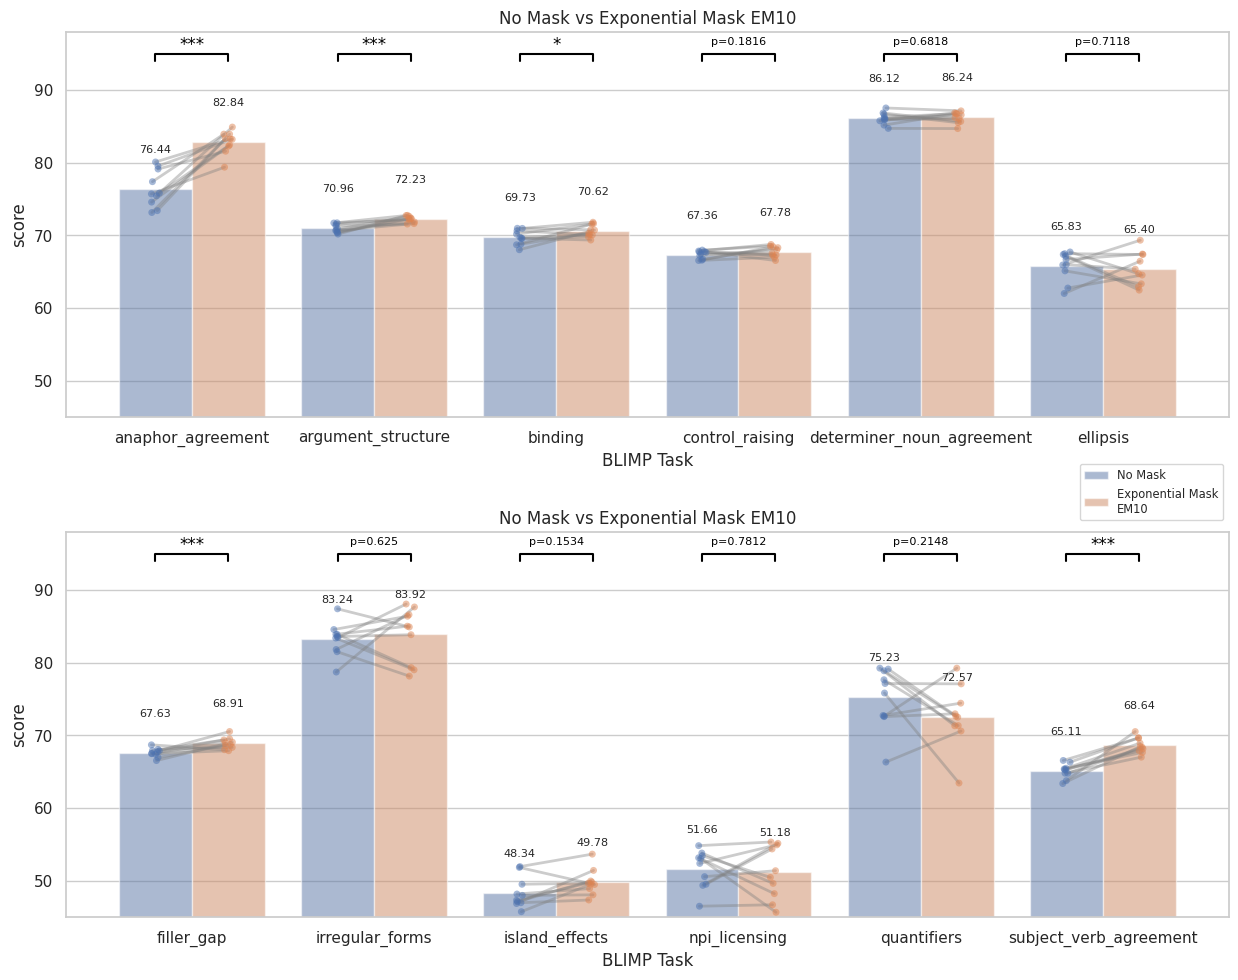

In [79]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        
        xcoord = [xcoord[0::2], xcoord[1::2]]
        ycoord = [ycoord[0::2], ycoord[1::2]]
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

# def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
#     """ for a given ax_object (from scatterplot or sns.stripplot or the like)
#     connect the dots (arbtirary number of columns)"""
#     cs=ax_obj.collections
#     xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
#     ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
#     for (xcoord,ycoord) in zip(xcoords,ycoords):
#         ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)
# 
#     return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    #ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    #Given a x1, plot within its hue
    ax.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x1)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x1)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, plot_data, y, h, conditional_map):
    # col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    # col_names = {i: col_name for i, col_name in enumerate(col_names)}
    # #print(col_names)
    # #Using the column names, get the data for each condition #Just do for 0,1 for now
    # 
    # stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    # stats_test_subset = stats_test_subset[stats_test_subset["blimp_task"] == blimp_category][["condition", "seed", "score"]]
    # print(stats_test_subset)
    # #Get pairwise differences
    # pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    # print(pairwise_diff)
    # # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    # res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    # #print(res)
    # #Use results to annotate the plot
    # annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    # 
    # return res
    # 

    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    
    #Annotate within hue 
    #res = annotate_given_colid(ax, 0, 1, plot_data, 90, 2, "score", col_names[0])
    
    stats_test_subset = plot_data[plot_data["condition"].isin(conditional_map.values())][["condition", "seed", "score"]][plot_data["blimp_task"] == col_names[col_id1]]
    
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==list(conditional_map.values())[1]]["score"].values[0] - x[x['condition']==list(conditional_map.values())[0]]["score"].values[0])
    # print(stats_test_subset)
    # print(pairwise_diff)
    
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    annotate_plot(ax, col_id1, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))


print(seed_df_blimp_agg[["condition", "blimp_avg"]].groupby("condition").agg("mean").sort_values("blimp_avg"))
#Group by condition and get average of all BLIMP_avg and sort by that value
condition_pairs = [("nomask_EM01", "ee002_EM10")]
#For this condition pair, plot all BLIMP tasks
conditional_map = {"nomask_EM01": "No Mask", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15,10))
subfigs = fig.subfigures(2, 1)
#subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    #rename conditions as "nomask_EM01" -> "No Mask", "ee002_EM01" -> "Exponential Mask no EchMem", "ee002_EM05" -> "Exponential Mask EM 5", "ee002_EM10" -> "Exponential Mask EM10"
    
    #data_columns = ["val_loss", "train_loss"]
    row_titles = ["BLIMP Scores"]
    #data_columns = [i[0] for i in blimp_categories] + ["condition", "seed"]
    #Split blimp categories into 2 rows of subplots
    if row == 0:
        data_columns = [i[0] for i in blimp_categories[:6]] + ["condition", "seed"]
    else:
        data_columns = [i[0] for i in blimp_categories[6:12]] + ["condition", "seed"]
    
    # print(data_columns)
    # print(data_columns[:-2])
    #subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1,1)
    #Add spacing between subplots
    
    for i, (nomask_condition, ee002_condition) in enumerate(condition_pairs):
        ax = axs
        plot_data = seed_df_blimp_indv[data_columns][seed_df["condition"].isin([nomask_condition, ee002_condition])]
        plot_data["condition"] = plot_data["condition"].map(conditional_map)
        
        #Pivot blimp_categories into rows 
        plot_data = pd.melt(plot_data, id_vars=["condition", "seed"], value_vars=[k for k in data_columns[:-2]                                                                                ]).rename(columns={"variable": "blimp_task", "value": "score"})
        
        sns.barplot(data=plot_data, x="blimp_task", y="score" , hue="condition",
                      dodge=True, alpha=.5, ax=ax, errorbar=None)
        
        #Add value labels to each bar slighly above the bar
        
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()+3.5),
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=8)
        
        sns.stripplot(data=plot_data, x="blimp_task", y="score", hue="condition", dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        
        #set title for each subplot but remove \n from mapping
        ax.set_title(conditional_map[nomask_condition].replace("\n", " ") + " vs " + conditional_map[ee002_condition].replace("\n", " "))
        #ax.xaxis.set_tick_params(rotation=45)
        ax.set_ylim(45, 98)
        ax.set_xlabel("BLIMP Task")
        #Remove legend for each subplot
        ax.get_legend().remove()
        
        #Print colnames

        # print(res)
        for k in range(6):
            annotate_given_colid(ax, k, plot_data, 94, 1, conditional_map)
#1 common legend for all subplots
#Remove duplicate legend entries

# for k in range(12):
#     

handles, labels = ax.get_legend_handles_labels()
#Legend position is set to top right and overlapping with the plot
fig.legend(handles[:2], labels[:2], loc='right', bbox_to_anchor=(0.90, 0.48), fontsize='x-small')

save_matplot_fig(fig, "pairwise_comp_blimp_subtask_scores_withstats_v2_mq.pdf", dpi=3000)

In [36]:
condition_pair = [("nomask_EM01", "ee002_EM10")]
data_columns = [i[0] for i in blimp_categories] + ["condition", "seed"]
plot_data = seed_df_blimp_indv[data_columns][seed_df["condition"].isin([condition_pair[0][0], condition_pair[0][1]])]
#plot_data["condition"] = plot_data["condition"].map(conditional_map)
print(plot_data.columns)
#Pivot blimp_categories into rows 
plot_data = pd.melt(plot_data, id_vars=["condition", "seed"], value_vars=[i[0] for i in blimp_categories]).rename(columns={"variable": "blimp_task", "value": "score"})
plot_data

Index(['anaphor_agreement', 'argument_structure', 'binding', 'control_raising',
       'determiner_noun_agreement', 'ellipsis', 'filler_gap',
       'irregular_forms', 'island_effects', 'npi_licensing', 'quantifiers',
       'subject_verb_agreement', 'hypernym', 'qa_congruence_easy',
       'qa_congruence_tricky', 'subject_aux_inversion', 'turn_taking',
       'condition', 'seed'],
      dtype='object')


condition     seed         blimp_task      score
0    nomask_EM01   2347.0  anaphor_agreement  79.141104
1    nomask_EM01     42.0  anaphor_agreement  80.112474
2    nomask_EM01      9.0  anaphor_agreement  74.591002
3    nomask_EM01    616.0  anaphor_agreement  75.817996
4    nomask_EM01  46674.0  anaphor_agreement  79.550102
..           ...      ...                ...        ...
335   ee002_EM10    616.0        turn_taking  67.500000
336   ee002_EM10   6747.0        turn_taking  64.285714
337   ee002_EM10    869.0        turn_taking  68.928571
338   ee002_EM10    466.0        turn_taking  66.785714
339   ee002_EM10  11111.0        turn_taking  65.000000

[340 rows x 4 columns]

In [37]:

#Best condition is ee002_EM10
#Create comparative plot for all BLIMP tasks for nomask_EM01 and ee002_EM10


seed_df_rt_subj["subject_id"].sample(30)

53      AER86HM7LU5G
26    A2BET78ZNEHNHE
12    A3UDP95JGEX3H1
55    A3S82OHUGFBR7L
11    A1RCM1Y87J0FGW
16    A12QOWM20FCN2Q
57     AY1ZVSTHEQDH8
34    A2TJHKHM8T2SV3
58     ANDPWG91K8OEX
50    A3AA8NU3WAJ3ED
20    A2PURNW8W7L0LT
62     AOVB3KCIIJLRJ
72    A2MSCP411YP41Q
30    A37PQ1206C9RZP
38    A117RW2F1MNBQ8
69     A5E076UK5CA9J
18    A1U1QL617G5DU3
67    A2GNS1SQLQNMR2
25    A37I1ETWW49IZO
39     A5FJBKJ8K5I6S
31     AVG2BI8CS5YKX
67    A1WXZPUAXDE0DQ
24     A40F6EHXE5HXU
20      A7MOPEHSUGVQ
59     A98XHW6B1VSSQ
31    A3QJPB0NZU5PY1
41    A3OQ1JKWS02NMF
37    A1FNEVG87BS5K0
38    A1LDS7FXQNGLEN
52    A1JBTEJN14MFFA
Name: subject_id, dtype: object

/tmp/ipykernel_2655064/1411932268.py:227: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_2655064/1411932268.py:227: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('

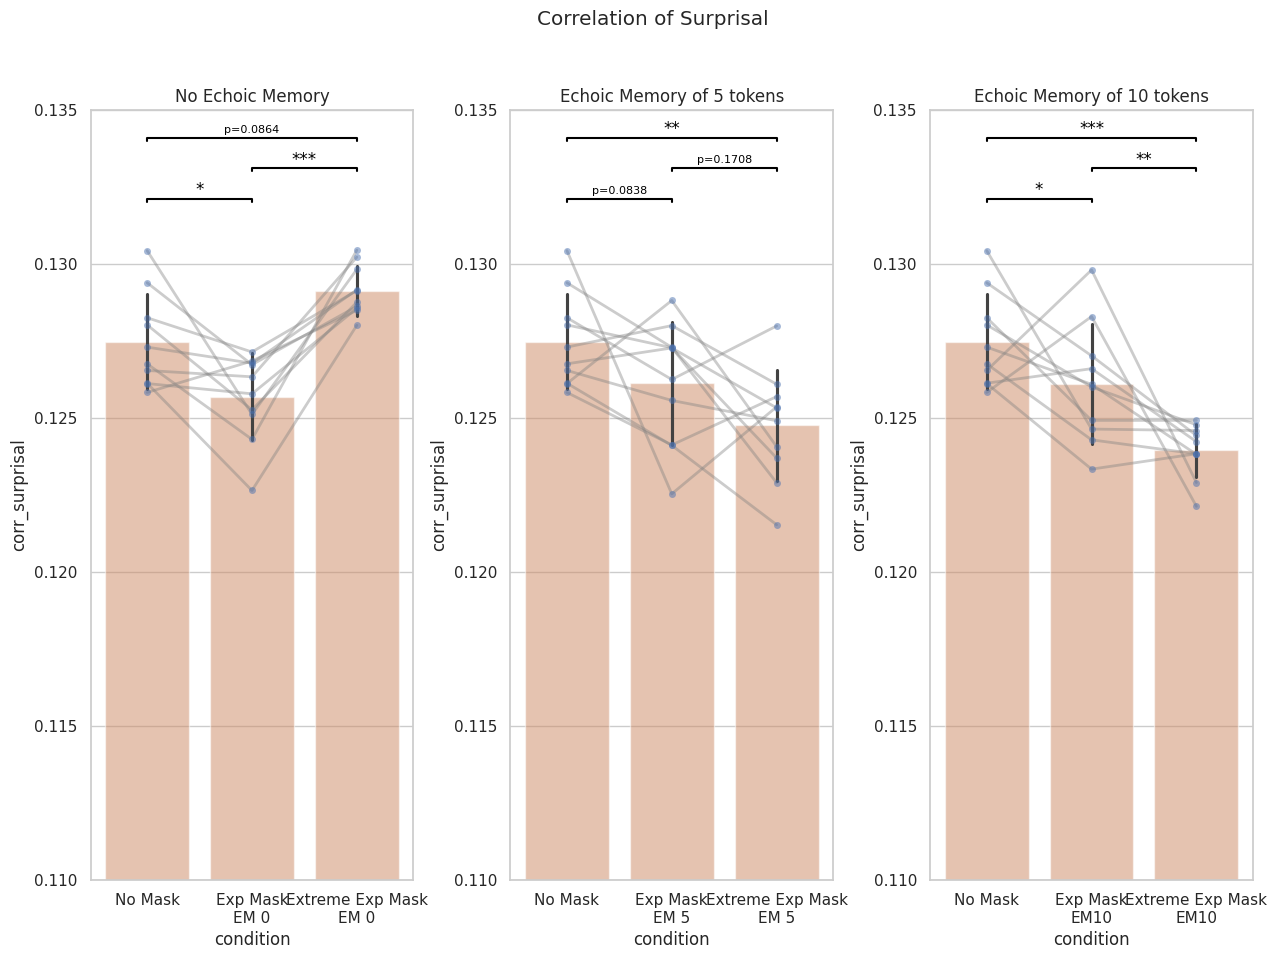

In [38]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    #ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)
        

def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    #print(stats_test_subset)
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}




fig = plt.figure(figsize=(15,10))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.3)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        
        
        plot_data = seed_df_rt[["condition", "seed", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar="sd")
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        #
        ax.set_title(subplot_col_titles[i])
        ax.set_ylim(0.11, 0.135) 
        
        res = annotate_given_colid(ax, 0, 1, plot_data, 0.132, 0.0001, data_columns[row])
        stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(ax, 1, 2, plot_data, 0.133, 0.0001, data_columns[row])
        stats_test[(ee002_condition, ee2000_condition)] = res
        res = annotate_given_colid(ax, 0, 2, plot_data, 0.134, 0.0001, data_columns[row])
        stats_test[(nomask_condition, ee2000_condition)] = res
        



      seed   condition  val_loss
29  2347.0  ee002_EM10  3.826926


/tmp/ipykernel_2655064/1846379446.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_2655064/1846379446.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_2655064/1846379446.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]


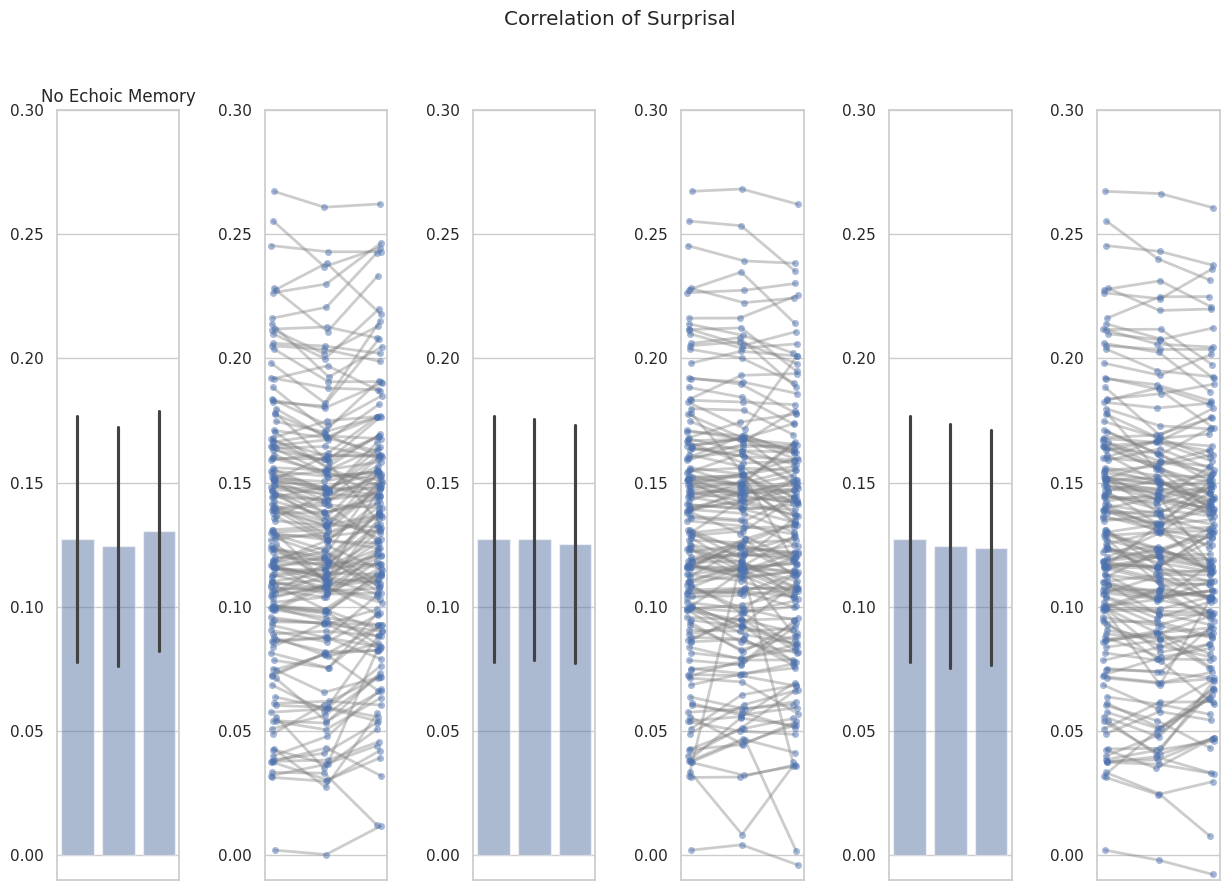

In [39]:
#Need to find a way to pick best seed 
#Maybe seed_df with minimum val_loss 
print(seed_df.sort_values("val_loss").head(1)[["seed", "condition", "val_loss"]])

#Picking 2347.0 as seed

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
#seed_df_rt_subj_bestseed

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}


fig = plt.figure(figsize=(15, 10))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
for row, subfig in enumerate(subfigs):
    
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 6)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[2*i+1]
        plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        #print(plot_data.head())
    
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
    
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=axs[2*i], errorbar="sd")
        # sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        # connect_dots(ax)
        # sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar="sd")
        # #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        
        ax.set_xticklabels([])
        axs[2*i].set_xticklabels([])
        ax.set_ylabel("")
        axs[2*i].set_ylabel("")
        ax.set_xlabel("")
        axs[2*i].set_xlabel("")
        
        ax.set_ylim(-0.01, 0.3) 
        axs[2*i].set_ylim(-0.01, 0.3)
        
    axs[0].set_title("No Echoic Memory")

      seed   condition  val_loss
29  2347.0  ee002_EM10  3.826926


/tmp/ipykernel_2655064/3019020521.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_2655064/3019020521.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_2655064/3019020521.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]


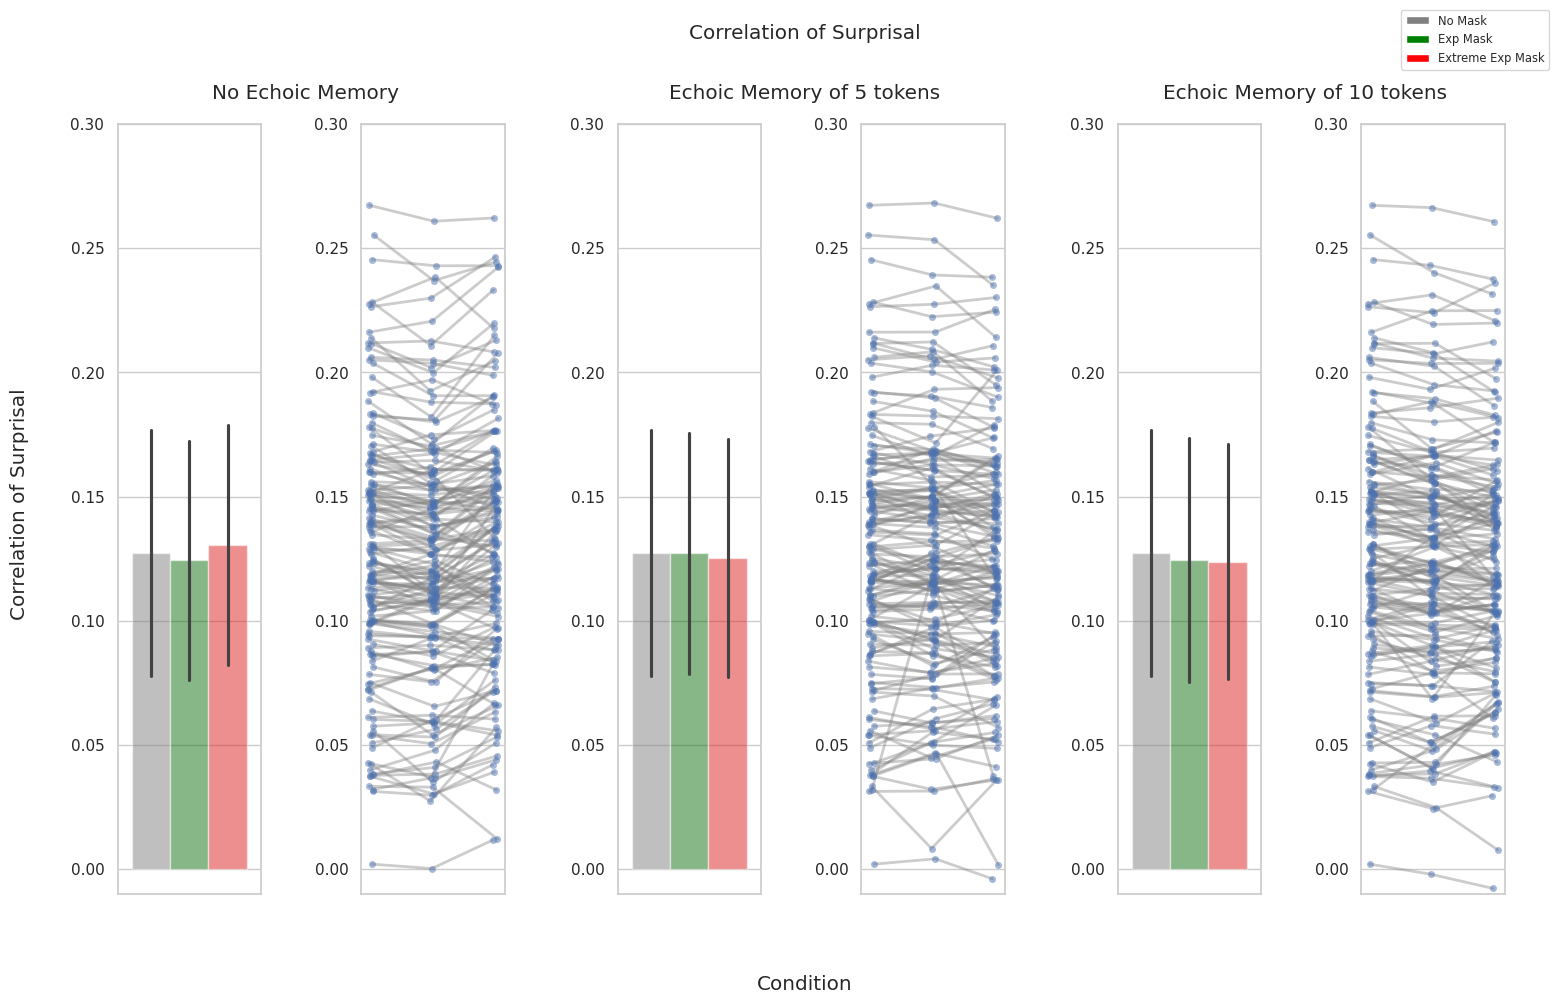

In [40]:
#Need to find a way to pick best seed 
#Maybe seed_df with minimum val_loss 
print(seed_df.sort_values("val_loss").head(1)[["seed", "condition", "val_loss"]])

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
#seed_df_rt_subj_bestseed

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}



fig = plt.figure(figsize=(15, 10))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
#fig.tight_layout()
for row, subfig in enumerate(subfigs):
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    #subfig.suptitle(row_titles[row])
    axs = subfig.subfigures(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        ax2 = ax.subplots(1, 2)
        
        plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        #print(plot_data.head())
        
        #Color mapping for each condition
        color_map = {"No Mask": "grey", 
                     "Exp Mask\nEM 0": "green", "Exp Mask\nEM 5": "green", "Exp Mask\nEM10": "green", 
                     "Extreme Exp Mask\nEM 0": "red", "Extreme Exp Mask\nEM 5": "red", "Extreme Exp Mask\nEM10": "red"}
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax2[1])
        connect_dots(ax2[1])
    
        sns.barplot(data=plot_data, hue="condition", y=data_columns[row], dodge=True, legend=False,
                    alpha=.5, ax=ax2[0], errorbar="sd", palette=color_map)
        
        sup_title = "No Echoic Memory" if i == 0 else "Echoic Memory of 5 tokens" if i == 1 else "Echoic Memory of 10 tokens"
        ax.suptitle(sup_title, y=0.92)
        ax2[0].set_xticklabels([])
        ax2[1].set_xticklabels([])
        ax2[0].set_ylabel("")
        ax2[1].set_ylabel("")
        ax2[0].set_xlabel("")
        ax2[1].set_xlabel("")
        ax2[0].set_ylim(-0.01, 0.3)
        ax2[1].set_ylim(-0.01, 0.3)
    #     ax.set_xticklabels([])
    #     axs[2*i].set_xticklabels([])
    #     ax.set_ylabel("")
    #     axs[2*i].set_ylabel("")
    #     ax.set_xlabel("")
    #     axs[2*i].set_xlabel("")
    #     
    #     ax.set_ylim(-0.01, 0.3) 
    #     axs[2*i].set_ylim(-0.01, 0.3)
    #     
    # axs[0].set_title("No Echoic Memory")
fig.supxlabel("Condition")
fig.supylabel("Correlation of Surprisal", x=-0.03)
fig.suptitle("Correlation of Surprisal")

from matplotlib.patches import Patch
# Grey is No Mask, Green is Exp Mask, Red is Extreme Exp Mask
fig.legend(handles=[Patch(facecolor='grey', label='No Mask'),     Patch(facecolor='green', label='Exp Mask'),
    Patch(facecolor='red', label='Extreme Exp Mask')
], loc='upper right', bbox_to_anchor=(1, 1), fontsize='x-small')

Index(['class', 'sub_class', 'seed', 'name', 'condition', 'run_id',
       'subject_id', 'corr_surprisal'],
      dtype='object')


/tmp/ipykernel_414147/4148058369.py:281: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_414147/4148058369.py:227: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_414147/4148058369.py:227: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is 

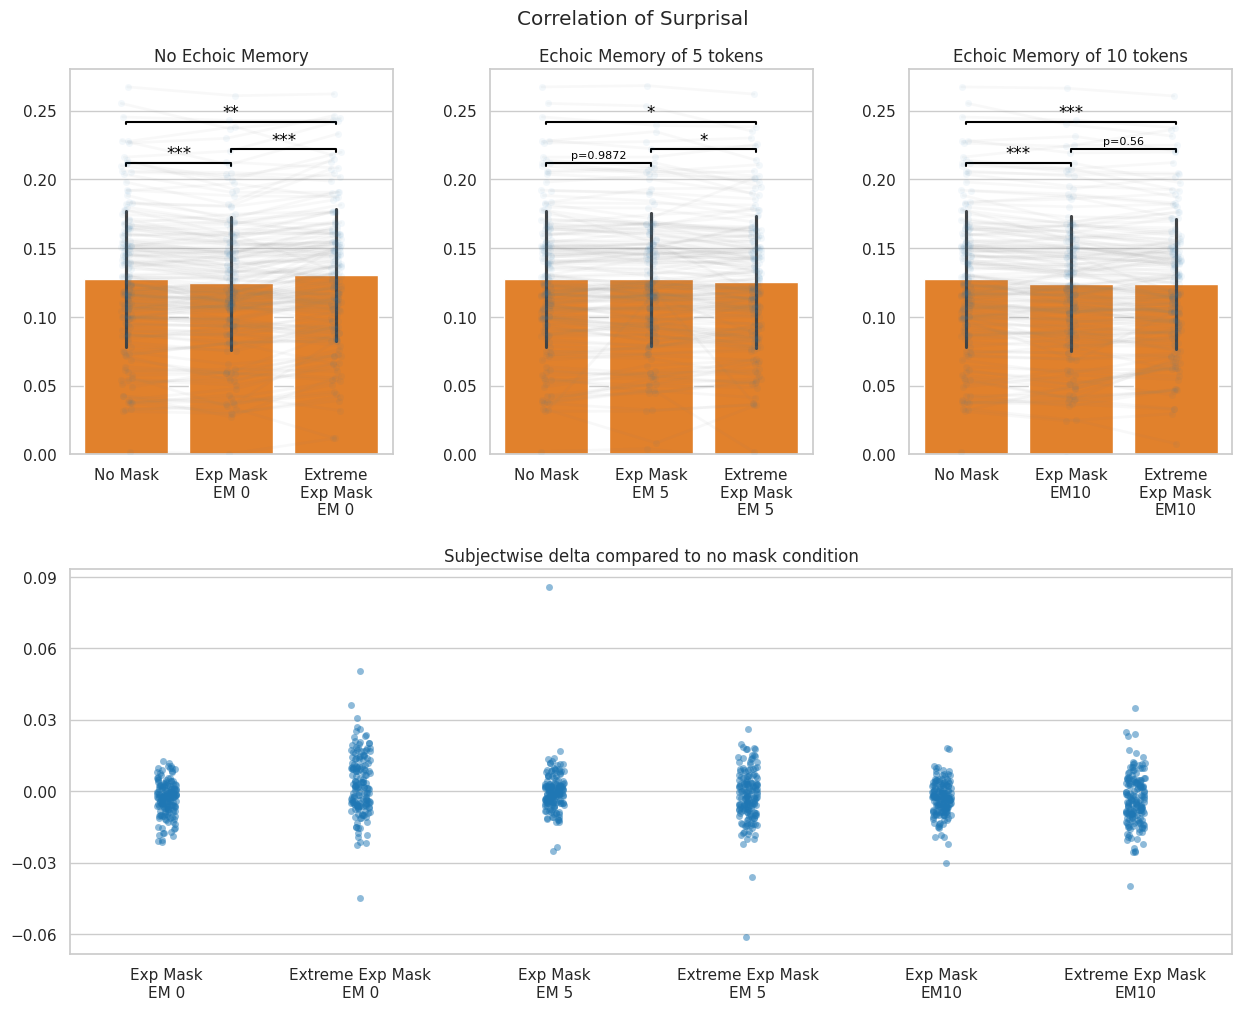

In [40]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    #ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)
        

def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    #print(stats_test_subset)
    pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
print(seed_df_rt_subj_bestseed.columns)
#seed_df_rt_subj_bestseed


#crea
# te 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme\nExp Mask\nEM 0",
                         "ee2000_EM05": "Extreme\nExp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme\nExp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}




fig = plt.figure(figsize=(15,10))
subfigs = fig.subfigures(2, 1)
#subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    if row == 0:
            
        data_columns = ["corr_surprisal"]
        row_titles = ["Correlation of Surprisal"]
        subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
        
        #add with space between suptitle and subplots
        subfig.suptitle(row_titles[row], y=1)
        
        axs = subfig.subplots(1, 3)
        #Add spacing between subplots
        subfig.subplots_adjust(wspace=0.3)
        for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
            ax = axs[i]
            
            
            plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
            plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
            
            
            #sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0, ax=ax)
            #
            sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=ax, errorbar="sd", color='tab:orange')
            sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.05, jitter=0.05, ax=ax, color='tab:blue')
            connect_dots(ax, alpha=0.05)
            #sns.boxplot(data=plot_data, x="condition", y=data_columns[row], ax=ax)
            #set title for each subplot but remove \n from mapping
            # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
            #
            ax.set_title(subplot_col_titles[i])
            ax.set_ylim(0, 0.28) 
            ax.set_xlabel("")
            ax.set_ylabel("")
            
            res = annotate_given_colid(ax, 0, 1, plot_data, 0.21, 0.002, data_columns[row])
            stats_test[(nomask_condition, ee002_condition)] = res
            res = annotate_given_colid(ax, 1, 2, plot_data, 0.22, 0.002, data_columns[row])
            stats_test[(ee002_condition, ee2000_condition)] = res
            res = annotate_given_colid(ax, 0, 2, plot_data, 0.24, 0.002, data_columns[row])
            stats_test[(nomask_condition, ee2000_condition)] = res

    elif row == 1:
        
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
        #seed_df_rt_subj_bestseed
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[['condition', 'subject_id', 'corr_surprisal']].pivot(index='subject_id', columns='condition', values='corr_surprisal')
        seed_df_rt_subj_bestseed_delta["delta_2EM01"] = seed_df_rt_subj_bestseed_delta["ee002_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM05"] = seed_df_rt_subj_bestseed_delta["ee002_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM10"] = seed_df_rt_subj_bestseed_delta["ee002_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM01"] = seed_df_rt_subj_bestseed_delta["ee2000_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM05"] = seed_df_rt_subj_bestseed_delta["ee2000_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM10"] = seed_df_rt_subj_bestseed_delta["ee2000_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        
        seed_df_rt_subj_bestseed_delta
        
        #Change order or columns to delta_2EM01, delta2000EM01, delta_2EM05, delta2000EM05, delta_2EM10, delta2000EM10
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[["delta_2EM01", "delta_2000EM01", "delta_2EM05", "delta_2000EM05", "delta_2EM10", "delta_2000EM10"]]
        
        column_rename_map = {"nomask_EM01": "No Mask", 
                                 "delta_2EM01": "Exp Mask\nEM 0", 
                                 "delta_2EM05": "Exp Mask\nEM 5", 
                                 "delta_2EM10": "Exp Mask\nEM10", 
                                 "delta_2000EM01": "Extreme Exp Mask\nEM 0",
                                 "delta_2000EM05": "Extreme Exp Mask\nEM 5", 
                                 "delta_2000EM10": "Extreme Exp Mask\nEM10"}
        
        
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta.rename(columns=column_rename_map)
        
        #print(seed_df_rt_subj_bestseed_delta)
        ax = subfig.subplots(1, 1)
        sns.stripplot(data=seed_df_rt_subj_bestseed_delta, ax=ax, color='tab:blue', jitter=0.05, alpha=0.5)
        ax.set_title("Subjectwise delta compared to no mask condition")
        ax.set_xlabel("")
        
        #minimise y axis ticks
        ax.yaxis.set_major_locator(plt.MaxNLocator(6))

save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_mq_v2", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_hq_v2", dpi=2000)


{}
Index(['class', 'sub_class', 'seed', 'name', 'condition', 'run_id',
       'subject_id', 'corr_surprisal'],
      dtype='object')


/tmp/ipykernel_414147/2501892678.py:528: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([
/tmp/ipykernel_414147/2501892678.py:474: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_414147/2501892678.py:474: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grou

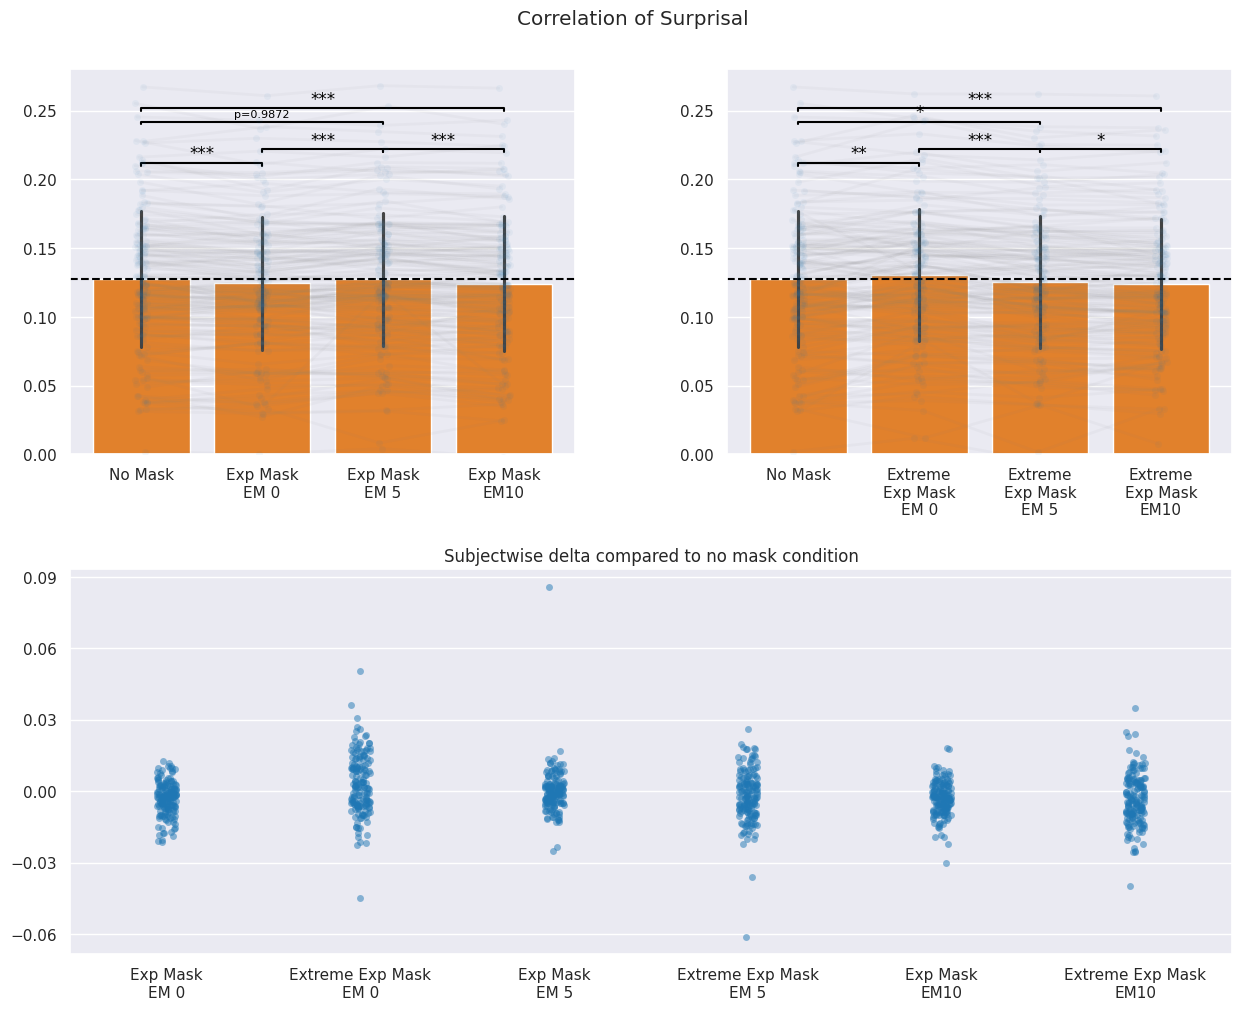

In [89]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    
    return res




#stats_test[(nomask_condition, ee2000_condition)] = res
# #plt.show()

import os
print(stats_test, sep="\n")
#
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_hq", dpi=3000)


def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    #ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)
        

def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    #print(stats_test_subset)
    pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
print(seed_df_rt_subj_bestseed.columns)
#seed_df_rt_subj_bestseed


#crea
# te 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme\nExp Mask\nEM 0",
                         "ee2000_EM05": "Extreme\nExp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme\nExp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}




fig = plt.figure(figsize=(15,10))
subfigs = fig.subfigures(2, 1)
#subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    if row == 0:
            
        data_columns = ["corr_surprisal"]
        row_titles = ["Correlation of Surprisal"]
        subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
        
        #add with space between suptitle and subplots
        subfig.suptitle(row_titles[row], y=1)
        
        axs = subfig.subplots(1, 2)
        #Add spacing between subplots
        subfig.subplots_adjust(wspace=0.3)
    
        
        
        
        plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([
            "nomask_EM01", "ee002_EM01", "ee002_EM05", "ee002_EM10"])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        
        #sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0, ax=ax)
        #
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=axs[0], errorbar="sd", color='tab:orange')
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.05, jitter=0.05, ax=axs[0], color='tab:blue')
        connect_dots(axs[0], alpha=0.05)
        
        #Horizontal line at nomask_EM01 
        axs[0].axhline(y=plot_data[plot_data["condition"] == "No Mask"]["corr_surprisal"].mean(), color='black', linestyle='--')
        #sns.boxplot(data=plot_data, x="condition", y=data_columns[row], ax=ax)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        #
        #ax.set_title(subplot_col_titles[i])
        axs[0].set_ylim(0, 0.28) 
        axs[0].set_xlabel("")
        axs[0].set_ylabel("")
        
        res = annotate_given_colid(axs[0], 0, 1, plot_data, 0.21, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(axs[0], 1, 2, plot_data, 0.22, 0.002, data_columns[row])
        #stats_test[(ee002_condition, ee2000_condition)] = res0
        res = annotate_given_colid(axs[0], 2, 3, plot_data, 0.22, 0.002, data_columns[row])

        res = annotate_given_colid(axs[0], 0, 2, plot_data, 0.24, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee2000_condition)] = res

        res = annotate_given_colid(axs[0], 0, 3, plot_data, 0.25, 0.002, data_columns[row])

        plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([
            "nomask_EM01", "ee2000_EM01", "ee2000_EM05", "ee2000_EM10"])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        
        #sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0, ax=ax)
        #
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=axs[1], errorbar="sd", color='tab:orange')
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.05, jitter=0.05, ax=axs[1], color='tab:blue')
        connect_dots(axs[1], alpha=0.05)
        
        #Horizontal line at nomask_EM01 
        axs[1].axhline(y=plot_data[plot_data["condition"] == "No Mask"]["corr_surprisal"].mean(), color='black', linestyle='--')
        #sns.boxplot(data=plot_data, x="condition", y=data_columns[row], ax=ax)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        #
        #ax.set_title(subplot_col_titles[i])
        axs[1].set_ylim(0, 0.28) 
        axs[1].set_xlabel("")
        axs[1].set_ylabel("")
        
        res = annotate_given_colid(axs[1], 0, 1, plot_data, 0.21, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee002_condition)] = res
        res = annotate_given_colid(axs[1], 1, 2, plot_data, 0.22, 0.002, data_columns[row])
        #stats_test[(ee002_condition, ee2000_condition)] = res0
        res = annotate_given_colid(axs[1], 2, 3, plot_data, 0.22, 0.002, data_columns[row])

        res = annotate_given_colid(axs[1], 0, 2, plot_data, 0.24, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee2000_condition)] = res

        res = annotate_given_colid(axs[1], 0, 3, plot_data, 0.25, 0.002, data_columns[row])


    elif row == 1:
        
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
        #seed_df_rt_subj_bestseed
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[['condition', 'subject_id', 'corr_surprisal']].pivot(index='subject_id', columns='condition', values='corr_surprisal')
        seed_df_rt_subj_bestseed_delta["delta_2EM01"] = seed_df_rt_subj_bestseed_delta["ee002_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM05"] = seed_df_rt_subj_bestseed_delta["ee002_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM10"] = seed_df_rt_subj_bestseed_delta["ee002_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM01"] = seed_df_rt_subj_bestseed_delta["ee2000_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM05"] = seed_df_rt_subj_bestseed_delta["ee2000_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2000EM10"] = seed_df_rt_subj_bestseed_delta["ee2000_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        
        seed_df_rt_subj_bestseed_delta
        
        #Change order or columns to delta_2EM01, delta2000EM01, delta_2EM05, delta2000EM05, delta_2EM10, delta2000EM10
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[["delta_2EM01", "delta_2000EM01", "delta_2EM05", "delta_2000EM05", "delta_2EM10", "delta_2000EM10"]]
        
        column_rename_map = {"nomask_EM01": "No Mask", 
                                 "delta_2EM01": "Exp Mask\nEM 0", 
                                 "delta_2EM05": "Exp Mask\nEM 5", 
                                 "delta_2EM10": "Exp Mask\nEM10", 
                                 "delta_2000EM01": "Extreme Exp Mask\nEM 0",
                                 "delta_2000EM05": "Extreme Exp Mask\nEM 5", 
                                 "delta_2000EM10": "Extreme Exp Mask\nEM10"}
        
        
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta.rename(columns=column_rename_map)
        
        #print(seed_df_rt_subj_bestseed_delta)
        ax = subfig.subplots(1, 1)
        sns.stripplot(data=seed_df_rt_subj_bestseed_delta, ax=ax, color='tab:blue', jitter=0.05, alpha=0.5)
        ax.set_title("Subjectwise delta compared to no mask condition")
        ax.set_xlabel("")
        
        #minimise y axis ticks
        ax.yaxis.set_major_locator(plt.MaxNLocator(6))

# save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_mq_v2", dpi=1000)
# save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_hq_v2", dpi=2000)



[{'pair_A': 'nomask_EM01', 'pair_B': 'ee0002_EM01', 'mean                    ': 0.1753865602029407, '95%_CI around mean      ': (-0.33072844503274623, 0.6691416469740857), 'bootstrap-t-test p_value': 'p=0.536'}, {'pair_A': 'nomask_EM01', 'pair_B': 'ee0002_EM05', 'mean                    ': 0.8193723241376702, '95%_CI around mean      ': (0.43362099233637424, 1.2460334242764488), 'bootstrap-t-test p_value': 'p=0.0006'}, {'pair_A': 'nomask_EM01', 'pair_B': 'ee0002_EM10', 'mean                    ': 1.0397806165729833, '95%_CI around mean      ': (0.5161924435294784, 1.544281033669684), 'bootstrap-t-test p_value': 'p=0.0086'}]
Index(['class', 'sub_class', 'seed', 'name', 'condition', 'run_id',
       'subject_id', 'corr_surprisal'],
      dtype='object')


/tmp/ipykernel_95131/3577765158.py:528: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([
/tmp/ipykernel_95131/3577765158.py:474: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
/tmp/ipykernel_95131/3577765158.py:474: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the groupin

Saving figure as MASTER_SAVE_SETTING is True


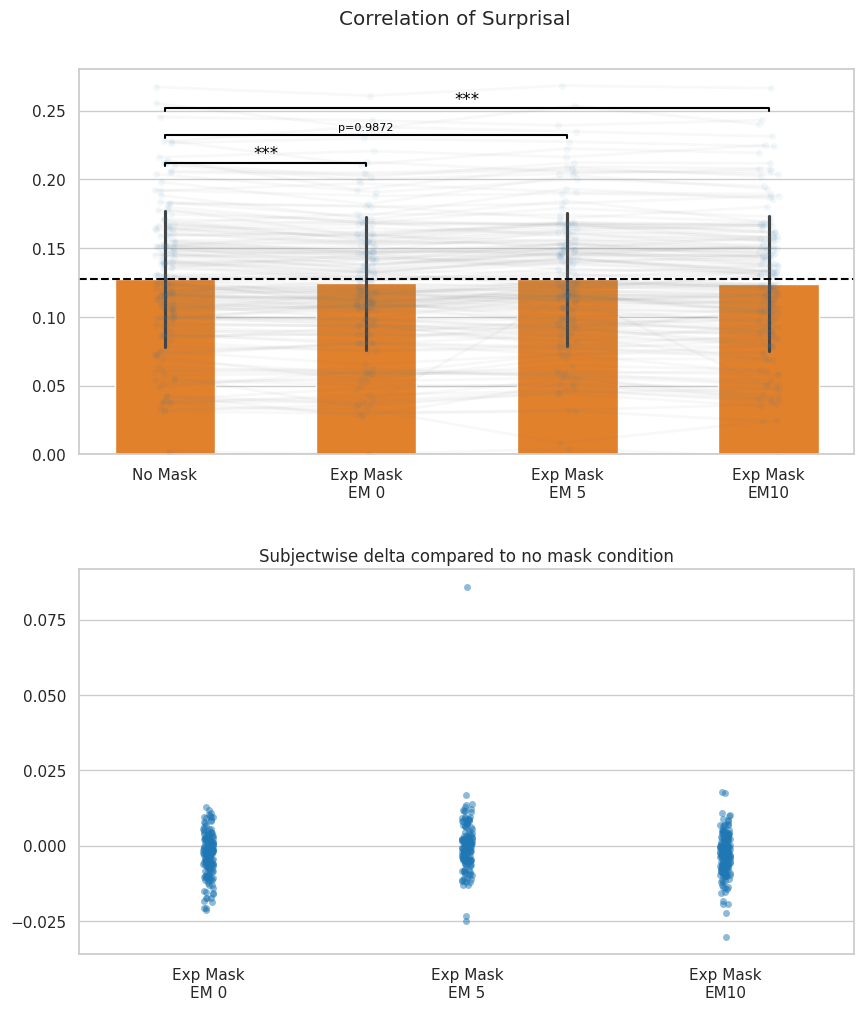

In [93]:
def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    
    return res




#stats_test[(nomask_condition, ee2000_condition)] = res
# #plt.show()

import os
print(stats_test, sep="\n")
#
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_mq", dpi=1000)
# save_matplot_fig(fig, "pairwise_comp_val_loss_withstats_v2_hq", dpi=3000)


def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval_c = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval_c < 0.001:
        return '***'
    elif pval_c < 0.01:
        return '**'
    elif pval_c < 0.05:
        return '*'
    else:
        return pval

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    #ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    
    if asterisk in ['*', '**', '***']:
        ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')
    else:
        ax.text((x1+x2)*.5, y+h*2, asterisk, ha='center', va='bottom', color='black', fontsize=8)
        

def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h, plotcolname):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    #print(stats_test_subset)
    pairwise_diff = stats_test_subset.groupby('subject_id').apply(lambda x: x[x['condition']==col_names[col_id1]][plotcolname].values[0] - x[x['condition']==col_names[col_id2]][plotcolname].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    #print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))
    return res


seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
print(seed_df_rt_subj_bestseed.columns)
#seed_df_rt_subj_bestseed


#crea
# te 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme\nExp Mask\nEM 0",
                         "ee2000_EM05": "Extreme\nExp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme\nExp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}




fig = plt.figure(figsize=(10,10))
subfigs = fig.subfigures(2, 1)
#subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    if row == 0:
            
        data_columns = ["corr_surprisal"]
        row_titles = ["Correlation of Surprisal"]
        subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
        
        #add with space between suptitle and subplots
        subfig.suptitle(row_titles[row], y=1)
        
        axs = subfig.subplots(1, 1)
        #Add spacing between subplots
        subfig.subplots_adjust(wspace=0.3)
    
        
        
        
        plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", data_columns[row]]][seed_df["condition"].isin([
            "nomask_EM01", "ee002_EM01", "ee002_EM05", "ee002_EM10"])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        
        #sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0, ax=ax)
        #
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, ax=axs, errorbar="sd", color='tab:orange', width=0.5)
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.05, jitter=0.05, ax=axs, color='tab:blue')
        connect_dots(axs, alpha=0.05)
        
        #Horizontal line at nomask_EM01 
        axs.axhline(y=plot_data[plot_data["condition"] == "No Mask"]["corr_surprisal"].mean(), color='black', linestyle='--')
        #sns.boxplot(data=plot_data, x="condition", y=data_columns[row], ax=ax)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        #
        #ax.set_title(subplot_col_titles[i])
        axs.set_ylim(0, 0.28) 
        axs.set_xlabel("")
        axs.set_ylabel("")
        
        res = annotate_given_colid(axs, 0, 1, plot_data, 0.21, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee002_condition)] = res
        #res = annotate_given_colid(axs[0], 1, 2, plot_data, 0.22, 0.002, data_columns[row])
        #stats_test[(ee002_condition, ee2000_condition)] = res0
        #res = annotate_given_colid(axs[0], 2, 3, plot_data, 0.22, 0.002, data_columns[row])
        res = annotate_given_colid(axs, 0, 2, plot_data, 0.23, 0.002, data_columns[row])
        #stats_test[(nomask_condition, ee2000_condition)] = res
        res = annotate_given_colid(axs, 0, 3, plot_data, 0.25, 0.002, data_columns[row])

    elif row == 1:
        
        plot_data = seed_df_rt_subj_bestseed[["condition", "subject_id", "corr_surprisal"]][seed_df["condition"].isin([
            "nomask_EM01", "ee002_EM01", "ee002_EM05", "ee002_EM10"])]
        #plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        #seed_df_rt_subj_bestseed_delta = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
        #seed_df_rt_subj_bestseed
        seed_df_rt_subj_bestseed_delta = plot_data[['condition', 'subject_id', 'corr_surprisal']].pivot(index='subject_id', columns='condition', values='corr_surprisal')
        seed_df_rt_subj_bestseed_delta["delta_2EM01"] = seed_df_rt_subj_bestseed_delta["ee002_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM05"] = seed_df_rt_subj_bestseed_delta["ee002_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        seed_df_rt_subj_bestseed_delta["delta_2EM10"] = seed_df_rt_subj_bestseed_delta["ee002_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        #seed_df_rt_subj_bestseed_delta["delta_2000EM01"] = seed_df_rt_subj_bestseed_delta["ee2000_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        #seed_df_rt_subj_bestseed_delta["delta_2000EM05"] = seed_df_rt_subj_bestseed_delta["ee2000_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        #seed_df_rt_subj_bestseed_delta["delta_2000EM10"] = seed_df_rt_subj_bestseed_delta["ee2000_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
        
        seed_df_rt_subj_bestseed_delta
        
        #Change order or columns to delta_2EM01, delta2000EM01, delta_2EM05, delta2000EM05, delta_2EM10, delta2000EM10
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[["delta_2EM01", "delta_2EM05", "delta_2EM10"]]
        
        column_rename_map = {"nomask_EM01": "No Mask", 
                                 "delta_2EM01": "Exp Mask\nEM 0", 
                                 "delta_2EM05": "Exp Mask\nEM 5", 
                                 "delta_2EM10": "Exp Mask\nEM10", 
                                 "delta_2000EM01": "Extreme Exp Mask\nEM 0",
                                 "delta_2000EM05": "Extreme Exp Mask\nEM 5", 
                                 "delta_2000EM10": "Extreme Exp Mask\nEM10"}
        
        
        seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta.rename(columns=column_rename_map)
        
        #print(seed_df_rt_subj_bestseed_delta)
        ax = subfig.subplots(1, 1)
        sns.stripplot(data=seed_df_rt_subj_bestseed_delta, ax=ax, color='tab:blue', jitter=0.02, alpha=0.5)
        ax.set_title("Subjectwise delta compared to no mask condition")
        ax.set_xlabel("")
        
        #minimise y axis ticks
        ax.yaxis.set_major_locator(plt.MaxNLocator(6))

# save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_mq_v2", dpi=1000)
save_matplot_fig(fig, "pairwise_comp_reading_subjectwise_bestseed_seppair_withstats_hq_v3.pdf", dpi=3000)



      seed   condition  val_loss
29  2347.0  ee002_EM10  3.826926


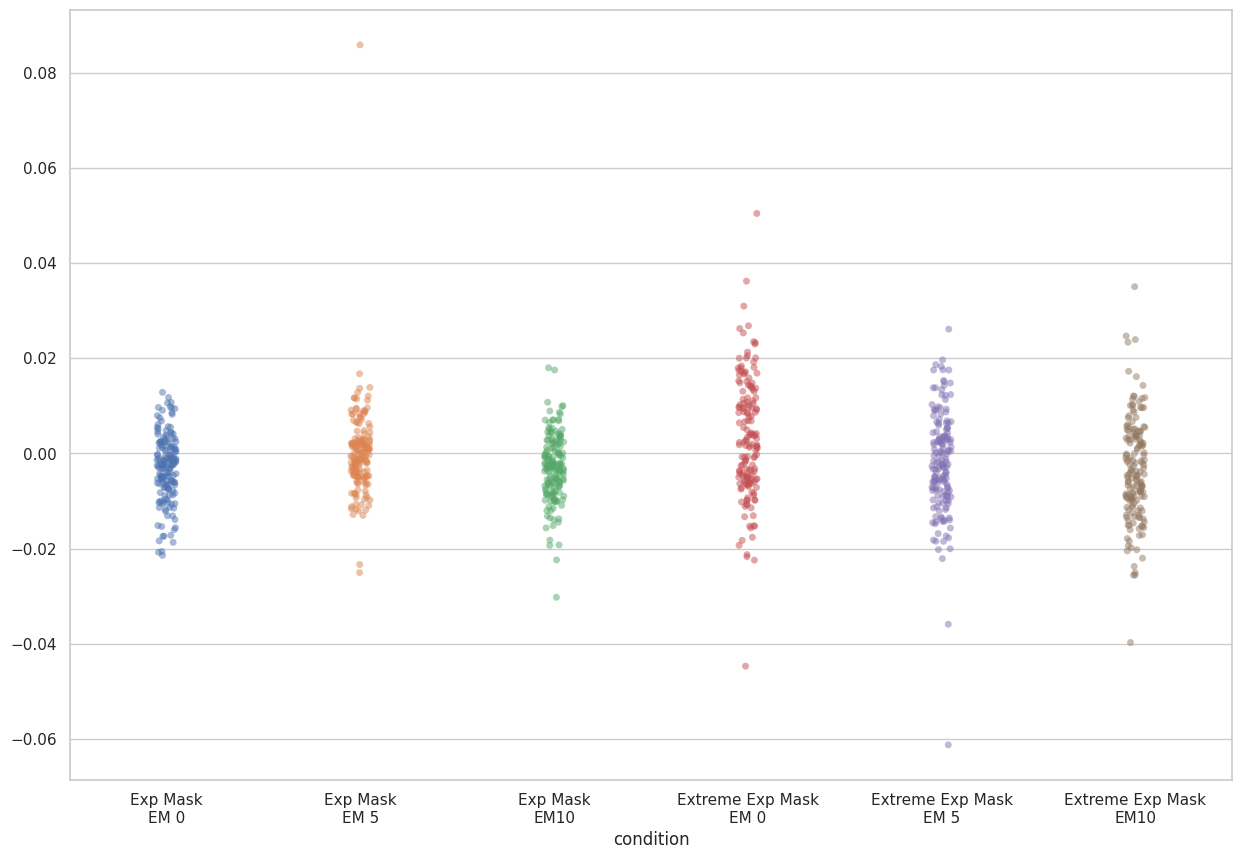

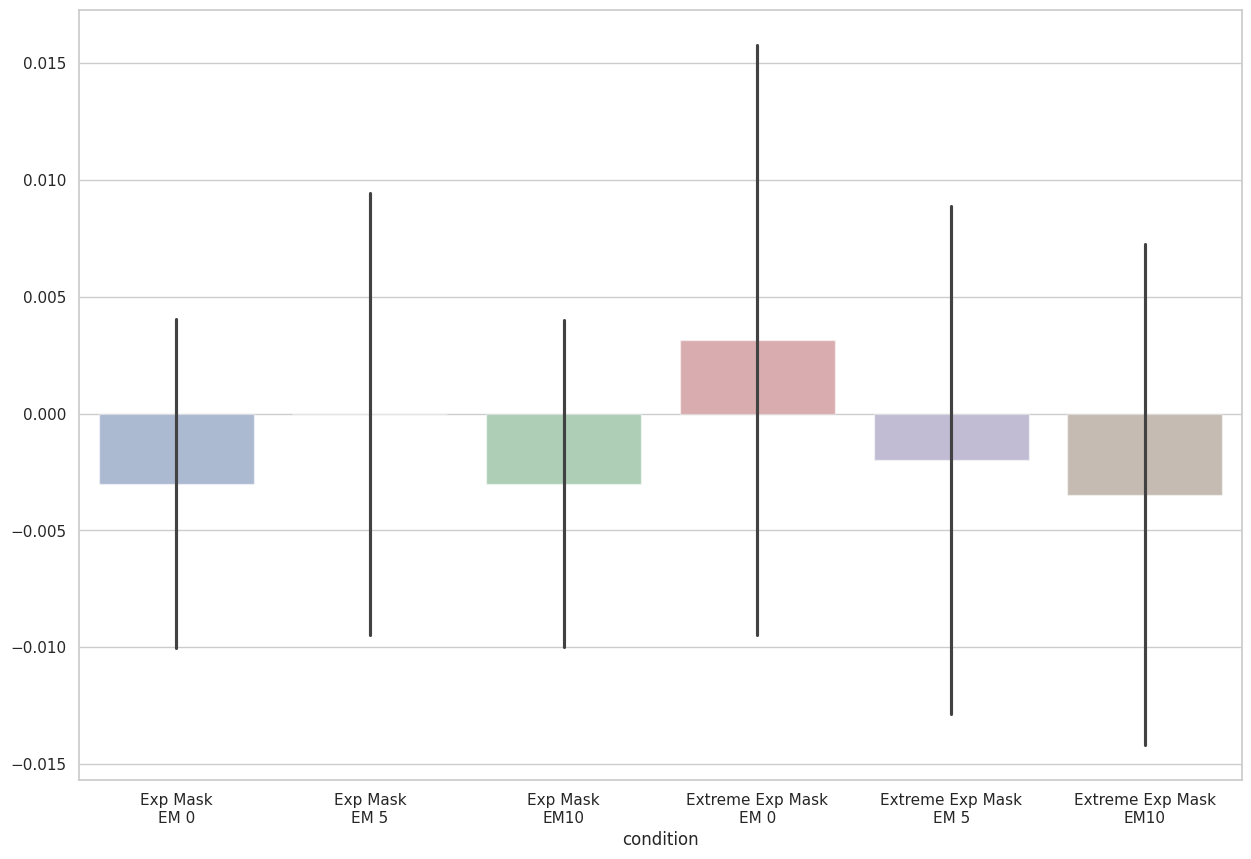

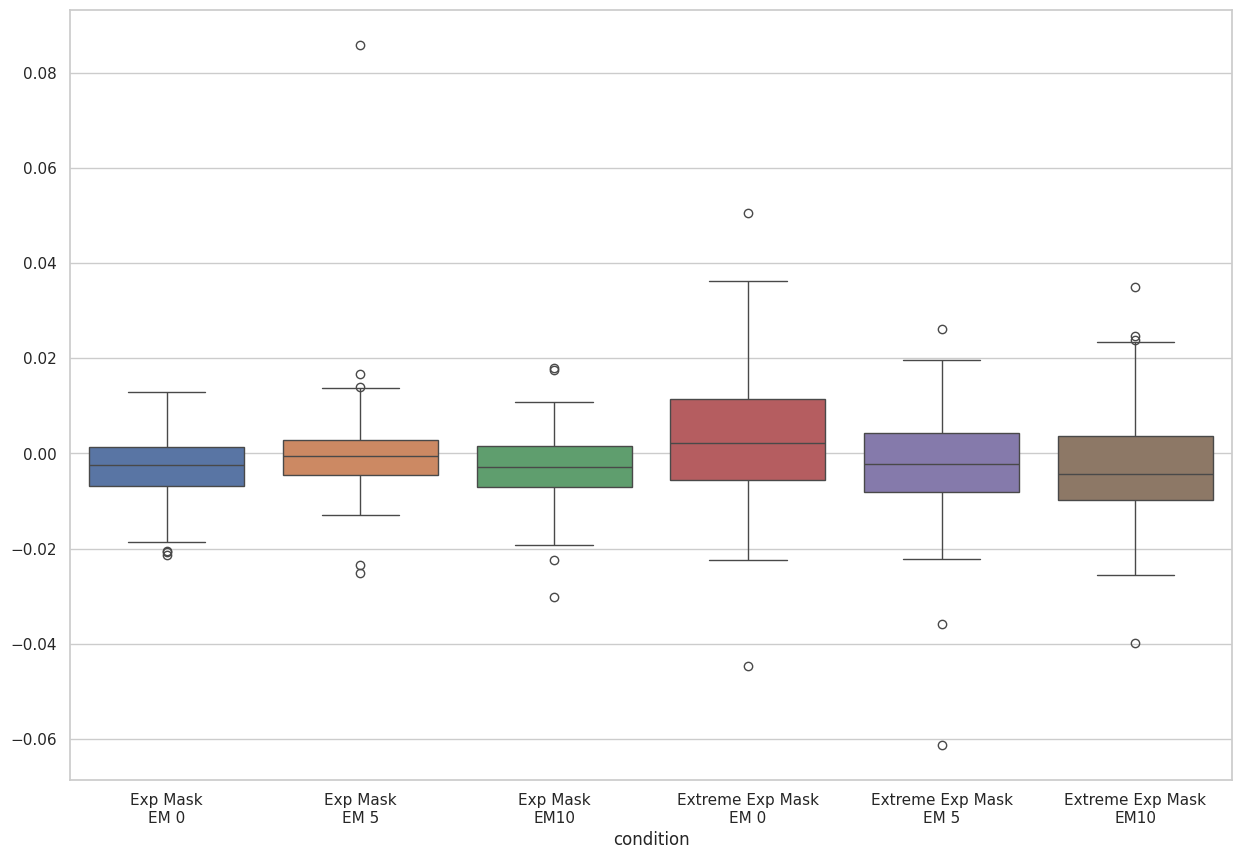

In [42]:

#Need to find a way to pick best seed 
#Maybe seed_df with minimum val_loss 
print(seed_df.sort_values("val_loss").head(1)[["seed", "condition", "val_loss"]])

seed_df_rt_subj_bestseed_delta = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
#seed_df_rt_subj_bestseed
seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[['condition', 'subject_id', 'corr_surprisal']].pivot(index='subject_id', columns='condition', values='corr_surprisal')
seed_df_rt_subj_bestseed_delta["delta_2EM01"] = seed_df_rt_subj_bestseed_delta["ee002_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
seed_df_rt_subj_bestseed_delta["delta_2EM05"] = seed_df_rt_subj_bestseed_delta["ee002_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
seed_df_rt_subj_bestseed_delta["delta_2EM10"] = seed_df_rt_subj_bestseed_delta["ee002_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
seed_df_rt_subj_bestseed_delta["delta_2000EM01"] = seed_df_rt_subj_bestseed_delta["ee2000_EM01"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
seed_df_rt_subj_bestseed_delta["delta_2000EM05"] = seed_df_rt_subj_bestseed_delta["ee2000_EM05"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]
seed_df_rt_subj_bestseed_delta["delta_2000EM10"] = seed_df_rt_subj_bestseed_delta["ee2000_EM10"] - seed_df_rt_subj_bestseed_delta["nomask_EM01"]

seed_df_rt_subj_bestseed_delta

seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta[["delta_2EM01", "delta_2EM05", "delta_2EM10", "delta_2000EM01", "delta_2000EM05", "delta_2000EM10"]]

column_rename_map = {"nomask_EM01": "No Mask", 
                         "delta_2EM01": "Exp Mask\nEM 0", 
                         "delta_2EM05": "Exp Mask\nEM 5", 
                         "delta_2EM10": "Exp Mask\nEM10", 
                         "delta_2000EM01": "Extreme Exp Mask\nEM 0",
                         "delta_2000EM05": "Extreme Exp Mask\nEM 5", 
                         "delta_2000EM10": "Extreme Exp Mask\nEM10"}


seed_df_rt_subj_bestseed_delta = seed_df_rt_subj_bestseed_delta.rename(columns=column_rename_map)

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#Plotting 3 separate types of charts
#1. Stripplot
fig,ax = plt.subplots(1, 1, figsize=(15, 10))
sns.stripplot(data=seed_df_rt_subj_bestseed_delta, jitter=0.05, alpha=0.5, ax=ax)

#connect_dots(ax)
plt.show()

#2. Barplot
fig,ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(data=seed_df_rt_subj_bestseed_delta, alpha=0.5, ax=ax, errorbar="sd")

plt.show()

#3. Boxplot
fig,ax = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(data=seed_df_rt_subj_bestseed_delta, ax=ax)

plt.show()



# #create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
# condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]
# 
# condition_triplet_map = {"nomask_EM01": "No Mask", 
#                          "ee002_EM01": "Exp Mask\nEM 0", 
#                          "ee002_EM05": "Exp Mask\nEM 5", 
#                          "ee002_EM10": "Exp Mask\nEM10", 
#                          "ee2000_EM01": "Extreme Exp Mask\nEM 0",
#                          "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
#                          "ee2000_EM10": "Extreme Exp Mask\nEM10"}
# 
# 
# 
# fig = plt.figure(figsize=(15, 10))
# subfigs = fig.subfigures(1, 1)
# subfigs = [subfigs]
# #fig.tight_layout()
# for row, subfig in enumerate(subfigs):
#     data_columns = ["corr_surprisal"]
#     row_titles = ["Correlation of Surprisal"]
#     #subfig.suptitle(row_titles[row])
#     axs = subfig.subfigures(1, 3)
#     #Add spacing between subplots
#     subfig.subplots_adjust(wspace=0.7)
#     for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
#         ax = axs[i]
#         ax2 = ax.subplots(1, 2)
#         
#         plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
#         plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
#         #print(plot_data.head())
#         
#         #Color mapping for each condition
#         color_map = {"No Mask": "grey", 
#                      "Exp Mask\nEM 0": "green", "Exp Mask\nEM 5": "green", "Exp Mask\nEM10": "green", 
#                      "Extreme Exp Mask\nEM 0": "red", "Extreme Exp Mask\nEM 5": "red", "Extreme Exp Mask\nEM10": "red"}
#         
#         sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax2[1])
#         connect_dots(ax2[1])
#     
#         sns.barplot(data=plot_data, hue="condition", y=data_columns[row], dodge=True, legend=False,
#                     alpha=.5, ax=ax2[0], errorbar="sd", palette=color_map)
#         
#         sup_title = "No Echoic Memory" if i == 0 else "Echoic Memory of 5 tokens" if i == 1 else "Echoic Memory of 10 tokens"
#         ax.suptitle(sup_title, y=0.92)
#         ax2[0].set_xticklabels([])
#         ax2[1].set_xticklabels([])
#         ax2[0].set_ylabel("")
#         ax2[1].set_ylabel("")
#         ax2[0].set_xlabel("")
#         ax2[1].set_xlabel("")
#         ax2[0].set_ylim(-0.01, 0.3)
#         ax2[1].set_ylim(-0.01, 0.3)
# 
# fig.supxlabel("Condition")
# fig.supylabel("Correlation of Surprisal", x=-0.03)
# fig.suptitle("Correlation of Surprisal")
# 
# from matplotlib.patches import Patch
# # Grey is No Mask, Green is Exp Mask, Red is Extreme Exp Mask
# fig.legend(handles=[Patch(facecolor='grey', label='No Mask'),     Patch(facecolor='green', label='Exp Mask'),
#     Patch(facecolor='red', label='Extreme Exp Mask')
# ], loc='upper right', bbox_to_anchor=(1, 1), fontsize='x-small')

   subject_id condition     score
0           1         A  6.872701
1           1         B  6.802857
2           2         A  8.659970
3           2         B  5.394634
4           3         A  5.780093
5           3         B  3.623978
6           4         A  5.290418
7           4         B  6.464705
8           5         A  8.005575
9           5         B  5.832290
           count      mean       std       min       25%       50%       75%  \
condition                                                                      
A           40.0  7.089317  1.485497  5.027611  5.761225  6.832515  8.149740   
B           40.0  5.055667  1.241248  3.185802  3.792130  5.068605  6.214988   

                max  
condition            
A          9.847923  
B          6.947548  


/tmp/ipykernel_2655064/101400804.py:250: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df,y='score',x='condition',ci='sd',capsize=.1,errwidth=1, ax=ax)
/tmp/ipykernel_2655064/101400804.py:250: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=df,y='score',x='condition',ci='sd',capsize=.1,errwidth=1, ax=ax)
/tmp/ipykernel_2655064/101400804.py:253: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = df.groupby('subject_id').apply(lambda x: x[x['condition']=='A']['score'].values[0] -


{'mean                    ': 2.0336498958970095, '95%_CI around mean      ': (1.3693214140753065, 2.6635437213858872), 'bootstrap-t-test p_value': 'p < 0.0001'}


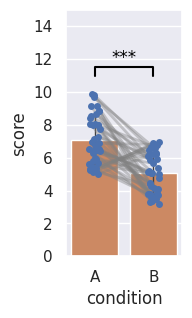

In [43]:
#@title simulate example data
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# Set random seed for reproducibility
np.random.seed(42)

# Number of participants
n_participants = 40

# Generate data
subject_ids = np.repeat(range(1, n_participants + 1), 2)
conditions = np.tile(['A', 'B'], n_participants)

# Generate scores
scores = []
for condition in conditions:
    if condition == 'A':
        scores.append(np.random.uniform(5, 10))  # Higher scores for condition A
    else:
        scores.append(np.random.uniform(3, 7))   # Lower scores for condition B

# Create the dataframe
df = pd.DataFrame({
    'subject_id': subject_ids,
    'condition': conditions,
    'score': scores
})

# Sort the dataframe by subject_id and condition
df = df.sort_values(['subject_id', 'condition']).reset_index(drop=True)

# Display the first few rows of the dataframe
print(df.head(10))

# Display summary statistics
print(df.groupby('condition')['score'].describe())

#@title define stats functions

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')

#@title define function (USE THIS FUNCTION)

#@title pair plots

plt.figure(figsize=(1.5,3.2))
ax=sns.stripplot(data=df,y='score',x='condition')
sns.barplot(data=df,y='score',x='condition',ci='sd',capsize=.1,errwidth=1, ax=ax)
connect_dots(ax) # use the connect_dots fucntion
plt.ylim(0,15)
pairwise_diff = df.groupby('subject_id').apply(lambda x: x[x['condition']=='A']['score'].values[0] -
                                               x[x['condition']=='B']['score'].values[0])

# perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
print(res)


    

annotate_plot(ax, 0, 1, 11, 0.5, get_asterisk_map(res['bootstrap-t-test p_value']))    
    

# #Use results to annotate the plot
# #plt.text(0, 9, f"p = {res['bootstrap-t-test p_value']}", ha='center', va='center')
# 
# plt.text(0, 8.5, get_asterisk_map(res['bootstrap-t-test p_value']), ha='center', va='center')
# plt.show()

# the string below reports the mean, and 95%CI around the mean, of the delta, per subject

/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('se

{'mean                    ': -0.00732798576354976, '95%_CI around mean      ': (-0.01030530214309684, -0.004357456564903129), 'bootstrap-t-test p_value': 'p=0.0008'}
{'mean                    ': -0.3959429979324341, '95%_CI around mean      ': (-0.40121419787406915, -0.39086133539676665), 'bootstrap-t-test p_value': 'p < 0.0001'}


/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('se

{'mean                    ': 0.005926585197448686, '95%_CI around mean      ': (0.002790696024894628, 0.008891927599906917), 'bootstrap-t-test p_value': 'p=0.0138'}
{'mean                    ': -0.2383198022842407, '95%_CI around mean      ': (-0.24325742781162263, -0.23335518836975094), 'bootstrap-t-test p_value': 'p < 0.0001'}


/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
/tmp/ipykernel_2655064/4231599719.py:226: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = stats_test_subset.groupby('se

{'mean                    ': 0.013513422012329102, '95%_CI around mean      ': (0.008985633850097657, 0.01765935659408578), 'bootstrap-t-test p_value': 'p=0.0012'}
{'mean                    ': -0.17801597118377685, '95%_CI around mean      ': (-0.18334945023059845, -0.1728372097015381), 'bootstrap-t-test p_value': 'p < 0.0001'}


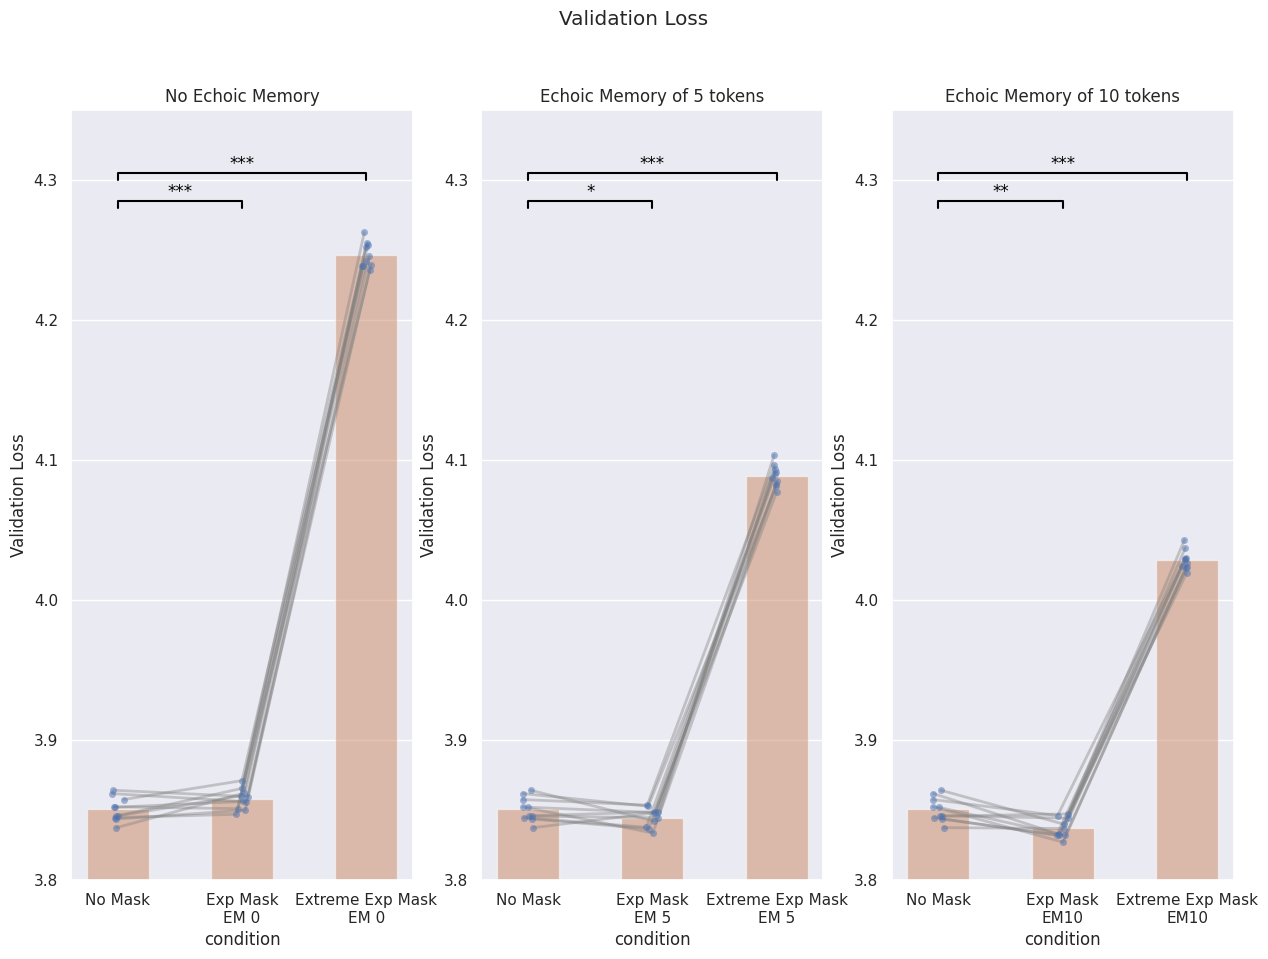

In [44]:
#@title define stats functions

import seaborn as sns


def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

def fmt_boot_pval(pval,n_boots=10e4,scientific=False) -> str:
    """convertr bootstrap pvalues to expression that takes into account precision
    (e.g. p=0 will become p < x, with x being determined by number of bootstraps)"""
    if scientific:
        p_str= f'p={pval}' if pval>0 else f'p < {round(1/float(n_boots),int(np.log10(n_boots)+1))}'
    else:
        if pval>0:p_str=f'p={pval}'
        else:p_str='p < {atleast:.{decim}f}'.format(atleast=1/float(n_boots),decim=int(np.log10(n_boots)))
    return(p_str)

def bootstrap_t_onesample(samps_in,pop_mean=0,tail='2s',n_boots=10e4,seed=123):
    """one-sample (paired) bootstrap t-test; returns p-value only

    in:
    - samps: nd.array, shape(n_samples)
        datapoints
    - pop_mean: float, Default=0
        mean to test against
    - tail: str, default: '2s'
        options: '2s','l','r' (for two-tailed,left or right-tailed)
    - n_boots: int; default=10e3
        number of bootstraps (determines precision)

    out:
    -pval: float
        fraction of instances where simulated null distribution returns
        test statistic that is at least as extreme as emprical test stat.
    see also:
    - fmt_boot_pval, function to format the pvalues, changes p=0 into P < (1/n_boots) statement
    dependencies: bootstrap from astropy
    """
    if seed is not None:
      np.random.seed(seed)
    # test stat
    t_func=lambda x,dim:(x.mean(dim)-pop_mean)/(x.std(dim)/np.sqrt(x.shape[dim]))
    # make null distribution
    null_boot_test=t_func(bootstrap(samps_in-samps_in.mean(0)+pop_mean,bootnum=int(n_boots)),1)
    emp_test=t_func(samps_in,0)
    # return p-value as probability of obtaining a test stat at least as extreme under the null
    if tail in ['2s','two','both']:
        left_pval=np.mean(null_boot_test<emp_test)
        right_pval=np.mean(null_boot_test>emp_test)
        return(2*min(left_pval,right_pval))
    elif tail.lower() in ['l','left']:
        return(np.mean(null_boot_test<emp_test))
    elif tail.lower() in ['r','right']:
        return(np.mean(null_boot_test>emp_test))
    else:
        raise ValueError('tail not recognised!')

def bootstrap_analysis(data, pop_mean=0, tail='2s', n_boots=10000, seed=123):
    """
    Perform bootstrap analysis including one-sample t-test and compute 95% CI for the mean.

    Parameters:
    - data (array-like): Sample data.
    - pop_mean (float): Mean to test against.
    - tail (str): Type of the test ('2s' for two-tailed, 'l' for left-tailed, 'r' for right-tailed).
    - n_boots (int): Number of bootstrap samples.
    - seed (int): Seed for the random number generator.

    Returns:
    - dict: Contains the mean, 95% CI for the mean, and formatted p-value.
    """
    if seed is not None:
      np.random.seed(seed)

    # Compute the p-value using the provided function
    p_value = bootstrap_t_onesample(data, pop_mean, tail, n_boots, seed)

    # Format the p-value
    formatted_p_value = fmt_boot_pval(p_value, n_boots)

    # Calculate the sample mean
    sample_mean = np.mean(data)

    # Generate bootstrap samples for the CI of the mean
    bootstrap_samples = bootstrap(data, bootnum=n_boots, bootfunc=np.mean)
    ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])

    # Compile results
    results = {
        'mean                    ': sample_mean,
        '95%_CI around mean      ': (ci_lower, ci_upper),
        'bootstrap-t-test p_value': formatted_p_value
    }

    return results

def bootstrap(data, bootnum=1000, samples=None, bootfunc=None, seed=False):
    """Performs bootstrap resampling on numpy arrays. (FUNCTION FROM ASTROPY)

    Bootstrap resampling is used to understand confidence intervals of sample
    estimates. This function returns versions of the dataset resampled with
    replacement ("case bootstrapping"). These can all be run through a function
    or statistic to produce a distribution of values which can then be used to
    find the confidence intervals.

    Parameters
    ----------
    data : numpy.ndarray
        N-D array. The bootstrap resampling will be performed on the first
        index, so the first index should access the relevant information
        to be bootstrapped.
    bootnum : int, optional
        Number of bootstrap resamples
    samples : int, optional
        Number of samples in each resample. The default `None` sets samples to
        the number of datapoints
    bootfunc : function, optional
        Function to reduce the resampled data. Each bootstrap resample will
        be put through this function and the results returned. If `None`, the
        bootstrapped data will be returned

    Returns
    -------
    boot : numpy.ndarray

        If bootfunc is None, then each row is a bootstrap resample of the data.
        If bootfunc is specified, then the columns will correspond to the
        outputs of bootfunc.

    """
    if seed != False:
        np.random.seed(seed)

    if samples is None:
        samples = data.shape[0]

    # make sure the input is sane
    if samples < 1 or bootnum < 1:
        raise ValueError("neither 'samples' nor 'bootnum' can be less than 1.")

    if bootfunc is None:
        resultdims = (bootnum,) + (samples,) + data.shape[1:]
    else:
        # test number of outputs from bootfunc, avoid single outputs which are
        # array-like
        try:
            resultdims = (bootnum, len(bootfunc(data)))
        except TypeError:
            resultdims = (bootnum,)

    # create empty boot array
    boot = np.empty(resultdims)

    for i in range(bootnum):
        bootarr = np.random.randint(low=0, high=data.shape[0], size=samples)

#         if seed != False: print(bootarr)
        if bootfunc is None:
            boot[i] = data[bootarr]
        else:
            boot[i] = bootfunc(data[bootarr])

    return boot

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

def get_asterisk_map(pval):
    pval = float(pval.split('=')[1]) if 'p=' in pval else float(pval.split('<')[1])
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    else:
        return ''

def annotate_plot(ax, x1, x2, y, h, asterisk):
    #Ax = ax object
    #x1, x2 = x-coordinates of the bars, give absolute bar id location 0 to n_bar-1
    #y = y-coordinate of the bar, actual value in y axis where you want bar to be placed
    #h = height of the bar
    #asterisk = string to be placed on top of the bar, *,**,***, etc.
    
    if asterisk == '':
        return
    
    #Use annotate pairs to add bars on top of specific columns
    ax = plt.gca() if ax is None else ax
    
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+h, asterisk, ha='center', va='bottom', color='black')


def annotate_given_colid(ax, col_id1, col_id2, plot_data, y, h):
    col_names = [tick.get_text() for tick in ax.get_xticklabels()]
    col_names = {i: col_name for i, col_name in enumerate(col_names)}
    #print(col_names)
    #Using the column names, get the data for each condition #Just do for 0,1 for now
    
    stats_test_subset = plot_data[plot_data["condition"].isin([col_names[col_id1], col_names[col_id2]])]
    #Get pairwise differences
    pairwise_diff = stats_test_subset.groupby('seed').apply(lambda x: x[x['condition']==col_names[col_id1]]["val_loss"].values[0] - x[x['condition']==col_names[col_id2]]["val_loss"].values[0])
    
    # perform bootstrap-t-test analysis on pairwise values (https://open.lnu.se/index.php/metapsychology/article/view/2058)
    res = bootstrap_analysis(pairwise_diff.values,)#alternatively, do: tail='r' to test for delta>0 (one-sided)
    print(res)
    #Use results to annotate the plot
    annotate_plot(ax, col_id1, col_id2, y, h, get_asterisk_map(res['bootstrap-t-test p_value']))

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(15, 10))

subfigs = fig.subfigures(1, 1)

subfigs = [subfigs]
fig.tight_layout()
for row, subfig in enumerate(subfigs):
    
    data_columns = ["val_loss", "train_loss"]
    row_titles = ["Validation Loss", "Train Loss"]
    subplot_col_titles = ["No Echoic Memory", "Echoic Memory of 5 tokens", "Echoic Memory of 10 tokens"]
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    #subfig.subplots_adjust(wspace=0.5)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df[["seed", "condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar=None, width=0.5)
        #set title for each subplot but remove \n from mapping
        # ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        ax.set_ylabel(row_titles[row])
        ax.set_title(subplot_col_titles[i])
        ax.set_ylim(3.80, 4.35) if row == 0 else ax.set_ylim(2.8,3.5) 
        
        #col 1 and 2 statistical test and annotation
    
        #print(plot_data)
        #Get column names for each condition from ax object
        annotate_given_colid(ax, 0, 1, plot_data, 4.28, 0.005)
        annotate_given_colid(ax, 0, 2, plot_data, 4.30, 0.005)
        
        #plt.show()



/tmp/ipykernel_16412/894328101.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df,y='score',x='condition',ci='sd',capsize=.1,errwidth=1, ax=ax)
/tmp/ipykernel_16412/894328101.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.barplot(data=df,y='score',x='condition',ci='sd',capsize=.1,errwidth=1, ax=ax)
/tmp/ipykernel_16412/894328101.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pairwise_diff = df.groupby('subject_id').apply(lambda x: x[x['condition']=='A']['score'].values[0] -


{'mean                    ': 2.0336498958970095, '95%_CI around mean      ': (1.3693214140753065, 2.6635437213858872), 'bootstrap-t-test p_value': 'p < 0.0001'}


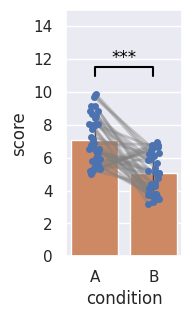

      seed   condition  val_loss
29  2347.0  ee002_EM10  3.826926


/tmp/ipykernel_1941745/1649394113.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_1941745/1649394113.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_1941745/1649394113.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]


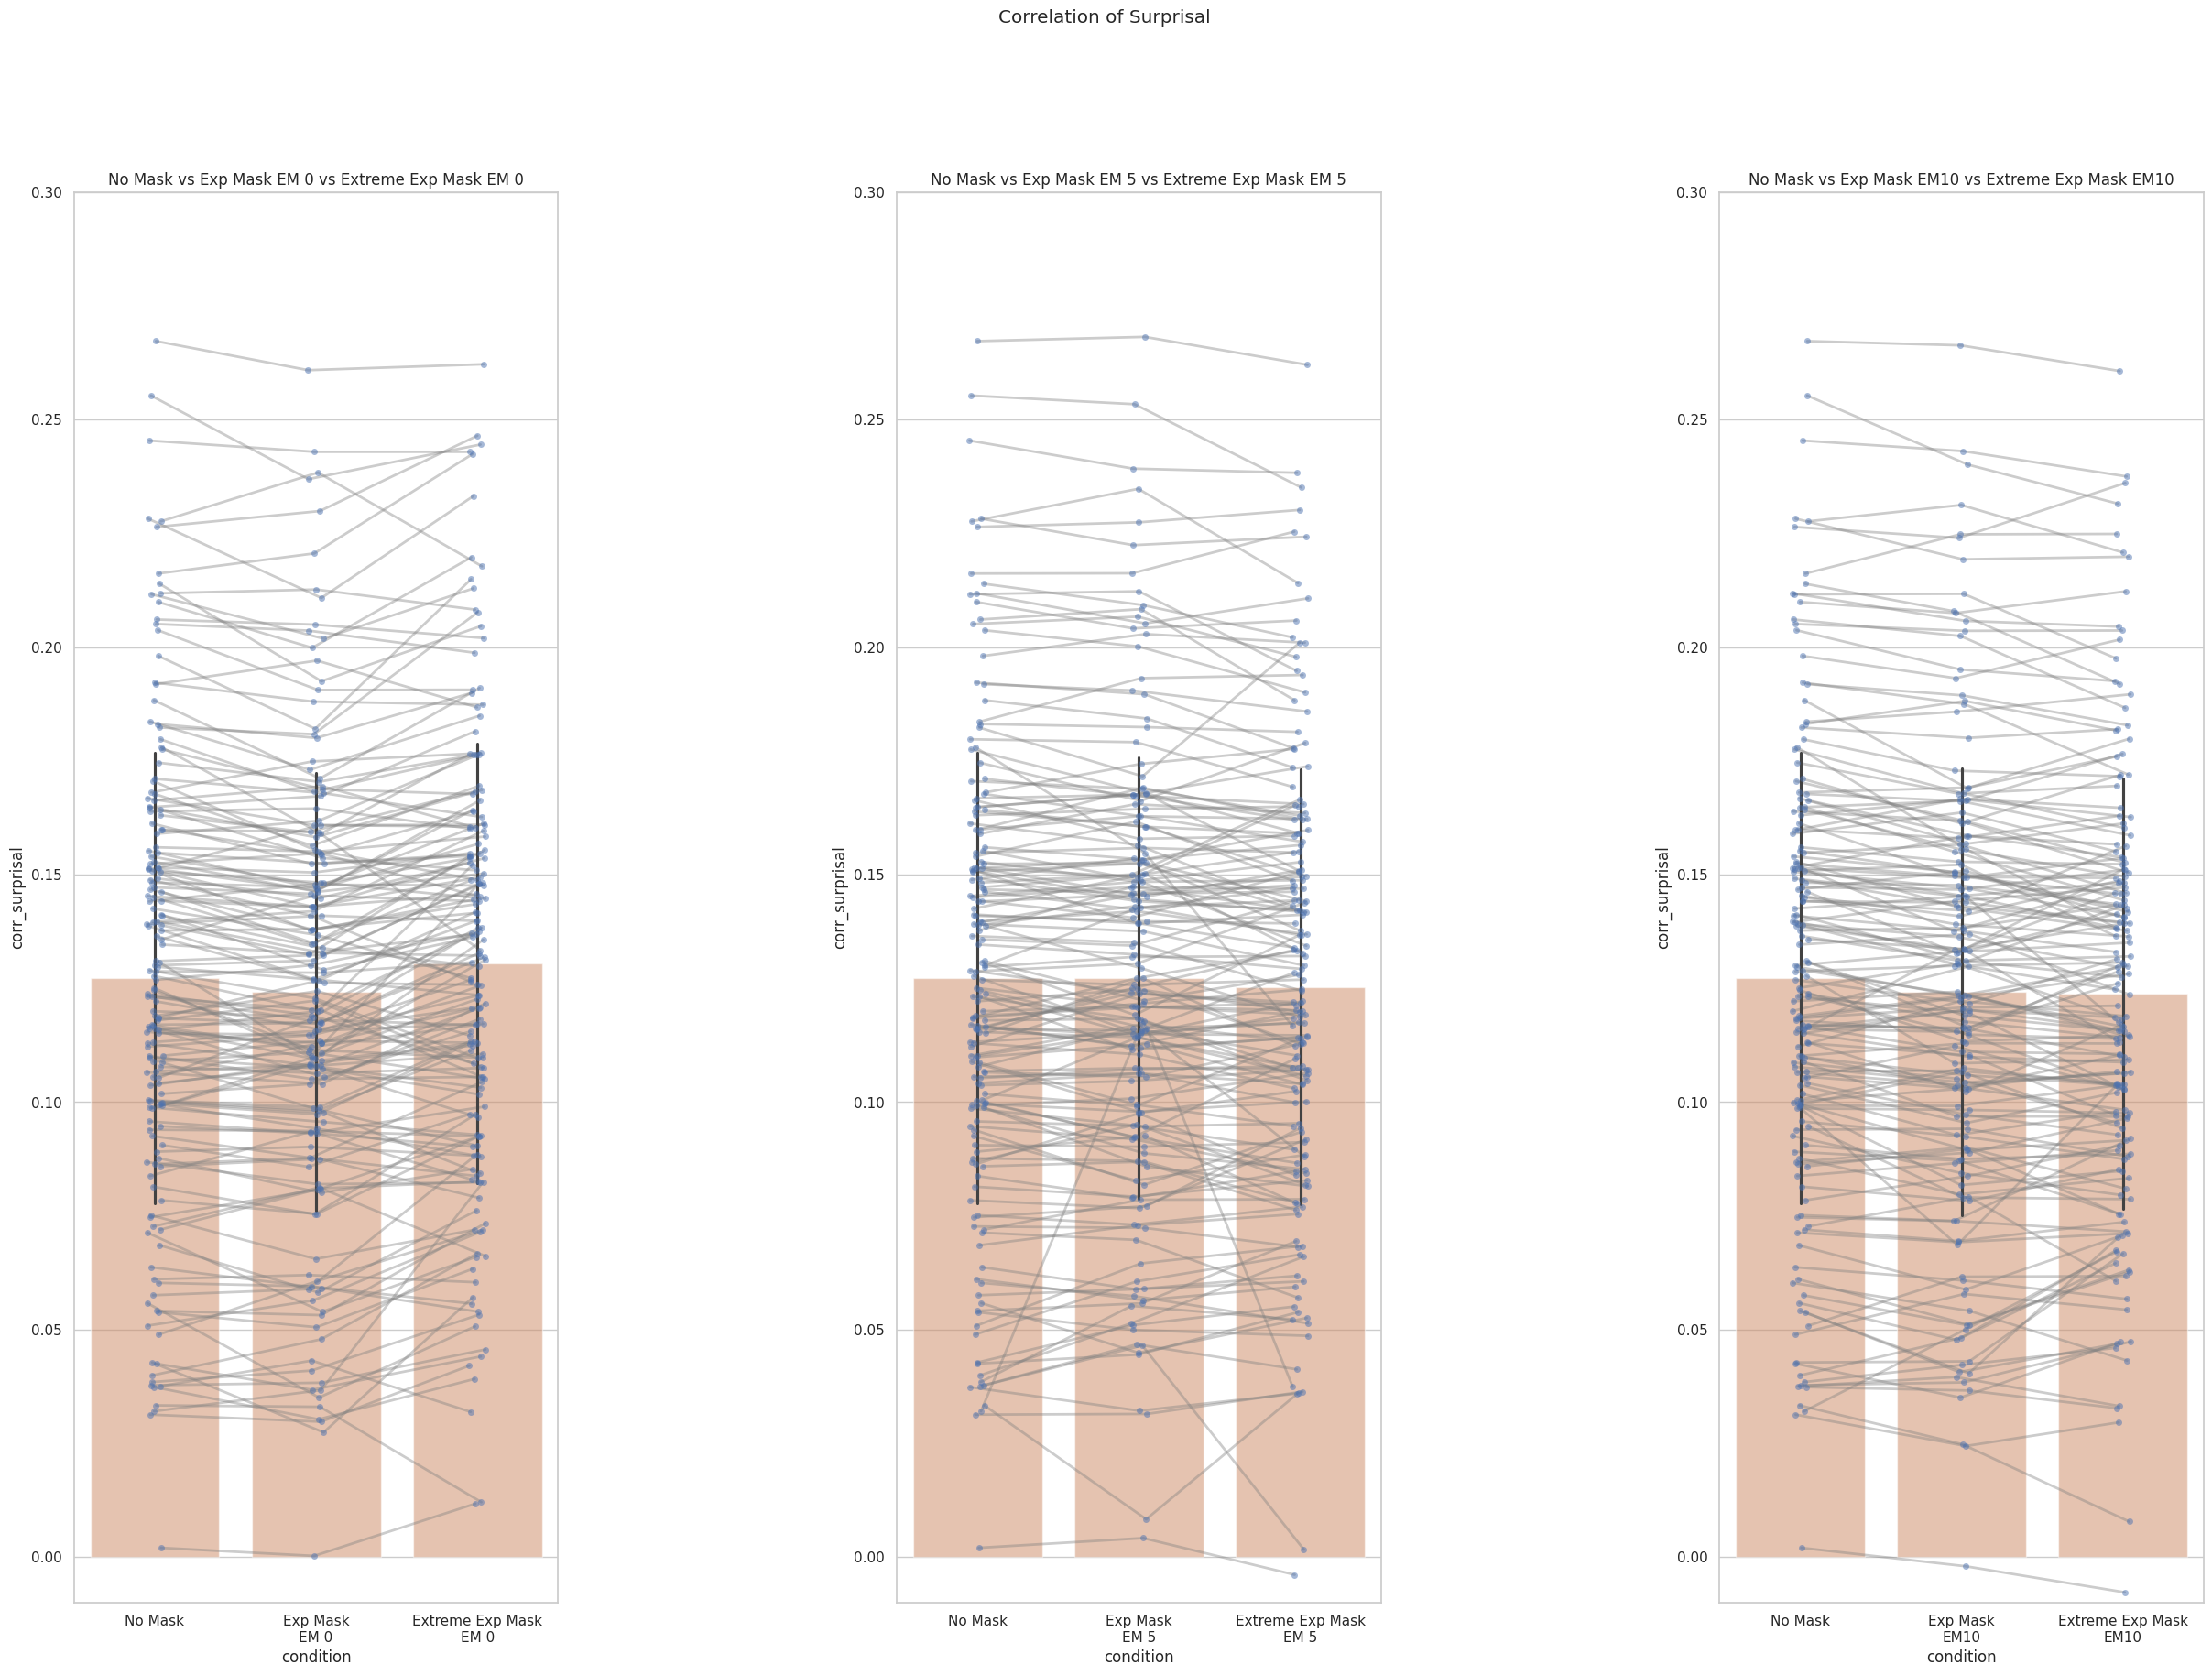

In [96]:

#Need to find a way to pick best seed 
#Maybe seed_df with minimum val_loss 
print(seed_df.sort_values("val_loss").head(1)[["seed", "condition", "val_loss"]])

#Picking 2347.0 as seed

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
#seed_df_rt_subj_bestseed

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}


fig = plt.figure(figsize=(30, 20))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
for row, subfig in enumerate(subfigs):
    
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar="sd")
        #set title for each subplot but remove \n from mapping
        ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        
        ax.set_ylim(-0.01, 0.3) 
        

      seed   condition  val_loss
29  2347.0  ee002_EM10  3.826926


/tmp/ipykernel_1941745/4073446715.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  strip_plot_data = seed_df_rt_subj_bestseed[[ "condition", "subject_id", data_columns[row]]][seed_df_rt_subj_bestseed["subject_id"].isin(subject_sample.tolist())][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])][["condition", "corr_surprisal"]]
/tmp/ipykernel_1941745/4073446715.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_1941745/4073446715.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  strip_plot_data = seed_df_rt_subj_bestseed[[ "condition", "subject_id", data_columns[row]]][seed_df_rt_subj_bestseed["subject_id"].isin(subject_sample.tolist())][seed_df["condition"].isin([nomask_condition, ee002_

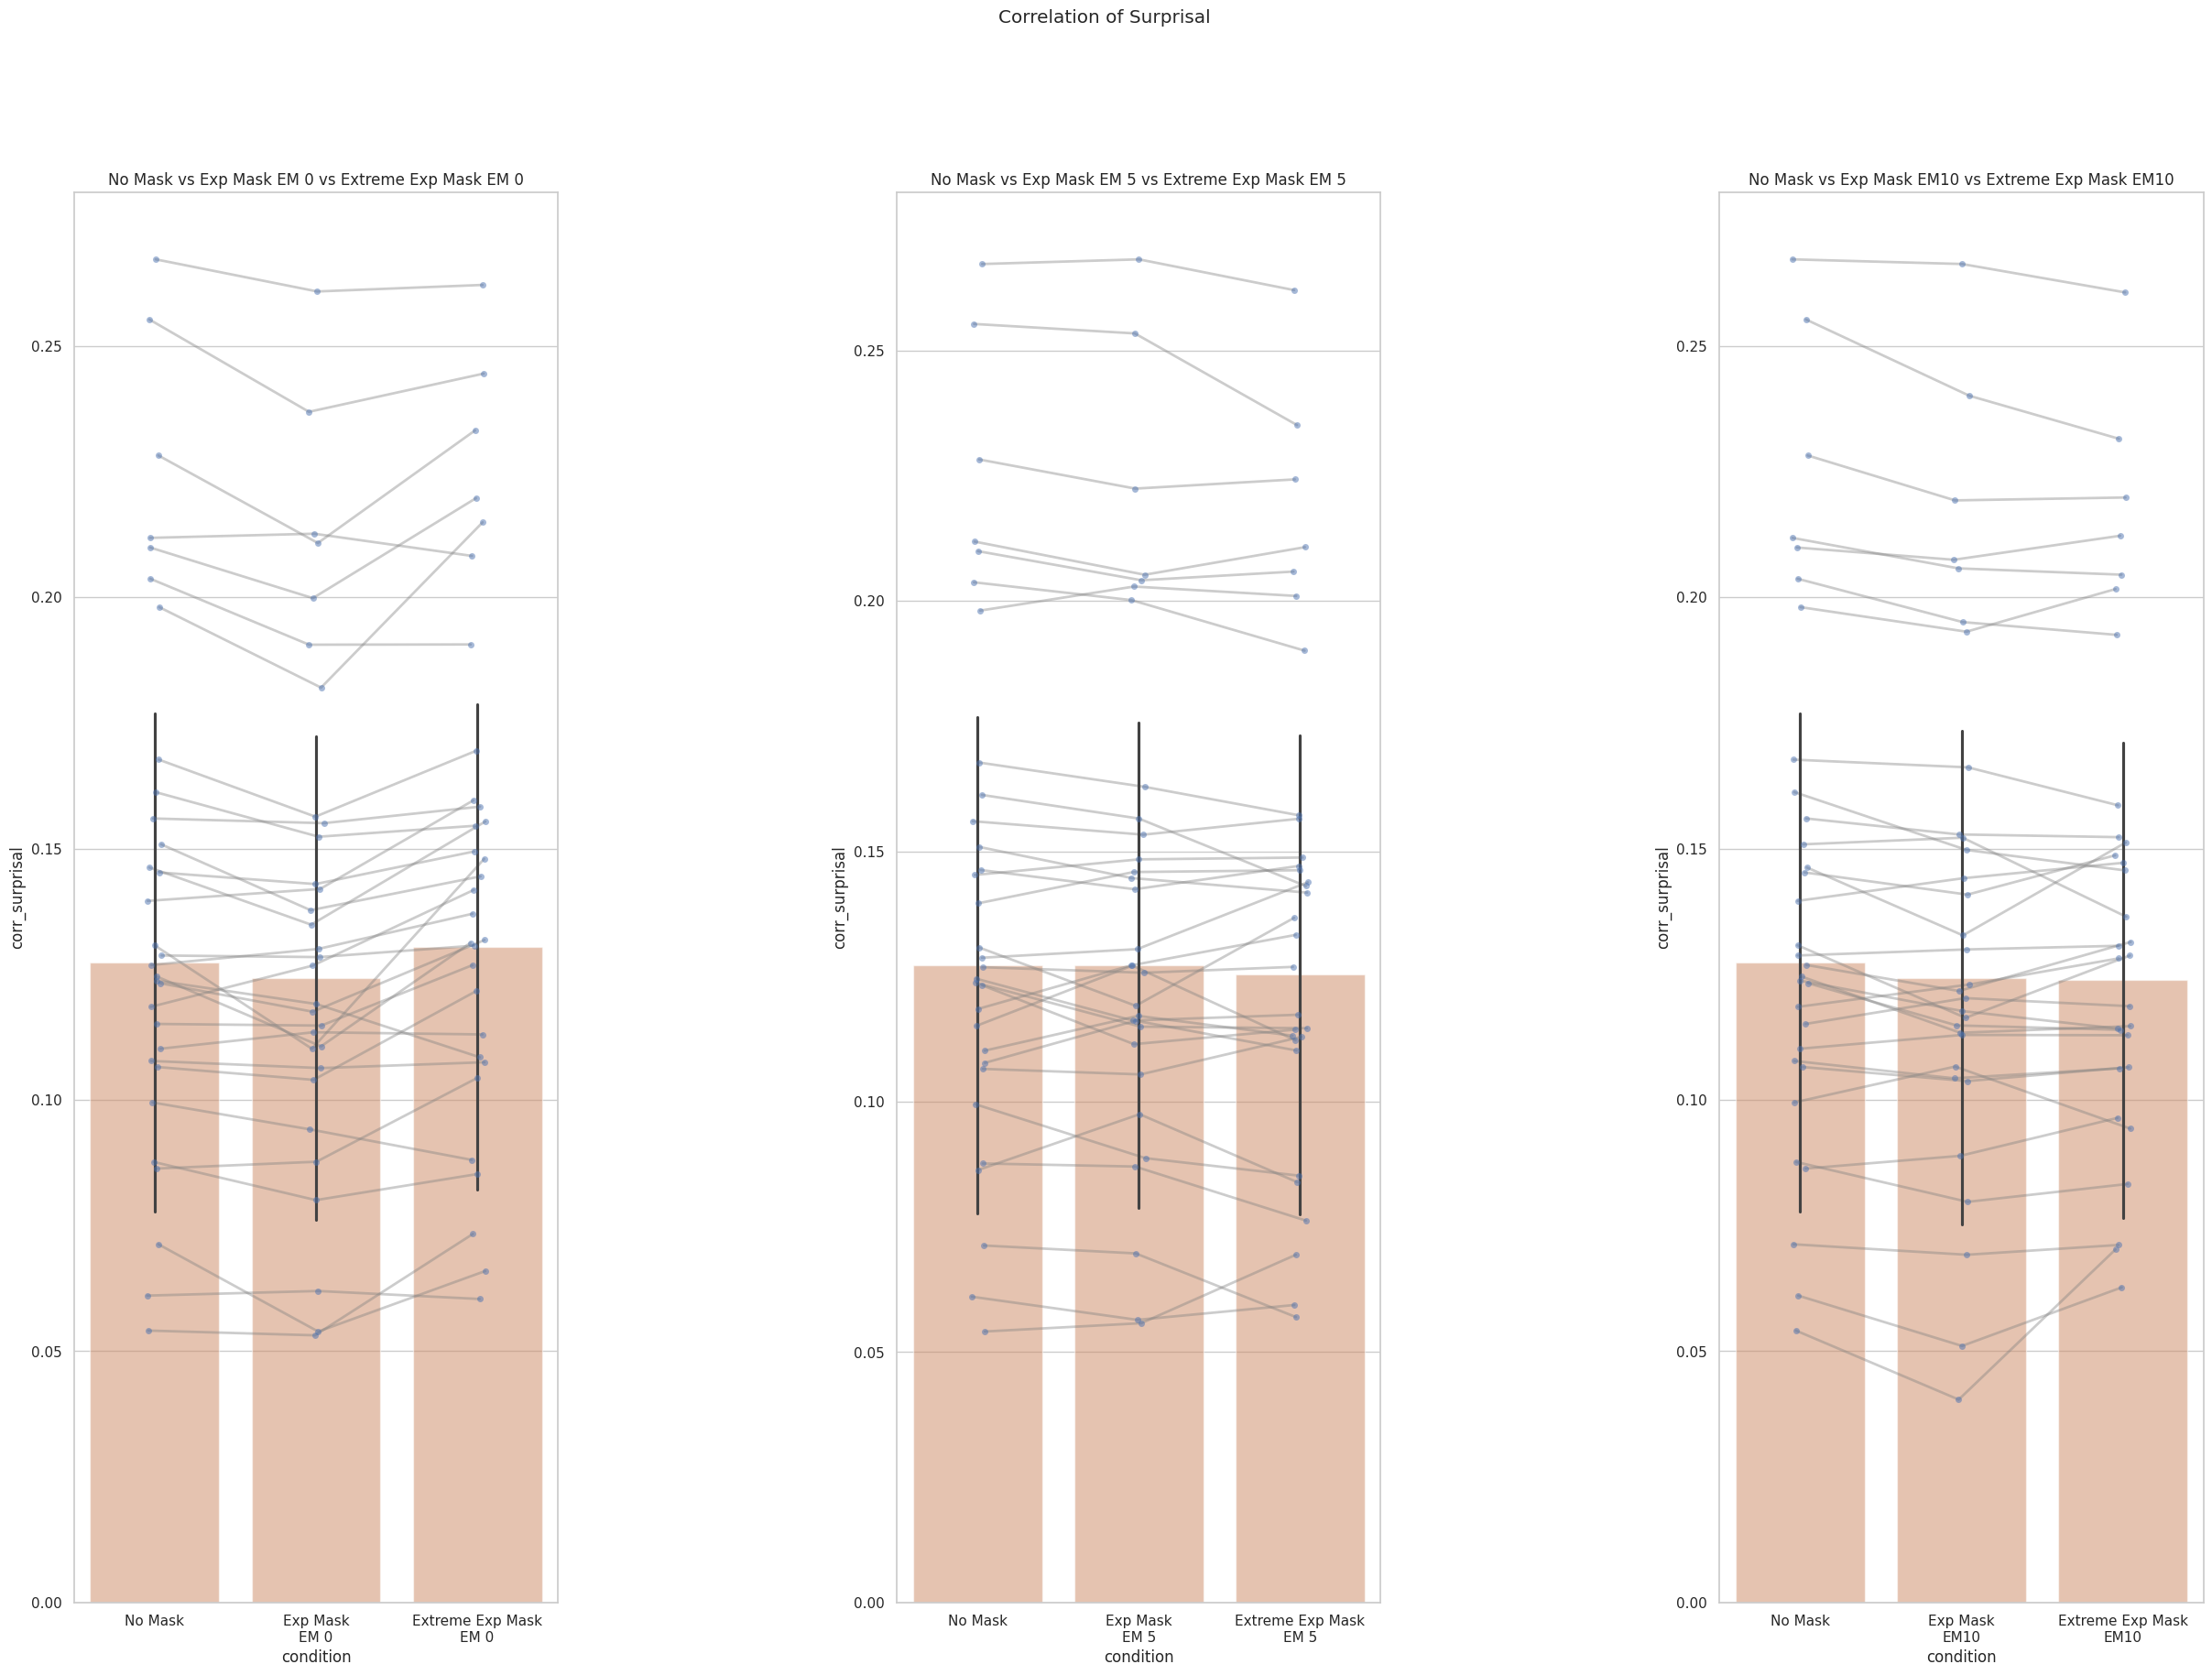

In [31]:
#Need to find a way to pick best seed 
#Maybe seed_df with minimum val_loss 
print(seed_df.sort_values("val_loss").head(1)[["seed", "condition", "val_loss"]])

#Picking 2347.0 as seed

seed_df_rt_subj_bestseed = seed_df_rt_subj[seed_df_rt_subj["seed"] == 2347.0]
#seed_df_rt_subj_bestseed

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}


#Since number of participants is too large, pick a few random participants (35) and plot the data
subject_sample = seed_df_rt_subj["subject_id"].sample(35)


fig = plt.figure(figsize=(30, 20))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
for row, subfig in enumerate(subfigs):
    
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        strip_plot_data = seed_df_rt_subj_bestseed[[ "condition", "subject_id", data_columns[row]]][seed_df_rt_subj_bestseed["subject_id"].isin(subject_sample.tolist())][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])][["condition", "corr_surprisal"]]
        plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        strip_plot_data["condition"] = strip_plot_data["condition"].map(condition_triplet_map)
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=strip_plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=0.05, ax=ax)
        connect_dots(ax)
        sns.barplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, ax=ax, errorbar="sd")
        #set title for each subplot but remove \n from mapping
        ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        
        #ax.set_ylim(0.121, 0.131) 
        

In [29]:
seed_df_rt_subj_bestseed["condition"].isin([nomask_condition, ee002_condition, ee2000_condition]).reset_index(drop=True)

0       True
1       True
2       True
3       True
4       True
        ... 
1143    True
1144    True
1145    True
1146    True
1147    True
Name: condition, Length: 1148, dtype: bool

In [30]:
seed_df_rt_subj_bestseed[[ "condition", "subject_id", data_columns[row]]][seed_df_rt_subj_bestseed["subject_id"].isin(subject_sample.tolist())].reset_index(drop=True)

condition      subject_id  corr_surprisal
0    nomask_EM01  A11AUVZ4MCA7VU        0.151476
1    nomask_EM01  A11GA4B4SEYK44        0.158967
2    nomask_EM01  A1FNEVG87BS5K0        0.037543
3    nomask_EM01  A1JBTEJN14MFFA        0.150610
4    nomask_EM01   A21L2ZM379FG7        0.168056
..           ...             ...             ...
205  ee2000_EM10  A3GYYRNHP635XM        0.110332
206  ee2000_EM10  A3ULFB0PQ1471E        0.056723
207  ee2000_EM10   A5U9HUMS31DIR        0.118271
208  ee2000_EM10   A98XHW6B1VSSQ        0.191918
209  ee2000_EM10   AP0ABE3ZSEGPC        0.148675

[210 rows x 3 columns]

In [97]:
seed_df_rt_subj

class sub_class     seed  \
67  nomask      EM01   2347.0   
67  nomask      EM01   2347.0   
67  nomask      EM01   2347.0   
67  nomask      EM01   2347.0   
67  nomask      EM01   2347.0   
..     ...       ...      ...   
66  ee2000      EM10  11111.0   
66  ee2000      EM10  11111.0   
66  ee2000      EM10  11111.0   
66  ee2000      EM10  11111.0   
66  ee2000      EM10  11111.0   

                                                 name    condition   run_id  \
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
67  babylm_full_bpe_8k_6x6_nomask_gpt2_server_run_...  nomask_EM01  6892213   
..                                                ...          ...      ...   
66  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...  ee2000_EM10  6890255   
66  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...  ee2000_EM10  6890255   
66  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...  ee2000_EM10  6890255   
66  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...  ee2000_EM10  6890255   
66  babylm_full_bpe_8k_6x6_mask_ee2000_em10_gpt2_s...  ee2000_EM10  6890255   

        subject_id  corr_surprisal  
67  A117RW2F1MNBQ8        0.145031  
67  A11AUVZ4MCA7VU        0.151476  
67  A11GA4B4SEYK44        0.158967  
67  A11KMPAZSE5Q0Q        0.053818  
67  A127R5QI5OGBIK        0.127727  
..             ...             ...  
66   ASOBUAZ0IQYSJ        0.185039  
66   AVG2BI8CS5YKX        0.140354  
66   AWMGC78CSF6YL        0.166332  
66   AWZ3AH7JH0DRO        0.121971  
66  A3AA8NU3WAJ3ED        0.206782  

[11480 rows x 8 columns]

/tmp/ipykernel_143040/2986093175.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_143040/2986093175.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
/tmp/ipykernel_143040/2986093175.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]


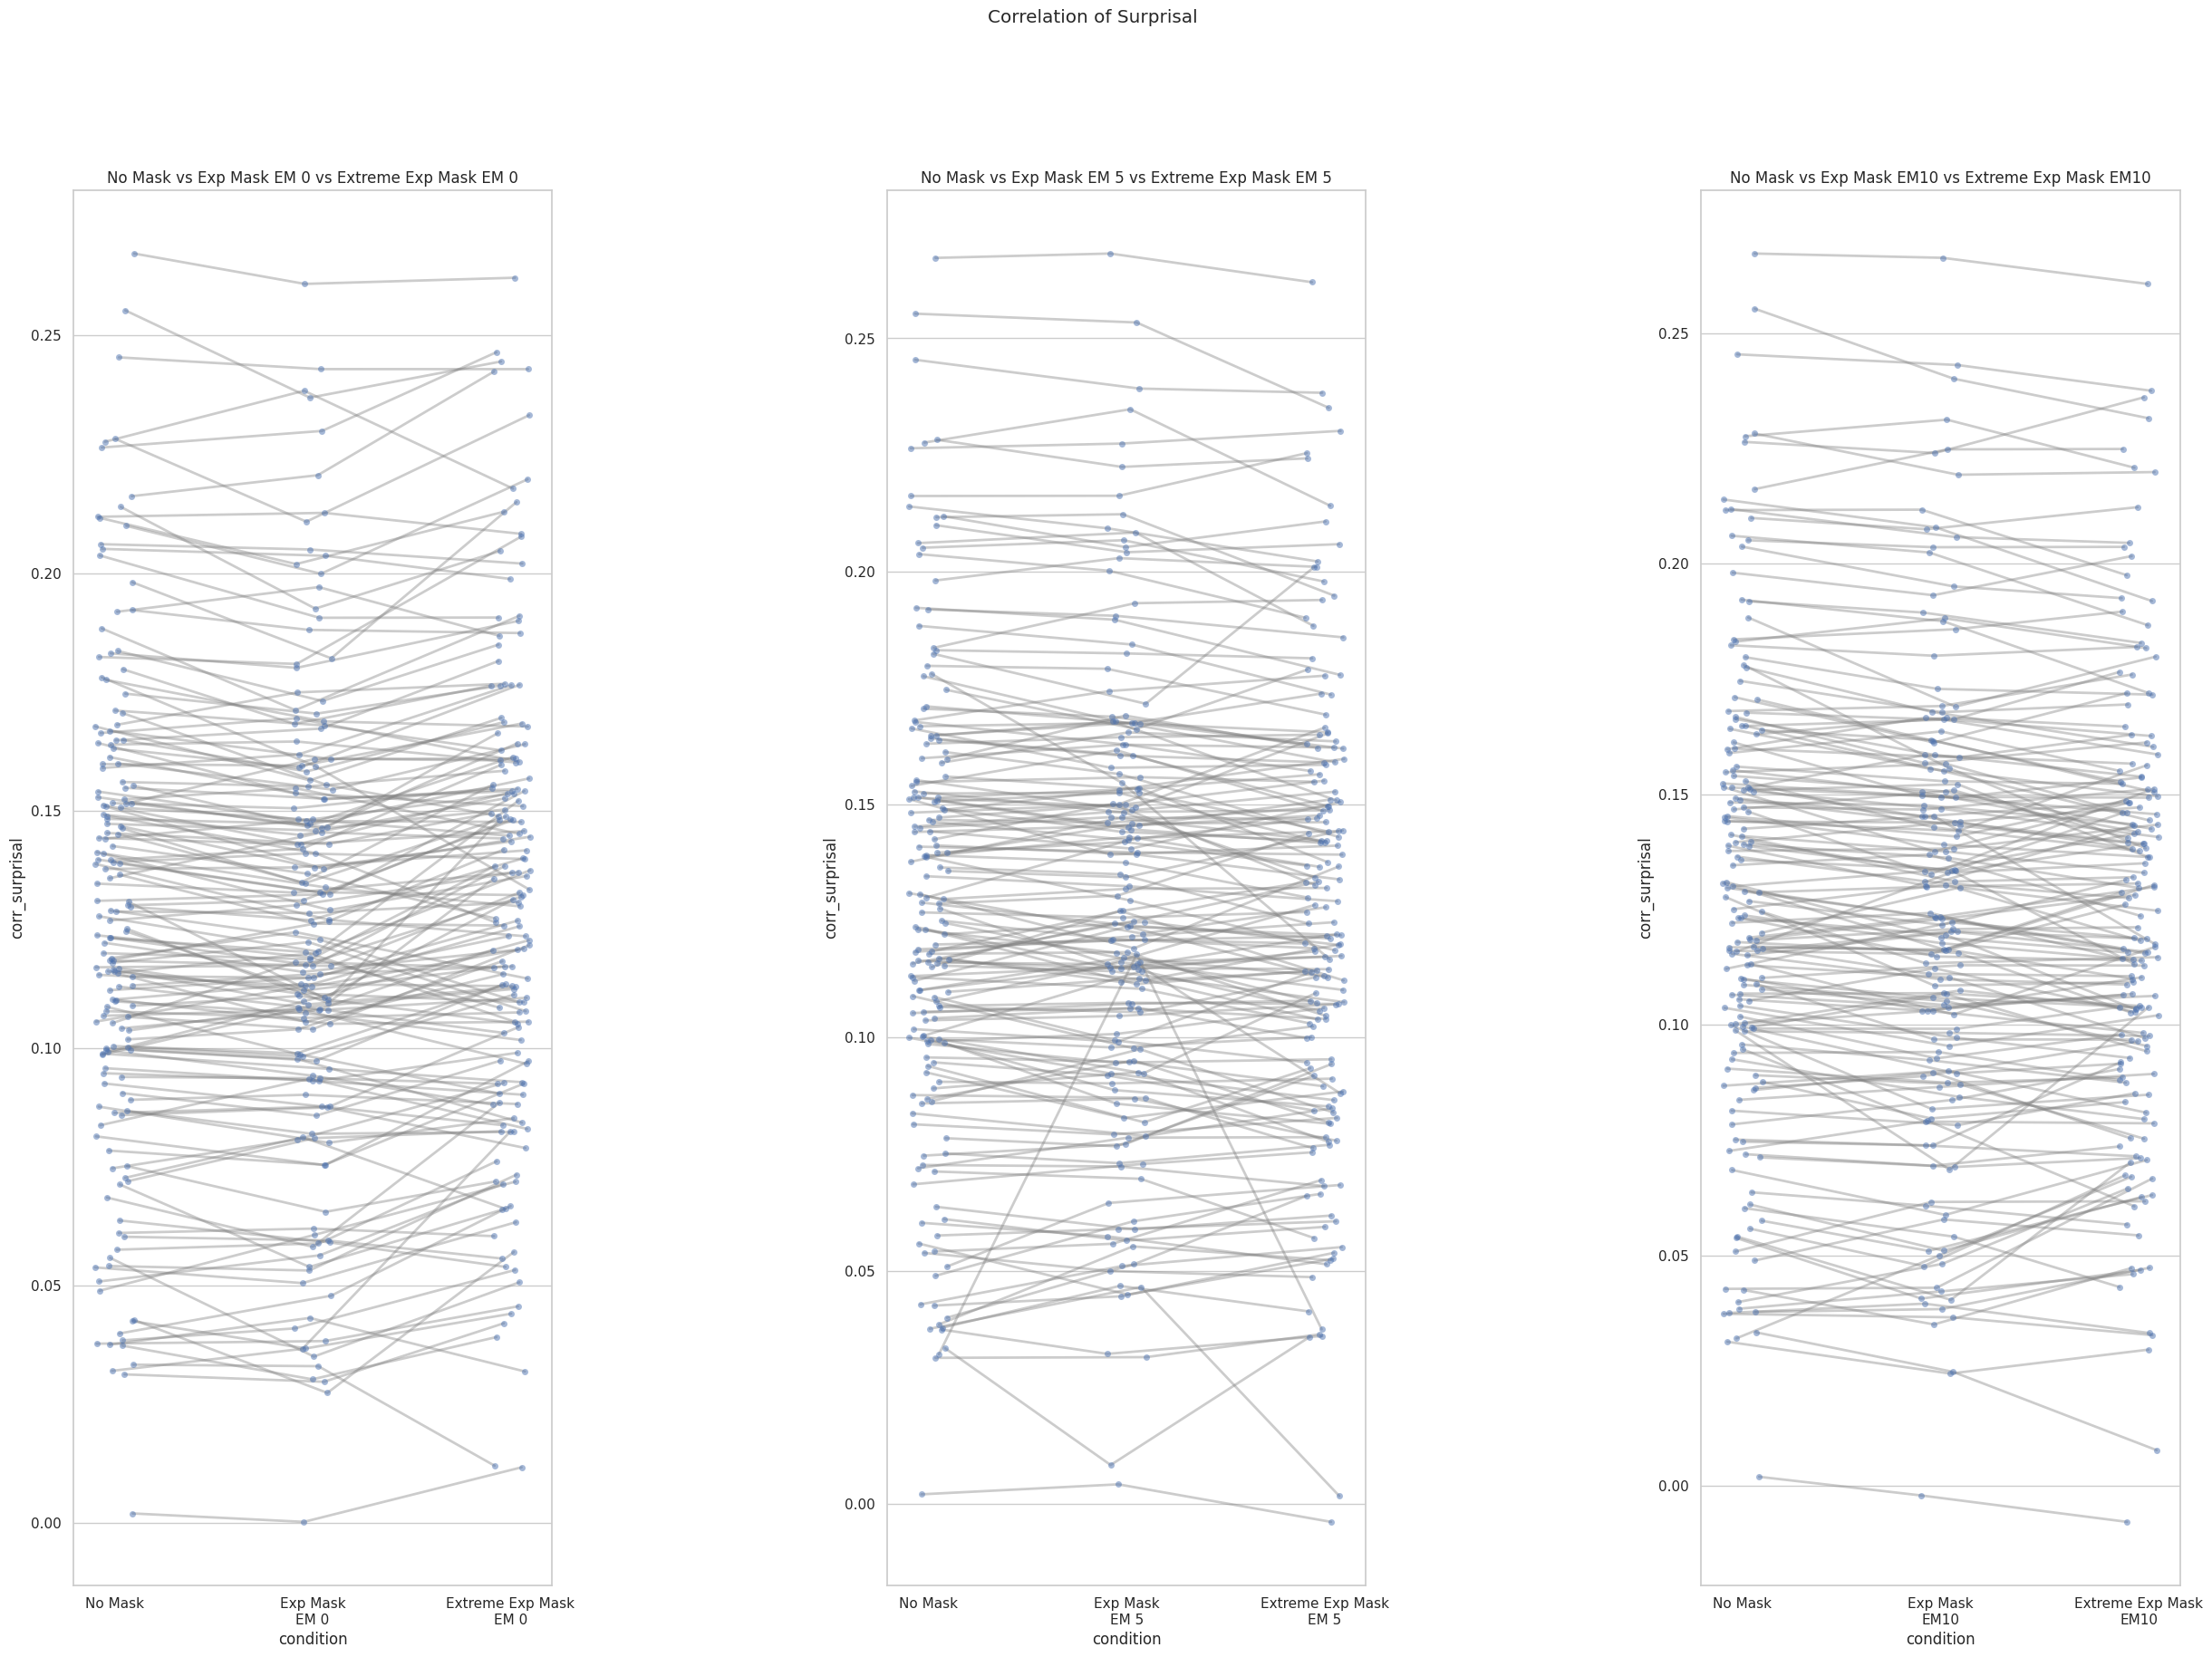

In [110]:
#seed_df_rt_subj

#Need to find a way to pick best seed 

#Maybe average all seeds for each subject 
seed_df_rt_subj_aveseed = seed_df_rt_subj[["condition", "subject_id", "corr_surprisal"]].groupby(["condition", "subject_id"]).agg("mean").reset_index()
#seed_df_rt_subj_bestseed

def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
condition_triplets = [("nomask_EM01", "ee002_EM01", "ee2000_EM01"), ("nomask_EM01", "ee002_EM05", "ee2000_EM05"), ("nomask_EM01", "ee002_EM10", "ee2000_EM10")]

condition_triplet_map = {"nomask_EM01": "No Mask", 
                         "ee002_EM01": "Exp Mask\nEM 0", 
                         "ee002_EM05": "Exp Mask\nEM 5", 
                         "ee002_EM10": "Exp Mask\nEM10", 
                         "ee2000_EM01": "Extreme Exp Mask\nEM 0",
                         "ee2000_EM05": "Extreme Exp Mask\nEM 5", 
                         "ee2000_EM10": "Extreme Exp Mask\nEM10"}

# condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
# conditional_map = {"nomask_EM01": "No Mask", "ee002_EM01": "Exponential Mask\nEM 0", "ee002_EM05": "Exponential Mask\nEM 5", "ee002_EM10": "Exponential Mask\nEM10"}
fig = plt.figure(figsize=(30, 20))
subfigs = fig.subfigures(1, 1)
subfigs = [subfigs]
for row, subfig in enumerate(subfigs):
    
    data_columns = ["corr_surprisal"]
    row_titles = ["Correlation of Surprisal"]
    
    subfig.suptitle(row_titles[row])
    axs = subfig.subplots(1, 3)
    #Add spacing between subplots
    subfig.subplots_adjust(wspace=0.7)
    for i, (nomask_condition, ee002_condition, ee2000_condition) in enumerate(condition_triplets):
        ax = axs[i]
        plot_data = seed_df_rt_subj_bestseed[["condition", data_columns[row]]][seed_df["condition"].isin([nomask_condition, ee002_condition, ee2000_condition])]
        plot_data["condition"] = plot_data["condition"].map(condition_triplet_map)
        
        sns.stripplot(data=plot_data, x="condition", y=data_columns[row], dodge=True, alpha=.5, jitter=True, ax=ax)
        connect_dots(ax)
        
        #set title for each subplot but remove \n from mapping
        ax.set_title(condition_triplet_map[nomask_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee002_condition].replace("\n", " ") + " vs " + condition_triplet_map[ee2000_condition].replace("\n", " "))
        
        #ax.set_ylim(0.121, 0.131) 
        

In [102]:
#Compare T test between classes and subclasses for train and val loss
from scipy.stats import ttest_ind

#Pairwise T test between classes and subclass combinations

unique_combinations = run_df[['class', 'sub_class']].drop_duplicates()
print(unique_combinations)

t_test_results = []
for i in range(len(unique_combinations)):
    for j in range(i+1, len(unique_combinations)):
        class1 = unique_combinations.iloc[i, 0]
        sub_class1 = unique_combinations.iloc[i, 1]
        class2 = unique_combinations.iloc[j, 0]
        sub_class2 = unique_combinations.iloc[j, 1]
        
        print(f"Class: {class1}, Subclass: {sub_class1} vs Class: {class2}, Subclass: {sub_class2}")
        train_loss_class1 = run_df[(run_df['class'] == class1) & (run_df['sub_class'] == sub_class1)]['train_loss']
        train_loss_class2 = run_df[(run_df['class'] == class2) & (run_df['sub_class'] == sub_class2)]['train_loss']
        val_loss_class1 = run_df[(run_df['class'] == class1) & (run_df['sub_class'] == sub_class1)]['val_loss']
        val_loss_class2 = run_df[(run_df['class'] == class2) & (run_df['sub_class'] == sub_class2)]['val_loss']
        
        t_test_train = ttest_ind(train_loss_class1, train_loss_class2)
        t_test_val = ttest_ind(val_loss_class1, val_loss_class2)
        
        t_test_results.append({"class1": class1, "sub_class1": sub_class1, "class2": class2, "sub_class2": sub_class2, "train_t_stat": t_test_train.statistic, "train_p_value": t_test_train.pvalue, "val_t_stat": t_test_val.statistic, "val_p_value": t_test_val.pvalue})
        
t_test_df = pd.DataFrame(t_test_results)

t_test_df
    

     class sub_class
0   nomask      EM01
10   ee002      EM01
8    ee002      EM05
9    ee002      EM10
38  ee2000      EM01
39  ee2000      EM05
40  ee2000      EM10
Class: nomask, Subclass: EM01 vs Class: ee002, Subclass: EM01
Class: nomask, Subclass: EM01 vs Class: ee002, Subclass: EM05
Class: nomask, Subclass: EM01 vs Class: ee002, Subclass: EM10
Class: nomask, Subclass: EM01 vs Class: ee2000, Subclass: EM01
Class: nomask, Subclass: EM01 vs Class: ee2000, Subclass: EM05
Class: nomask, Subclass: EM01 vs Class: ee2000, Subclass: EM10
Class: ee002, Subclass: EM01 vs Class: ee002, Subclass: EM05
Class: ee002, Subclass: EM01 vs Class: ee002, Subclass: EM10
Class: ee002, Subclass: EM01 vs Class: ee2000, Subclass: EM01
Class: ee002, Subclass: EM01 vs Class: ee2000, Subclass: EM05
Class: ee002, Subclass: EM01 vs Class: ee2000, Subclass: EM10
Class: ee002, Subclass: EM05 vs Class: ee002, Subclass: EM10
Class: ee002, Subclass: EM05 vs Class: ee2000, Subclass: EM01
Class: ee002, Subclass: EM

class1 sub_class1  class2 sub_class2  train_t_stat  train_p_value  \
0   nomask       EM01   ee002       EM01      3.073698   7.269362e-03   
1   nomask       EM01   ee002       EM05      8.613986   2.097522e-07   
2   nomask       EM01   ee002       EM10     10.004228   2.730748e-08   
3   nomask       EM01  ee2000       EM01   -150.659668   1.190678e-26   
4   nomask       EM01  ee2000       EM05    -43.078222   5.620349e-18   
5   nomask       EM01  ee2000       EM10    -20.422256   7.550933e-09   
6    ee002       EM01   ee002       EM05      5.694085   2.121318e-05   
7    ee002       EM01   ee002       EM10      6.467360   4.389932e-06   
8    ee002       EM01  ee2000       EM01   -146.611567   3.728990e-29   
9    ee002       EM01  ee2000       EM05    -41.942806   2.089737e-19   
10   ee002       EM01  ee2000       EM10    -16.788511   3.463237e-09   
11   ee002       EM05   ee002       EM10      0.246080   8.084044e-01   
12   ee002       EM05  ee2000       EM01   -140.511353   8.008263e-29   
13   ee002       EM05  ee2000       EM05    -43.803349   9.636583e-20   
14   ee002       EM05  ee2000       EM10    -18.131315   1.526662e-09   
15   ee002       EM10  ee2000       EM01   -151.460088   2.077052e-29   
16   ee002       EM10  ee2000       EM05    -48.255787   1.710982e-20   
17   ee002       EM10  ee2000       EM10    -21.125964   2.967385e-10   
18  ee2000       EM01  ee2000       EM05    113.095264   3.967401e-27   
19  ee2000       EM01  ee2000       EM10     84.833334   7.611095e-17   
20  ee2000       EM05  ee2000       EM10     13.127837   4.596799e-08   

    val_t_stat   val_p_value  
0    -2.102143  5.172837e-02  
1     2.175086  4.496335e-02  
2     4.630054  2.780306e-04  
3  -108.441475  2.282813e-24  
4   -71.998817  1.580303e-21  
5   -48.302074  3.502179e-12  
6     4.155592  5.940429e-04  
7     6.481092  4.271871e-06  
8  -105.989663  1.273619e-26  
9   -67.955333  3.726132e-23  
10  -36.718174  7.369495e-13  
11    2.448455  2.482254e-02  
12 -112.749285  4.192039e-27  
13  -74.270468  7.567274e-24  
14  -42.515680  1.484666e-13  
15 -114.127954  3.369327e-27  
16  -75.991267  5.016778e-24  
17  -43.594660  1.128639e-13  
18   41.999202  2.040275e-19  
19   41.353888  2.010155e-13  
20   13.880474  2.571243e-08

Text(0.5, 0.98, 'Val Perplexity and Train Loss for Nomask vs EE002')

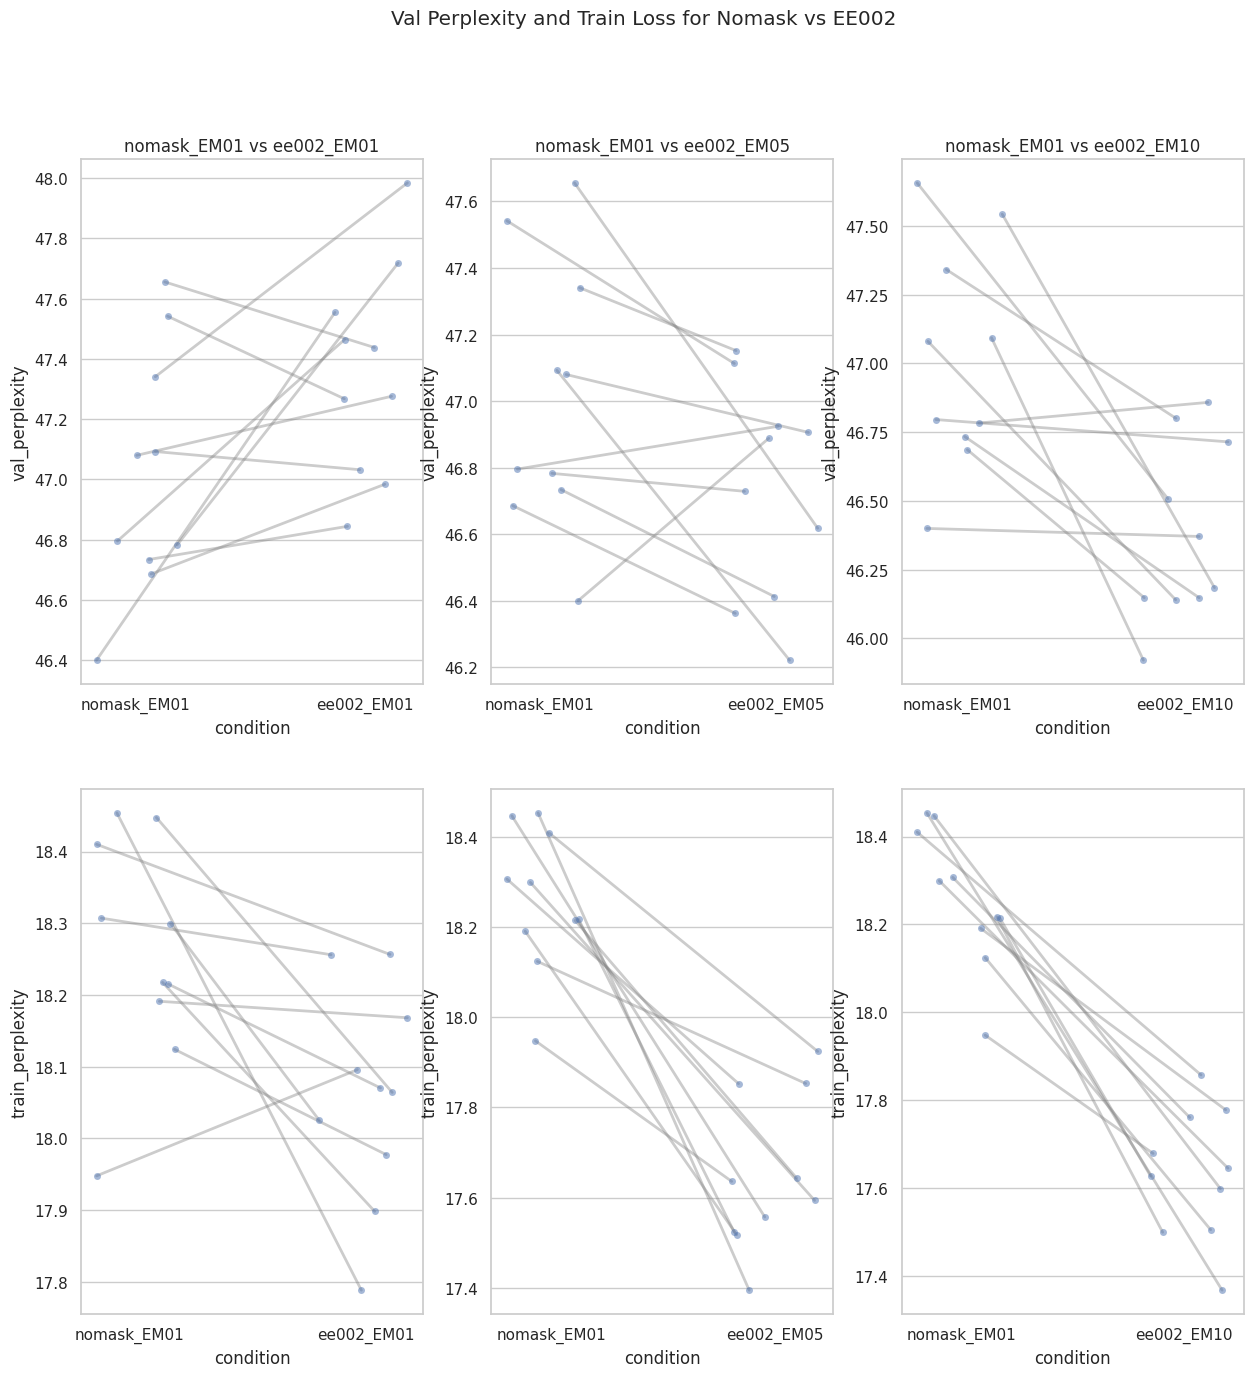

In [83]:



def connect_dots(ax_obj,alpha=.4,col='grey', linewidth=2):
    """ for a given ax_object (from scatterplot or sns.stripplot or the like)
    connect the dots (arbtirary number of columns)"""
    cs=ax_obj.collections
    xcoords=np.vstack([this_cs.get_offsets()[:,0] for this_cs in cs]).T
    ycoords=np.vstack([this_cs.get_offsets()[:,1] for this_cs in cs]).T
    for (xcoord,ycoord) in zip(xcoords,ycoords):
        ax_obj.plot(xcoord,ycoord,alpha=alpha,color=col,linewidth=linewidth)

    return(ax_obj)

#Convert loss to perplexity
seed_df["train_perplexity"] = np.exp(seed_df["train_loss"])
seed_df["val_perplexity"] = np.exp(seed_df["val_loss"])

#create 3x2 grid of plots with each subplot showing nomask vs ee002 for each subclass
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
condition_pairs = [("nomask_EM01", "ee002_EM01"), ("nomask_EM01", "ee002_EM05"), ("nomask_EM01", "ee002_EM10")]
for i, (nomask_condition, ee002_condition) in enumerate(condition_pairs):
    ax = axs[i//3, i%3]
    sns.stripplot(data=seed_df[["condition", "val_perplexity"]][seed_df["condition"].isin([nomask_condition, ee002_condition])]
                   , x="condition", y="val_perplexity", dodge=True, alpha=.5, jitter=.2, ax=ax)
    connect_dots(ax)
    ax.set_title(f"{nomask_condition} vs {ee002_condition}")
    #ax.set_ylim(3.82, 3.88)
    
    #Add corresponding train loss to the plot below
    ax = axs[i//3+1, i%3]
    sns.stripplot(data=seed_df[["condition", "train_perplexity"]][seed_df["condition"].isin([nomask_condition, ee002_condition])]
                     , x="condition", y="train_perplexity", dodge=True, alpha=.5, jitter=.2, ax=ax)
    connect_dots(ax)
    #ax.set_ylim(2.85,2.92)

fig.suptitle("Val Perplexity and Train Loss for Nomask vs EE002")
